<p style="font-size:36px;text-align:center"> <b>Personalized cancer diagnosis</b> </p>

<h1>1. Business Problem</h1>

<h2>1.1. Description</h2>

<p> Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/ </p>
<p> Data: Memorial Sloan Kettering Cancer Center (MSKCC)</p>
<p> Download training_variants.zip and training_text.zip from Kaggle.</p> 

<h4> Context:</h4>
<p> Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/discussion/35336#198462</p>

<h4> Problem statement : </h4>
<p> Classify the given genetic variations/mutations based on evidence from text-based clinical literature. </p>

<h2>1.2. Source/Useful Links</h2>

 Some articles and reference blogs about the problem statement

1. https://www.forbes.com/sites/matthewherper/2017/06/03/a-new-cancer-drug-helped-almost-everyone-who-took-it-almost-heres-what-it-teaches-us/#2a44ee2f6b25
2. https://www.youtube.com/watch?v=UwbuW7oK8rk 
3. https://www.youtube.com/watch?v=qxXRKVompI8

<h2>1.3. Real-world/Business objectives and constraints.</h2>

* No low-latency requirement.
* Interpretability is important.
* Errors can be very costly.
* Probability of a data-point belonging to each class is needed.

<h1>2. Machine Learning Problem Formulation</h1>

<h2>2.1. Data</h2>

<h3>2.1.1. Data Overview</h3>

- Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/data
- We have two data files: one conatins the information about the genetic mutations and the other contains the clinical evidence (text) that  human experts/pathologists use to classify the genetic mutations. 
- Both these data files are have a common column called ID
- <p> 
    Data file's information:
    <ul> 
        <li>
        training_variants (ID , Gene, Variations, Class)
        </li>
        <li>
        training_text (ID, Text)
        </li>
    </ul>
</p>

<h3>2.1.2. Example Data Point</h3>

<h6>training_variants</h6>
<hr>
ID,Gene,Variation,Class<br>
0,FAM58A,Truncating Mutations,1 <br>
1,CBL,W802*,2 <br>
2,CBL,Q249E,2 <br>
...

<h6> training_text</h6>
<hr>
ID,Text <br>
0||Cyclin-dependent kinases (CDKs) regulate a variety of fundamental cellular processes. CDK10 stands out as one of the last orphan CDKs for which no activating cyclin has been identified and no kinase activity revealed. Previous work has shown that CDK10 silencing increases ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2)-driven activation of the MAPK pathway, which confers tamoxifen resistance to breast cancer cells. The precise mechanisms by which CDK10 modulates ETS2 activity, and more generally the functions of CDK10, remain elusive. Here we demonstrate that CDK10 is a cyclin-dependent kinase by identifying cyclin M as an activating cyclin. Cyclin M, an orphan cyclin, is the product of FAM58A, whose mutations cause STAR syndrome, a human developmental anomaly whose features include toe syndactyly, telecanthus, and anogenital and renal malformations. We show that STAR syndrome-associated cyclin M mutants are unable to interact with CDK10. Cyclin M silencing phenocopies CDK10 silencing in increasing c-Raf and in conferring tamoxifen resistance to breast cancer cells. CDK10/cyclin M phosphorylates ETS2 in vitro, and in cells it positively controls ETS2 degradation by the proteasome. ETS2 protein levels are increased in cells derived from a STAR patient, and this increase is attributable to decreased cyclin M levels. Altogether, our results reveal an additional regulatory mechanism for ETS2, which plays key roles in cancer and development. They also shed light on the molecular mechanisms underlying STAR syndrome.Cyclin-dependent kinases (CDKs) play a pivotal role in the control of a number of fundamental cellular processes (1). The human genome contains 21 genes encoding proteins that can be considered as members of the CDK family owing to their sequence similarity with bona fide CDKs, those known to be activated by cyclins (2). Although discovered almost 20 y ago (3, 4), CDK10 remains one of the two CDKs without an identified cyclin partner. This knowledge gap has largely impeded the exploration of its biological functions. CDK10 can act as a positive cell cycle regulator in some cells (5, 6) or as a tumor suppressor in others (7, 8). CDK10 interacts with the ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2) transcription factor and inhibits its transcriptional activity through an unknown mechanism (9). CDK10 knockdown derepresses ETS2, which increases the expression of the c-Raf protein kinase, activates the MAPK pathway, and induces resistance of MCF7 cells to tamoxifen (6). ... 

<h2>2.2. Mapping the real-world problem to an ML problem</h2>

<h3>2.2.1. Type of Machine Learning Problem</h3>

<p>
    
            There are nine different classes a genetic mutation can be classified into => Multi class classification problem
   
      
    
</p>

<h3>2.2.2. Performance Metric</h3>

Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment#evaluation

Metric(s): 
* Multi class log-loss 
* Confusion matrix 


<h3>2.2.3. Machine Learing Objectives and Constraints</h3>

<p> Objective: Predict the probability of each data-point belonging to each of the nine classes.
</p>
<p> Constraints:
</p>
* Interpretability
* Class probabilities are needed.
* Penalize the errors in class probabilites => Metric is Log-loss.
* No Latency constraints.

<h2>2.3. Train, CV and Test Datasets</h2>

 Split the dataset randomly into three parts train, cross validation and test with 64%,16%, 20% of data respectively

<h1>3. Exploratory Data Analysis</h1>

# Mounting Google Drive locally

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier

from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [5]:
#Increasing the cell width of the Jupyter/ipython notebook in my browser
#https://stackoverflow.com/questions/21971449/how-do-i-increase-the-cell-width-of-the-jupyter-ipython-notebook-in-my-browser
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

<h2>3.1. Reading Data</h2>

<h3>3.1.1. Reading Gene and Variation Data</h3>

In [4]:
data = pd.read_csv('/content/drive/My Drive/MLCaseStudies/Cancer/training_variants')
print('Number of data points : ', data.shape[0])
print('Number of features : ', data.shape[1])
print('Features : ', data.columns.values)
data.head()

Number of data points :  3321
Number of features :  4
Features :  ['ID' 'Gene' 'Variation' 'Class']


ID    Gene             Variation  Class
0   0  FAM58A  Truncating Mutations      1
1   1     CBL                 W802*      2
2   2     CBL                 Q249E      2
3   3     CBL                 N454D      3
4   4     CBL                 L399V      4

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x="Class", data=data)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Class Count', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Classes", fontsize=15)
plt.show()

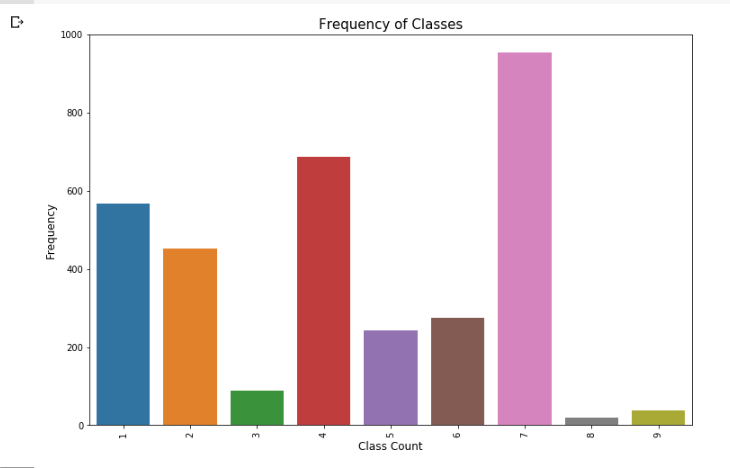

<p>
    training/training_variants is a comma separated file containing the description of the genetic mutations used for training. <br>
    Fields are 
    <ul>
        <li><b>ID : </b>the id of the row used to link the mutation to the clinical evidence</li>
        <li><b>Gene : </b>the gene where this genetic mutation is located </li>
        <li><b>Variation : </b>the aminoacid change for this mutations </li>
        <li><b>Class :</b> 1-9 the class this genetic mutation has been classified on</li>
    </ul>

<h3>3.1.2. Reading Text Data</h3>

In [5]:
# note the seprator in this file
data_text =pd.read_csv("/content/drive/My Drive/MLCaseStudies/Cancer/training_text",sep="\|\|",engine="python",names=["ID","TEXT"],skiprows=1)
print('Number of data points : ', data_text.shape[0])
print('Number of features : ', data_text.shape[1])
print('Features : ', data_text.columns.values)
data_text.head()

Number of data points :  3321
Number of features :  2
Features :  ['ID' 'TEXT']


ID                                               TEXT
0   0  Cyclin-dependent kinases (CDKs) regulate a var...
1   1   Abstract Background  Non-small cell lung canc...
2   2   Abstract Background  Non-small cell lung canc...
3   3  Recent evidence has demonstrated that acquired...
4   4  Oncogenic mutations in the monomeric Casitas B...

<h3>3.1.3. Preprocessing of text</h3>

In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
# loading stop words from nltk library
stop_words = set(stopwords.words('english'))


def nlp_preprocessing(total_text, index, column):
    if type(total_text) is not int:
        string = ""
        # replace every special char with space
        total_text = re.sub('[^a-zA-Z0-9\n]', ' ', total_text)
        # replace multiple spaces with single space
        total_text = re.sub('\s+',' ', total_text)
        # converting all the chars into lower-case.
        total_text = total_text.lower()
        
        for word in total_text.split():
        # if the word is a not a stop word then retain that word from the data
            if not word in stop_words:
                string += word + " "
        
        data_text[column][index] = string

In [8]:
#text processing stage.
start_time = time.clock()
for index, row in data_text.iterrows():
    if type(row['TEXT']) is str:
        nlp_preprocessing(row['TEXT'], index, 'TEXT')
    else:
        print("there is no text description for id:",index)
print('Time took for preprocessing the text :',time.clock() - start_time, "seconds")

there is no text description for id: 1109
there is no text description for id: 1277
there is no text description for id: 1407
there is no text description for id: 1639
there is no text description for id: 2755
Time took for preprocessing the text : 293.940739 seconds


In [9]:
#merging both gene_variations and text data based on ID
result = pd.merge(data, data_text,on='ID', how='left')
result.head()

ID    Gene  ... Class                                               TEXT
0   0  FAM58A  ...     1  cyclin dependent kinases cdks regulate variety...
1   1     CBL  ...     2  abstract background non small cell lung cancer...
2   2     CBL  ...     2  abstract background non small cell lung cancer...
3   3     CBL  ...     3  recent evidence demonstrated acquired uniparen...
4   4     CBL  ...     4  oncogenic mutations monomeric casitas b lineag...

[5 rows x 5 columns]

In [10]:
result[result.isnull().any(axis=1)]

ID    Gene             Variation  Class TEXT
1109  1109   FANCA                S1088F      1  NaN
1277  1277  ARID5B  Truncating Mutations      1  NaN
1407  1407   FGFR3                 K508M      6  NaN
1639  1639    FLT1         Amplification      6  NaN
2755  2755    BRAF                 G596C      7  NaN

In [0]:
result.loc[result['TEXT'].isnull(),'TEXT'] = result['Gene'] +' '+result['Variation']

In [12]:
result[result['ID']==1109]

ID   Gene Variation  Class          TEXT
1109  1109  FANCA    S1088F      1  FANCA S1088F

<h3>3.1.4. Test, Train and Cross Validation Split</h3>

<h4>3.1.4.1. Splitting data into train, test and cross validation (64:20:16)</h4>

In [0]:
y_true = result['Class'].values
result.Gene      = result.Gene.str.replace('\s+', '_')
result.Variation = result.Variation.str.replace('\s+', '_')

# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, test_df, y_train, y_test = train_test_split(result, y_true, stratify=y_true, test_size=0.2)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

<p> We split the data into train, test and cross validation data sets, preserving the ratio of class distribution in the original data set  </p>

In [14]:
print('Number of data points in train data:', train_df.shape[0])
print('Number of data points in test data:', test_df.shape[0])
print('Number of data points in cross validation data:', cv_df.shape[0])

Number of data points in train data: 2124
Number of data points in test data: 665
Number of data points in cross validation data: 532


**Question:** What to do when your training and testing data come from different distributions  
https://www.freecodecamp.org/news/what-to-do-when-your-training-and-testing-data-come-from-different-distributions-d89674c6ecd8/

<h4>3.1.4.2. Distribution of y_i's in Train, Test and Cross Validation datasets</h4>

In [16]:
pd.__version__

'0.24.2'

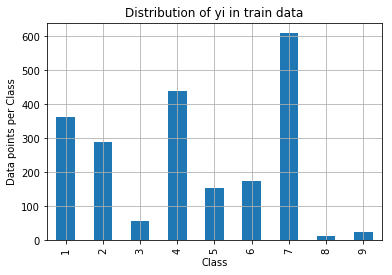

Number of data points in class 7 : 609 ( 28.672 %)
Number of data points in class 4 : 439 ( 20.669 %)
Number of data points in class 1 : 363 ( 17.09 %)
Number of data points in class 2 : 289 ( 13.606 %)
Number of data points in class 6 : 176 ( 8.286 %)
Number of data points in class 5 : 155 ( 7.298 %)
Number of data points in class 3 : 57 ( 2.684 %)
Number of data points in class 9 : 24 ( 1.13 %)
Number of data points in class 8 : 12 ( 0.565 %)
--------------------------------------------------------------------------------


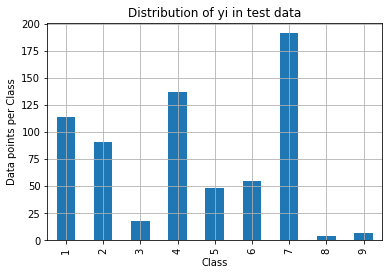

Number of data points in class 7 : 191 ( 28.722 %)
Number of data points in class 4 : 137 ( 20.602 %)
Number of data points in class 1 : 114 ( 17.143 %)
Number of data points in class 2 : 91 ( 13.684 %)
Number of data points in class 6 : 55 ( 8.271 %)
Number of data points in class 5 : 48 ( 7.218 %)
Number of data points in class 3 : 18 ( 2.707 %)
Number of data points in class 9 : 7 ( 1.053 %)
Number of data points in class 8 : 4 ( 0.602 %)
--------------------------------------------------------------------------------


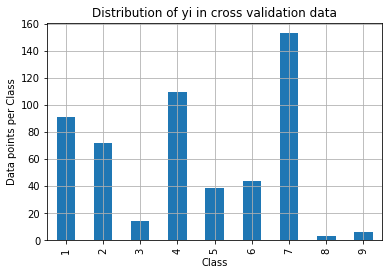

Number of data points in class 7 : 153 ( 28.759 %)
Number of data points in class 4 : 110 ( 20.677 %)
Number of data points in class 1 : 91 ( 17.105 %)
Number of data points in class 2 : 72 ( 13.534 %)
Number of data points in class 6 : 44 ( 8.271 %)
Number of data points in class 5 : 39 ( 7.331 %)
Number of data points in class 3 : 14 ( 2.632 %)
Number of data points in class 9 : 6 ( 1.128 %)
Number of data points in class 8 : 3 ( 0.564 %)


In [17]:
# it returns a dict, keys as class labels and values as the number of data points in that class
train_class_distribution = train_df['Class'].value_counts().sort_index()
test_class_distribution = test_df['Class'].value_counts().sort_index()
cv_class_distribution = cv_df['Class'].value_counts().sort_index()

my_colors = 'rgbkymc'
train_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/train_df.shape[0]*100), 3), '%)')

    
print('-'*80)
my_colors = 'rgbkymc'
test_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/test_df.shape[0]*100), 3), '%)')

print('-'*80)
my_colors = 'rgbkymc'
cv_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in cross validation data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',cv_class_distribution.values[i], '(', np.round((cv_class_distribution.values[i]/cv_df.shape[0]*100), 3), '%)')


<h2>3.2 Prediction using a 'Random' Model</h2>

<p style="font-size:16px"> In a 'Random' Model, we generate the NINE class probabilites randomly such that they sum to 1. </p>

In [0]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [1,2,3,4,5,6,7,8,9]
    # representing A in heatmap format
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    # representing B in heatmap format
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

Log loss on Cross Validation Data using Random Model 2.4708865933482542
Log loss on Test Data using Random Model 2.4743842271075764
-------------------- Confusion matrix --------------------


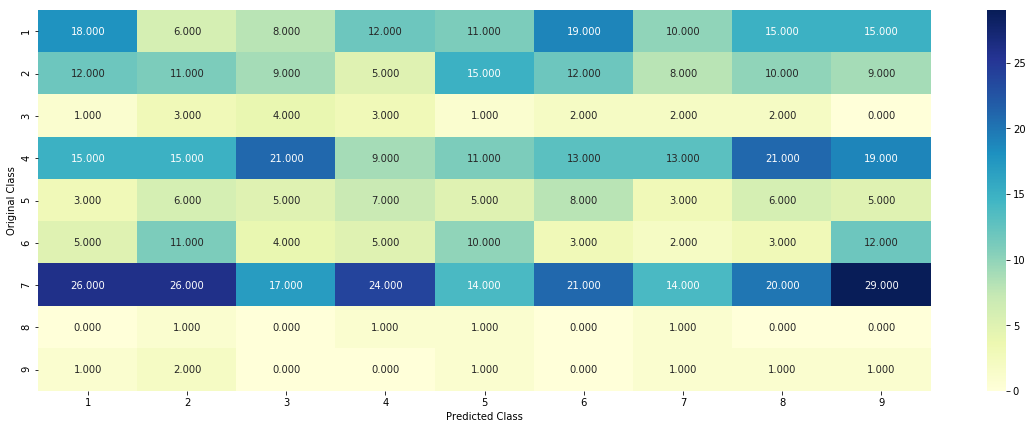

-------------------- Precision matrix (Columm Sum=1) --------------------


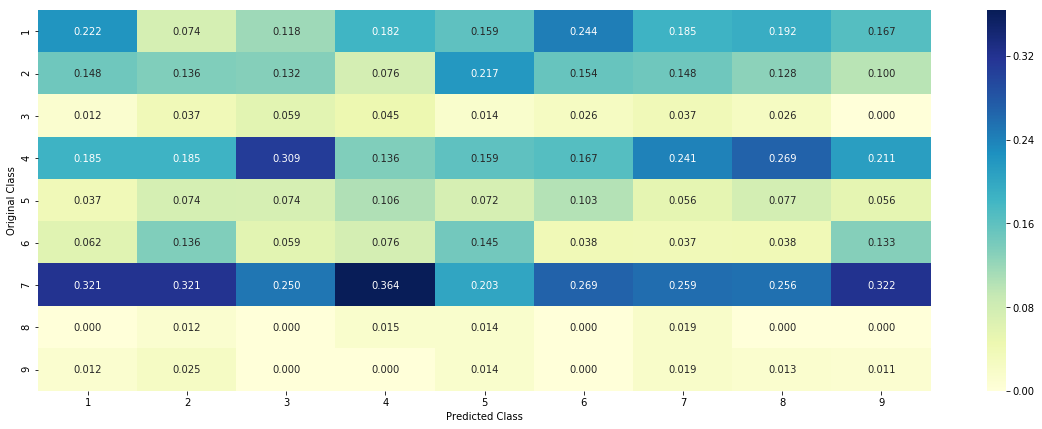

-------------------- Recall matrix (Row sum=1) --------------------


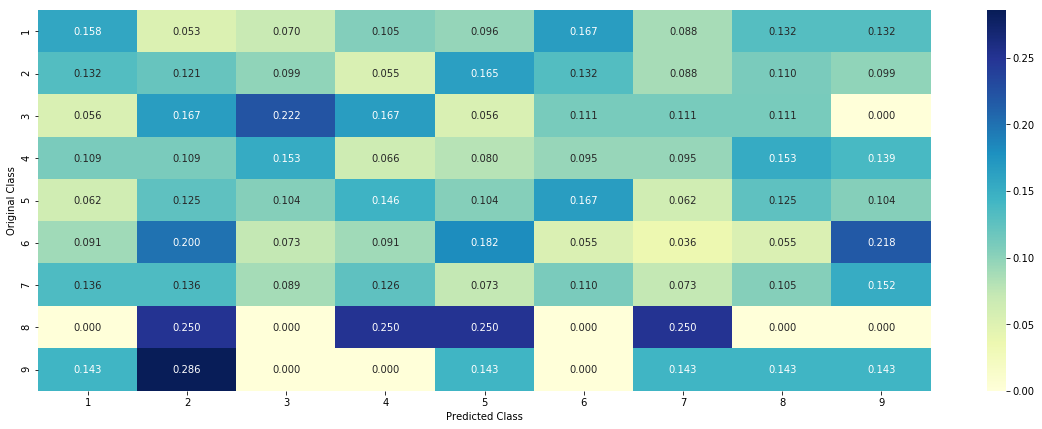

In [23]:

# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
test_data_len = test_df.shape[0]
cv_data_len = cv_df.shape[0]

# we create a output array that has exactly same size as the CV data
cv_predicted_y = np.zeros((cv_data_len,9))
for i in range(cv_data_len):
    rand_probs = np.random.rand(1,9)
    cv_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Cross Validation Data using Random Model",log_loss(y_cv,cv_predicted_y, eps=1e-15))


# Test-Set error.
#we create a output array that has exactly same as the test data
test_predicted_y = np.zeros((test_data_len,9))
for i in range(test_data_len):
    rand_probs = np.random.rand(1,9)
    test_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test,test_predicted_y, eps=1e-15))

predicted_y =np.argmax(test_predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y+1)

<h2>3.3 Univariate Analysis</h2>

In [0]:
# code for response coding with Laplace smoothing.
# alpha : used for laplace smoothing
# feature: ['gene', 'variation']
# df: ['train_df', 'test_df', 'cv_df']
# algorithm
# ----------
# Consider all unique values and the number of occurances of given feature in train data dataframe
# build a vector (1*9) , the first element = (number of times it occured in class1 + 10*alpha / number of time it occurred in total data+90*alpha)
# gv_dict is like a look up table, for every gene it store a (1*9) representation of it
# for a value of feature in df:
# if it is in train data:
# we add the vector that was stored in 'gv_dict' look up table to 'gv_fea'
# if it is not there is train:
# we add [1/9, 1/9, 1/9, 1/9,1/9, 1/9, 1/9, 1/9, 1/9] to 'gv_fea'
# return 'gv_fea'
# ----------------------

# get_gv_fea_dict: Get Gene varaition Feature Dict
def get_gv_fea_dict(alpha, feature, df):
    # value_count: it contains a dict like
    # print(train_df['Gene'].value_counts())
    # output:
    #        {BRCA1      174
    #         TP53       106
    #         EGFR        86
    #         BRCA2       75
    #         PTEN        69
    #         KIT         61
    #         BRAF        60
    #         ERBB2       47
    #         PDGFRA      46
    #         ...}
    # print(train_df['Variation'].value_counts())
    # output:
    # {
    # Truncating_Mutations                     63
    # Deletion                                 43
    # Amplification                            43
    # Fusions                                  22
    # Overexpression                            3
    # E17K                                      3
    # Q61L                                      3
    # S222D                                     2
    # P130S                                     2
    # ...
    # }
    value_count = train_df[feature].value_counts()
    
    # gv_dict : Gene Variation Dict, which contains the probability array for each gene/variation
    gv_dict = dict()
    
    # denominator will contain the number of time that particular feature occured in whole data
    for i, denominator in value_count.items():
        # vec will contain (p(yi==1/Gi) probability of gene/variation belongs to perticular class
        # vec is 9 diamensional vector
        vec = []
        for k in range(1,10):
            # print(train_df.loc[(train_df['Class']==1) & (train_df['Gene']=='BRCA1')])
            #         ID   Gene             Variation  Class  
            # 2470  2470  BRCA1                S1715C      1   
            # 2486  2486  BRCA1                S1841R      1   
            # 2614  2614  BRCA1                   M1R      1   
            # 2432  2432  BRCA1                L1657P      1   
            # 2567  2567  BRCA1                T1685A      1   
            # 2583  2583  BRCA1                E1660G      1   
            # 2634  2634  BRCA1                W1718L      1   
            # cls_cnt.shape[0] will return the number of rows

            cls_cnt = train_df.loc[(train_df['Class']==k) & (train_df[feature]==i)]
            
            # cls_cnt.shape[0](numerator) will contain the number of time that particular feature occured in whole data
            vec.append((cls_cnt.shape[0] + alpha*10)/ (denominator + 90*alpha))

        # we are adding the gene/variation to the dict as key and vec as value
        gv_dict[i]=vec
    return gv_dict

# Get Gene variation feature
def get_gv_feature(alpha, feature, df):
    # print(gv_dict)
    #     {'BRCA1': [0.20075757575757575, 0.03787878787878788, 0.068181818181818177, 0.13636363636363635, 0.25, 0.19318181818181818, 0.03787878787878788, 0.03787878787878788, 0.03787878787878788], 
    #      'TP53': [0.32142857142857145, 0.061224489795918366, 0.061224489795918366, 0.27040816326530615, 0.061224489795918366, 0.066326530612244902, 0.051020408163265307, 0.051020408163265307, 0.056122448979591837], 
    #      'EGFR': [0.056818181818181816, 0.21590909090909091, 0.0625, 0.068181818181818177, 0.068181818181818177, 0.0625, 0.34659090909090912, 0.0625, 0.056818181818181816], 
    #      'BRCA2': [0.13333333333333333, 0.060606060606060608, 0.060606060606060608, 0.078787878787878782, 0.1393939393939394, 0.34545454545454546, 0.060606060606060608, 0.060606060606060608, 0.060606060606060608], 
    #      'PTEN': [0.069182389937106917, 0.062893081761006289, 0.069182389937106917, 0.46540880503144655, 0.075471698113207544, 0.062893081761006289, 0.069182389937106917, 0.062893081761006289, 0.062893081761006289], 
    #      'KIT': [0.066225165562913912, 0.25165562913907286, 0.072847682119205295, 0.072847682119205295, 0.066225165562913912, 0.066225165562913912, 0.27152317880794702, 0.066225165562913912, 0.066225165562913912], 
    #      'BRAF': [0.066666666666666666, 0.17999999999999999, 0.073333333333333334, 0.073333333333333334, 0.093333333333333338, 0.080000000000000002, 0.29999999999999999, 0.066666666666666666, 0.066666666666666666],
    #      ...
    #     }
    gv_dict = get_gv_fea_dict(alpha, feature, df)
    # value_count is similar in get_gv_fea_dict
    value_count = train_df[feature].value_counts()
    
    # gv_fea: Gene_variation feature, it will contain the feature for each feature value in the data
    gv_fea = []
    # for every feature values in the given data frame we will check if it is there in the train data then we will add the feature to gv_fea
    # if not we will add [1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9] to gv_fea
    for index, row in df.iterrows():
        if row[feature] in dict(value_count).keys():
            gv_fea.append(gv_dict[row[feature]])
        else:
            gv_fea.append([1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9])
#             gv_fea.append([-1,-1,-1,-1,-1,-1,-1,-1,-1])
    return gv_fea

when we caculate the probability of a feature belongs to any particular class, we apply laplace smoothing
<li>(numerator + 10\*alpha) / (denominator + 90\*alpha) </li>

<h3>3.2.1 Univariate Analysis on Gene Feature</h3>

<p style="font-size:18px;"> <b>Q1.</b> Gene, What type of feature it is ?</p>
<p style="font-size:16px;"><b>Ans.</b> Gene is a categorical variable </p>
<p style="font-size:18px;"> <b>Q2.</b> How many categories are there and How they are distributed?</p>

In [25]:
unique_genes = train_df['Gene'].value_counts()
print('Number of Unique Genes :', unique_genes.shape[0])
# the top 10 genes that occured most
print(unique_genes.head(10))

Number of Unique Genes : 236
BRCA1     161
TP53      104
EGFR       99
BRCA2      82
PTEN       80
KIT        62
BRAF       52
ERBB2      48
PDGFRA     45
ALK        44
Name: Gene, dtype: int64


In [26]:
print("Ans: There are", unique_genes.shape[0] ,"different categories of genes in the train data, and they are distibuted as follows",)

Ans: There are 236 different categories of genes in the train data, and they are distibuted as follows


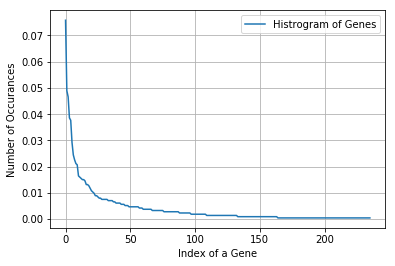

In [27]:
s = sum(unique_genes.values)
h = unique_genes.values/s;
plt.plot(h, label="Histrogram of Genes")
plt.xlabel('Index of a Gene')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()


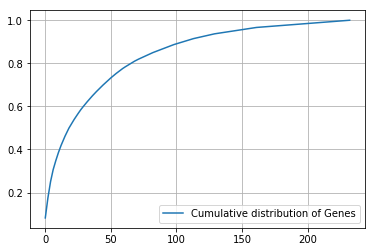

In [30]:
c = np.cumsum(h)
plt.plot(c,label='Cumulative distribution of Genes')
plt.grid()
plt.legend()
plt.show()

<p style="font-size:18px;"> <b>Q3.</b> How to featurize this Gene feature ?</p>

<p style="font-size:16px;"><b>Ans.</b>there are two ways we can featurize this variable
check out this video: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/
<ol><li>One hot Encoding</li><li>Response coding</li></ol></p>
<p> We will choose the appropriate featurization based on the ML model we use.  For this problem of multi-class classification with categorical features, one-hot encoding is better for Logistic regression while response coding is better for Random Forests. </p>

In [0]:
#response-coding of the Gene feature
# alpha is used for laplace smoothing
alpha = 1
# train gene feature
train_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", train_df))
# test gene feature
test_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", test_df))
# cross validation gene feature
cv_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", cv_df))

In [32]:
print("train_gene_feature_responseCoding is converted feature using respone coding method. The shape of gene feature:", train_gene_feature_responseCoding.shape)

train_gene_feature_responseCoding is converted feature using respone coding method. The shape of gene feature: (2124, 9)


In [0]:
# one-hot encoding of Gene feature.
gene_vectorizer = TfidfVectorizer()
train_gene_feature_onehotCoding = gene_vectorizer.fit_transform(train_df['Gene'])
test_gene_feature_onehotCoding = gene_vectorizer.transform(test_df['Gene'])
cv_gene_feature_onehotCoding = gene_vectorizer.transform(cv_df['Gene'])

In [34]:
train_df['Gene'].head()

357     EP300
717     ERBB2
113      MSH6
1962    MAPK1
1958      ATM
Name: Gene, dtype: object

In [35]:
gene_vectorizer.get_feature_names()

['abl1',
 'acvr1',
 'ago2',
 'akt1',
 'akt2',
 'akt3',
 'alk',
 'apc',
 'ar',
 'araf',
 'arid1a',
 'arid1b',
 'arid5b',
 'asxl1',
 'atm',
 'atr',
 'atrx',
 'aurka',
 'aurkb',
 'axin1',
 'b2m',
 'bap1',
 'bcl2',
 'bcor',
 'braf',
 'brca1',
 'brca2',
 'brd4',
 'brip1',
 'btk',
 'card11',
 'carm1',
 'casp8',
 'cbl',
 'ccnd1',
 'ccnd2',
 'ccnd3',
 'cdh1',
 'cdk12',
 'cdk4',
 'cdk6',
 'cdkn1a',
 'cdkn1b',
 'cdkn2a',
 'cdkn2b',
 'cebpa',
 'chek2',
 'cic',
 'crebbp',
 'ctcf',
 'ctla4',
 'ctnnb1',
 'ddr2',
 'dicer1',
 'dnmt3a',
 'dnmt3b',
 'dusp4',
 'egfr',
 'eif1ax',
 'elf3',
 'ep300',
 'epas1',
 'epcam',
 'erbb2',
 'erbb3',
 'erbb4',
 'ercc2',
 'ercc4',
 'erg',
 'errfi1',
 'esr1',
 'etv1',
 'etv6',
 'ewsr1',
 'ezh2',
 'fam58a',
 'fanca',
 'fancc',
 'fat1',
 'fbxw7',
 'fgfr1',
 'fgfr2',
 'fgfr3',
 'fgfr4',
 'flt3',
 'foxa1',
 'foxl2',
 'foxo1',
 'fubp1',
 'gna11',
 'gnas',
 'h3f3a',
 'hist1h1c',
 'hla',
 'hnf1a',
 'hras',
 'idh1',
 'idh2',
 'igf1r',
 'ikbke',
 'ikzf1',
 'il7r',
 'inpp4b',
 'j

In [36]:
print("train_gene_feature_onehotCoding is converted feature using one-hot encoding method. The shape of gene feature:", train_gene_feature_onehotCoding.shape)

train_gene_feature_onehotCoding is converted feature using one-hot encoding method. The shape of gene feature: (2124, 233)


<p style="font-size:18px;"> <b>Q4.</b> How good is this gene feature  in predicting y_i?</p>

There are many ways to estimate how good a feature is, in predicting y_i. One of the good methods is to build a proper ML model using just this feature. In this case, we will build a logistic regression model using only Gene feature (one hot encoded) to predict y_i.

For values of alpha =  1e-05 The log loss is: 1.1924656544550485
For values of alpha =  0.0001 The log loss is: 1.1628234814877147
For values of alpha =  0.001 The log loss is: 1.2024363773621498
For values of alpha =  0.01 The log loss is: 1.324315833358832
For values of alpha =  0.1 The log loss is: 1.4547088861032127
For values of alpha =  1 The log loss is: 1.4981106732014746


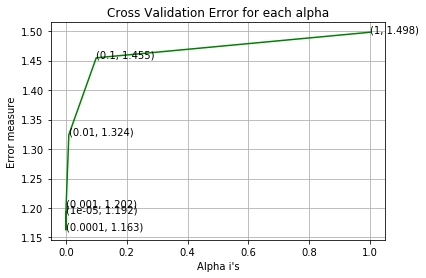

For values of best alpha =  0.0001 The train log loss is: 1.0037015861606282
For values of best alpha =  0.0001 The cross validation log loss is: 1.1628234814877147
For values of best alpha =  0.0001 The test log loss is: 1.1966849604916412


In [37]:
alpha = [10 ** x for x in range(-5, 1)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_gene_feature_onehotCoding, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_gene_feature_onehotCoding, y_train)
    predict_y = sig_clf.predict_proba(cv_gene_feature_onehotCoding)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_gene_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_gene_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_gene_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_gene_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_gene_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<p style="font-size:18px;"> <b>Q5.</b> Is the Gene feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p style="font-size:16px;"> <b>Ans.</b> Yes, it is. Otherwise, the CV and Test errors would be significantly more than train error. </p>

In [38]:
print("Q6. How many data points in Test and CV datasets are covered by the ", unique_genes.shape[0], " genes in train dataset?")

test_coverage=test_df[test_df['Gene'].isin(list(set(train_df['Gene'])))].shape[0]
cv_coverage=cv_df[cv_df['Gene'].isin(list(set(train_df['Gene'])))].shape[0]

print('Ans\n1. In test data',test_coverage, 'out of',test_df.shape[0], ":",(test_coverage/test_df.shape[0])*100)
print('2. In cross validation data',cv_coverage, 'out of ',cv_df.shape[0],":" ,(cv_coverage/cv_df.shape[0])*100)

Q6. How many data points in Test and CV datasets are covered by the  233  genes in train dataset?
Ans
1. In test data 644 out of 665 : 96.84210526315789
2. In cross validation data 514 out of  532 : 96.61654135338345


<h3>3.2.2 Univariate Analysis on Variation Feature</h3>

<p style="font-size:18px;"> <b>Q7.</b> Variation, What type of feature is it ?</p>
<p style="font-size:16px;"><b>Ans.</b> Variation is a categorical variable </p>
<p style="font-size:18px;"> <b>Q8.</b> How many categories are there?</p>

In [39]:
unique_variations = train_df['Variation'].value_counts()
print('Number of Unique Variations :', unique_variations.shape[0])
# the top 10 variations that occured most
print(unique_variations.head(10))

Number of Unique Variations : 1934
Truncating_Mutations         51
Deletion                     48
Amplification                45
Fusions                      23
Overexpression                3
Q61R                          3
G12V                          3
K117N                         2
Promoter_Hypermethylation     2
G13C                          2
Name: Variation, dtype: int64


In [40]:
print("Ans: There are", unique_variations.shape[0] ,"different categories of variations in the train data, and they are distibuted as follows",)

Ans: There are 1934 different categories of variations in the train data, and they are distibuted as follows


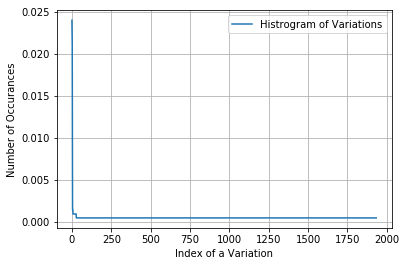

In [41]:
s = sum(unique_variations.values);
h = unique_variations.values/s;
plt.plot(h, label="Histrogram of Variations")
plt.xlabel('Index of a Variation')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()

[0.0240113  0.04661017 0.06779661 ... 0.99905838 0.99952919 1.        ]


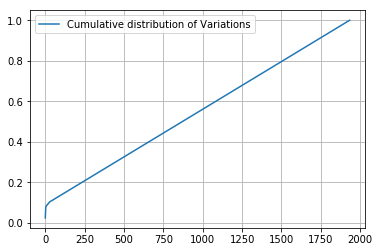

In [42]:
c = np.cumsum(h)
print(c)
plt.plot(c,label='Cumulative distribution of Variations')
plt.grid()
plt.legend()
plt.show()

<p style="font-size:18px;"> <b>Q9.</b> How to featurize this Variation feature ?</p>

<p style="font-size:16px;"><b>Ans.</b>There are two ways we can featurize this variable
check out this video: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/
<ol><li>One hot Encoding</li><li>Response coding</li></ol></p>
<p> We will be using both these methods to featurize the Variation Feature </p>

In [0]:
# alpha is used for laplace smoothing
alpha = 1
# train gene feature
train_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", train_df))
# test gene feature
test_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", test_df))
# cross validation gene feature
cv_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", cv_df))

In [44]:
print("train_variation_feature_responseCoding is a converted feature using the response coding method. The shape of Variation feature:", train_variation_feature_responseCoding.shape)

train_variation_feature_responseCoding is a converted feature using the response coding method. The shape of Variation feature: (2124, 9)


In [0]:
# one-hot encoding of variation feature.
variation_vectorizer = TfidfVectorizer()
train_variation_feature_onehotCoding = variation_vectorizer.fit_transform(train_df['Variation'])
test_variation_feature_onehotCoding = variation_vectorizer.transform(test_df['Variation'])
cv_variation_feature_onehotCoding = variation_vectorizer.transform(cv_df['Variation'])

In [46]:
print("train_variation_feature_onehotEncoded is converted feature using the onne-hot encoding method. The shape of Variation feature:", train_variation_feature_onehotCoding.shape)

train_variation_feature_onehotEncoded is converted feature using the onne-hot encoding method. The shape of Variation feature: (2124, 1967)


<p style="font-size:18px;"> <b>Q10.</b> How good is this Variation feature  in predicting y_i?</p>

Let's build a model just like the earlier!

For values of alpha =  1e-05 The log loss is: 1.6896959864802477
For values of alpha =  0.0001 The log loss is: 1.6837724432204508
For values of alpha =  0.001 The log loss is: 1.6864332438518201
For values of alpha =  0.01 The log loss is: 1.703579003362983
For values of alpha =  0.1 The log loss is: 1.7170159162008343
For values of alpha =  1 The log loss is: 1.718241654768895


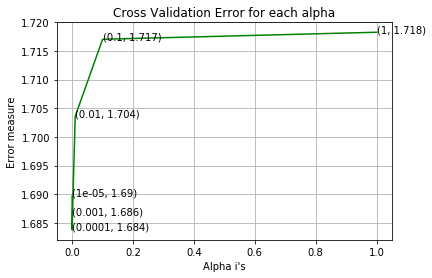

For values of best alpha =  0.0001 The train log loss is: 0.725771763901605
For values of best alpha =  0.0001 The cross validation log loss is: 1.6837724432204508
For values of best alpha =  0.0001 The test log loss is: 1.7050371994807973


In [47]:
alpha = [10 ** x for x in range(-5, 1)]

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_variation_feature_onehotCoding, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_variation_feature_onehotCoding, y_train)
    predict_y = sig_clf.predict_proba(cv_variation_feature_onehotCoding)
    
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_variation_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_variation_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_variation_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_variation_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_variation_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<p style="font-size:18px;"> <b>Q11.</b> Is the Variation feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p style="font-size:16px;"> <b>Ans.</b> Not sure! But lets be very sure using the below analysis. </p>

In [48]:
print("Q12. How many data points are covered by total ", unique_variations.shape[0], " genes in test and cross validation data sets?")
test_coverage=test_df[test_df['Variation'].isin(list(set(train_df['Variation'])))].shape[0]
cv_coverage=cv_df[cv_df['Variation'].isin(list(set(train_df['Variation'])))].shape[0]
print('Ans\n1. In test data',test_coverage, 'out of',test_df.shape[0], ":",(test_coverage/test_df.shape[0])*100)
print('2. In cross validation data',cv_coverage, 'out of ',cv_df.shape[0],":" ,(cv_coverage/cv_df.shape[0])*100)

Q12. How many data points are covered by total  1934  genes in test and cross validation data sets?
Ans
1. In test data 74 out of 665 : 11.12781954887218
2. In cross validation data 57 out of  532 : 10.714285714285714


<h3>3.2.3 Univariate Analysis on Text Feature</h3>

1. How many unique words are present in train data?
2. How are word frequencies distributed?
3. How to featurize text field?
4. Is the text feature useful in predicitng y_i?
5. Is the text feature stable across train, test and CV datasets?

In [0]:
# cls_text is a data frame
# for every row in data fram consider the 'TEXT'
# split the words by space
# make a dict with those words
# increment its count whenever we see that word

def extract_dictionary_paddle(cls_text):
    dictionary = defaultdict(int)
    for index, row in cls_text.iterrows():
        for word in row['TEXT'].split():
            dictionary[word] +=1
    return dictionary

In [0]:
import math
#https://stackoverflow.com/a/1602964
def get_text_responsecoding(df):
    text_feature_responseCoding = np.zeros((df.shape[0],9))
    for i in range(0,9):
        row_index = 0
        for index, row in df.iterrows():
            sum_prob = 0
            for word in row['TEXT'].split():
                sum_prob += math.log(((dict_list[i].get(word,0)+10 )/(total_dict.get(word,0)+90)))
            text_feature_responseCoding[row_index][i] = math.exp(sum_prob/len(row['TEXT'].split()))
            row_index += 1
    return text_feature_responseCoding

In [53]:
# building a TfidfVectorizer with all the words that occured minimum 3 times in train data
text_vectorizer = TfidfVectorizer(min_df=3, max_features=1000)
train_text_feature_onehotCoding = text_vectorizer.fit_transform(train_df['TEXT'])
# getting all the feature names (words)
train_text_features= text_vectorizer.get_feature_names()

# train_text_feature_onehotCoding.sum(axis=0).A1 will sum every row and returns (1*number of features) vector
train_text_fea_counts = train_text_feature_onehotCoding.sum(axis=0).A1

# zip(list(text_features),text_fea_counts) will zip a word with its number of times it occured
text_fea_dict = dict(zip(list(train_text_features),train_text_fea_counts))


print("Total number of unique words in train data :", len(train_text_features))

Total number of unique words in train data : 1000


In [0]:
dict_list = []
# dict_list =[] contains 9 dictoinaries each corresponds to a class
for i in range(1,10):
    cls_text = train_df[train_df['Class']==i]
    # build a word dict based on the words in that class
    dict_list.append(extract_dictionary_paddle(cls_text))
    # append it to dict_list

# dict_list[i] is build on i'th  class text data
# total_dict is buid on whole training text data
total_dict = extract_dictionary_paddle(train_df)


confuse_array = []
for i in train_text_features:
    ratios = []
    max_val = -1
    for j in range(0,9):
        ratios.append((dict_list[j][i]+10 )/(total_dict[i]+90))
    confuse_array.append(ratios)
confuse_array = np.array(confuse_array)

In [0]:
#response coding of text features
train_text_feature_responseCoding  = get_text_responsecoding(train_df)
test_text_feature_responseCoding  = get_text_responsecoding(test_df)
cv_text_feature_responseCoding  = get_text_responsecoding(cv_df)

In [0]:
# https://stackoverflow.com/a/16202486
# we convert each row values such that they sum to 1  
train_text_feature_responseCoding = (train_text_feature_responseCoding.T/train_text_feature_responseCoding.sum(axis=1)).T
test_text_feature_responseCoding = (test_text_feature_responseCoding.T/test_text_feature_responseCoding.sum(axis=1)).T
cv_text_feature_responseCoding = (cv_text_feature_responseCoding.T/cv_text_feature_responseCoding.sum(axis=1)).T

In [0]:
# don't forget to normalize every feature
train_text_feature_onehotCoding = normalize(train_text_feature_onehotCoding, axis=0)

# we use the same vectorizer that was trained on train data
test_text_feature_onehotCoding = text_vectorizer.transform(test_df['TEXT'])
# don't forget to normalize every feature
test_text_feature_onehotCoding = normalize(test_text_feature_onehotCoding, axis=0)

# we use the same vectorizer that was trained on train data
cv_text_feature_onehotCoding = text_vectorizer.transform(cv_df['TEXT'])
# don't forget to normalize every feature
cv_text_feature_onehotCoding = normalize(cv_text_feature_onehotCoding, axis=0)

In [0]:
#https://stackoverflow.com/a/2258273/4084039
sorted_text_fea_dict = dict(sorted(text_fea_dict.items(), key=lambda x: x[1] , reverse=True))
sorted_text_occur = np.array(list(sorted_text_fea_dict.values()))

In [57]:
# Number of words for a given frequency.
print(Counter(sorted_text_occur))

Counter({257.08834219881805: 1, 180.34517417010605: 1, 137.64051715934937: 1, 132.6350428774331: 1, 130.80775106522836: 1, 116.78866561500178: 1, 116.08048837826185: 1, 115.93621106543218: 1, 111.07707025292764: 1, 110.02552991136048: 1, 107.19421723747196: 1, 93.38229017178199: 1, 91.14791216549295: 1, 85.55922901245516: 1, 80.87191019554594: 1, 79.6557436341139: 1, 79.39008133437575: 1, 78.80757768235021: 1, 78.43903908465506: 1, 77.71669272371255: 1, 77.13474347458279: 1, 74.89580467697826: 1, 71.31803637179206: 1, 70.65684037810705: 1, 68.56771133260243: 1, 67.08784528231136: 1, 67.04339986934411: 1, 66.36572155162796: 1, 64.86325695846747: 1, 64.35466594381035: 1, 64.18399398127097: 1, 63.80048122350214: 1, 63.37187436958102: 1, 62.89228852143822: 1, 60.23589046147817: 1, 59.987204015381664: 1, 57.11911189133908: 1, 56.85431152024921: 1, 55.208827412988235: 1, 52.63851650068903: 1, 50.86351346634972: 1, 50.29871466968172: 1, 49.67262636854891: 1, 48.876582573918725: 1, 48.43308432

For values of alpha =  1e-05 The log loss is: 1.038795027363085
For values of alpha =  0.0001 The log loss is: 1.0707794101181316
For values of alpha =  0.001 The log loss is: 1.3630178826157195
For values of alpha =  0.01 The log loss is: 1.8671447262905214
For values of alpha =  0.1 The log loss is: 2.013753294443833
For values of alpha =  1 The log loss is: 2.0029230600322925


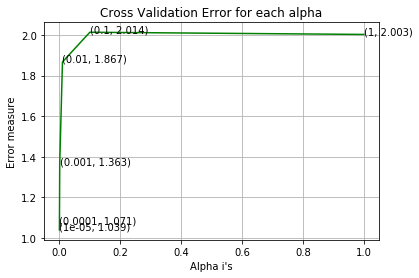

For values of best alpha =  1e-05 The train log loss is: 0.7436063454247823
For values of best alpha =  1e-05 The cross validation log loss is: 1.038795027363085
For values of best alpha =  1e-05 The test log loss is: 1.1201212068810913


In [58]:

# Train a Logistic regression+Calibration model using text features whicha re on-hot encoded
alpha = [10 ** x for x in range(-5, 1)]

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_text_feature_onehotCoding, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_text_feature_onehotCoding, y_train)
    predict_y = sig_clf.predict_proba(cv_text_feature_onehotCoding)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_text_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_text_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_text_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_text_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_text_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<p style="font-size:18px;"> <b>Q.</b> Is the Text feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p style="font-size:16px;"> <b>Ans.</b> Yes, it seems like! </p>

In [0]:
def get_intersec_text(df):
    df_text_vec = TfidfVectorizer(min_df=3)
    df_text_fea = df_text_vec.fit_transform(df['TEXT'])
    df_text_features = df_text_vec.get_feature_names()

    df_text_fea_counts = df_text_fea.sum(axis=0).A1
    df_text_fea_dict = dict(zip(list(df_text_features),df_text_fea_counts))
    len1 = len(set(df_text_features))
    len2 = len(set(train_text_features) & set(df_text_features))
    return len1,len2

In [60]:
len1,len2 = get_intersec_text(test_df)
print(np.round((len2/len1)*100, 3), "% of word of test data appeared in train data")
len1,len2 = get_intersec_text(cv_df)
print(np.round((len2/len1)*100, 3), "% of word of Cross Validation appeared in train data")

3.363 % of word of test data appeared in train data
4.198 % of word of Cross Validation appeared in train data


# Applying all the models with tf-idf features and Instead of using all the words in the dataset, using only the top 1000 words based of tf-idf values

<h1>4. Machine Learning Models</h1>

In [0]:
#Data preparation for ML models.

#Misc. functionns for ML models


def predict_and_plot_confusion_matrix(train_x, train_y,test_x, test_y, clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    pred_y = sig_clf.predict(test_x)

    # for calculating log_loss we willl provide the array of probabilities belongs to each class
    print("Log loss :",log_loss(test_y, sig_clf.predict_proba(test_x)))
    # calculating the number of data points that are misclassified
    print("Number of mis-classified points :", np.count_nonzero((pred_y- test_y))/test_y.shape[0])
    plot_confusion_matrix(test_y, pred_y)

In [0]:
def report_log_loss(train_x, train_y, test_x, test_y,  clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    sig_clf_probs = sig_clf.predict_proba(test_x)
    return log_loss(test_y, sig_clf_probs, eps=1e-15)

In [0]:
# this function will be used just for naive bayes
# for the given indices, we will print the name of the features
# and we will check whether the feature present in the test point text or not
def get_impfeature_names(indices, text, gene, var, no_features):
    gene_count_vec = TfidfVectorizer()
    var_count_vec = TfidfVectorizer()
    text_count_vec = TfidfVectorizer(min_df=3)
    
    gene_vec = gene_count_vec.fit(train_df['Gene'])
    var_vec  = var_count_vec.fit(train_df['Variation'])
    text_vec = text_count_vec.fit(train_df['TEXT'])
    
    fea1_len = len(gene_vec.get_feature_names())
    fea2_len = len(var_count_vec.get_feature_names())
    
    word_present = 0
    for i,v in enumerate(indices):
        if (v < fea1_len):
            word = gene_vec.get_feature_names()[v]
            yes_no = True if word == gene else False
            if yes_no:
                word_present += 1
                print(i, "Gene feature [{}] present in test data point [{}]".format(word,yes_no))
        elif (v < fea1_len+fea2_len):
            word = var_vec.get_feature_names()[v-(fea1_len)]
            yes_no = True if word == var else False
            if yes_no:
                word_present += 1
                print(i, "variation feature [{}] present in test data point [{}]".format(word,yes_no))
        else:
            word = text_vec.get_feature_names()[v-(fea1_len+fea2_len)]
            yes_no = True if word in text.split() else False
            if yes_no:
                word_present += 1
                print(i, "Text feature [{}] present in test data point [{}]".format(word,yes_no))

    print("Out of the top ",no_features," features ", word_present, "are present in query point")

<p style="font-size:24px;text-align:Center"> <b>Stacking the three types of features </b><p>

In [0]:
# merging gene, variance and text features

# building train, test and cross validation data sets
# a = [[1, 2], 
#      [3, 4]]
# b = [[4, 5], 
#      [6, 7]]
# hstack(a, b) = [[1, 2, 4, 5],
#                [ 3, 4, 6, 7]]

train_gene_var_onehotCoding = hstack((train_gene_feature_onehotCoding,train_variation_feature_onehotCoding))
test_gene_var_onehotCoding = hstack((test_gene_feature_onehotCoding,test_variation_feature_onehotCoding))
cv_gene_var_onehotCoding = hstack((cv_gene_feature_onehotCoding,cv_variation_feature_onehotCoding))

train_x_onehotCoding = hstack((train_gene_var_onehotCoding, train_text_feature_onehotCoding)).tocsr()
train_y = np.array(list(train_df['Class']))

test_x_onehotCoding = hstack((test_gene_var_onehotCoding, test_text_feature_onehotCoding)).tocsr()
test_y = np.array(list(test_df['Class']))

cv_x_onehotCoding = hstack((cv_gene_var_onehotCoding, cv_text_feature_onehotCoding)).tocsr()
cv_y = np.array(list(cv_df['Class']))


train_gene_var_responseCoding = np.hstack((train_gene_feature_responseCoding,train_variation_feature_responseCoding))
test_gene_var_responseCoding = np.hstack((test_gene_feature_responseCoding,test_variation_feature_responseCoding))
cv_gene_var_responseCoding = np.hstack((cv_gene_feature_responseCoding,cv_variation_feature_responseCoding))

train_x_responseCoding = np.hstack((train_gene_var_responseCoding, train_text_feature_responseCoding))
test_x_responseCoding = np.hstack((test_gene_var_responseCoding, test_text_feature_responseCoding))
cv_x_responseCoding = np.hstack((cv_gene_var_responseCoding, cv_text_feature_responseCoding))


In [166]:
print("One hot encoding features :")
print("(number of data points * number of features) in train data = ", train_x_onehotCoding.shape)
print("(number of data points * number of features) in test data = ", test_x_onehotCoding.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_onehotCoding.shape)

One hot encoding features :
(number of data points * number of features) in train data =  (2124, 3190)
(number of data points * number of features) in test data =  (665, 3190)
(number of data points * number of features) in cross validation data = (532, 3190)


In [167]:
print(" Response encoding features :")
print("(number of data points * number of features) in train data = ", train_x_responseCoding.shape)
print("(number of data points * number of features) in test data = ", test_x_responseCoding.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_responseCoding.shape)

 Response encoding features :
(number of data points * number of features) in train data =  (2124, 27)
(number of data points * number of features) in test data =  (665, 27)
(number of data points * number of features) in cross validation data = (532, 27)


<h2>4.1. Base Line Model</h2>

<h3>4.1.1. Naive Bayes</h3>

<h4>4.1.1.1. Hyper parameter tuning</h4>

for alpha = 1e-05
Log Loss : 1.2466060080372965
for alpha = 0.0001
Log Loss : 1.2463568702765122
for alpha = 0.001
Log Loss : 1.2453220355983357
for alpha = 0.1
Log Loss : 1.2745590995276217
for alpha = 1
Log Loss : 1.3581797932844795
for alpha = 10
Log Loss : 1.5438139246475282
for alpha = 100
Log Loss : 1.538062169931793
for alpha = 1000
Log Loss : 1.5313814851855765


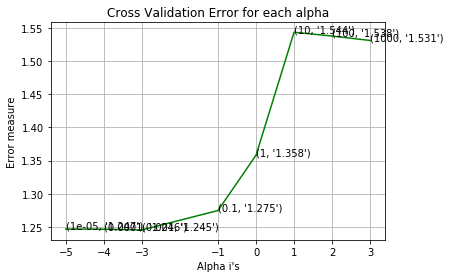

For values of best alpha =  0.001 The train log loss is: 0.5190951441474505
For values of best alpha =  0.001 The cross validation log loss is: 1.2453220355983357
For values of best alpha =  0.001 The test log loss is: 1.1959606341102087


In [205]:
# find more about Multinomial Naive base function here http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
# -------------------------
# default paramters
# sklearn.naive_bayes.MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)

# some of methods of MultinomialNB()
# fit(X, y[, sample_weight])	Fit Naive Bayes classifier according to X, y
# predict(X)	Perform classification on an array of test vectors X.
# predict_log_proba(X)	Return log-probability estimates for the test vector X.
# -----------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/naive-bayes-algorithm-1/
# -----------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
# ----------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/naive-bayes-algorithm-1/
# -----------------------


alpha = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = MultinomialNB(alpha=i)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(np.log10(alpha), cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),cv_log_error_array[i]))
plt.grid()
plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)


predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<h4>4.1.1.2. Testing the model with best hyper paramters</h4>

Log Loss : 1.2453220355983357
Number of missclassified point : 0.39285714285714285
-------------------- Confusion matrix --------------------


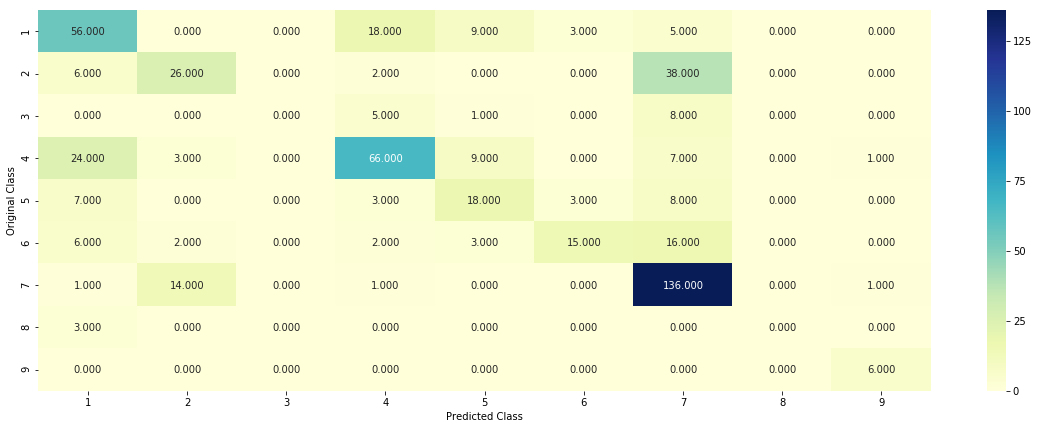

-------------------- Precision matrix (Columm Sum=1) --------------------


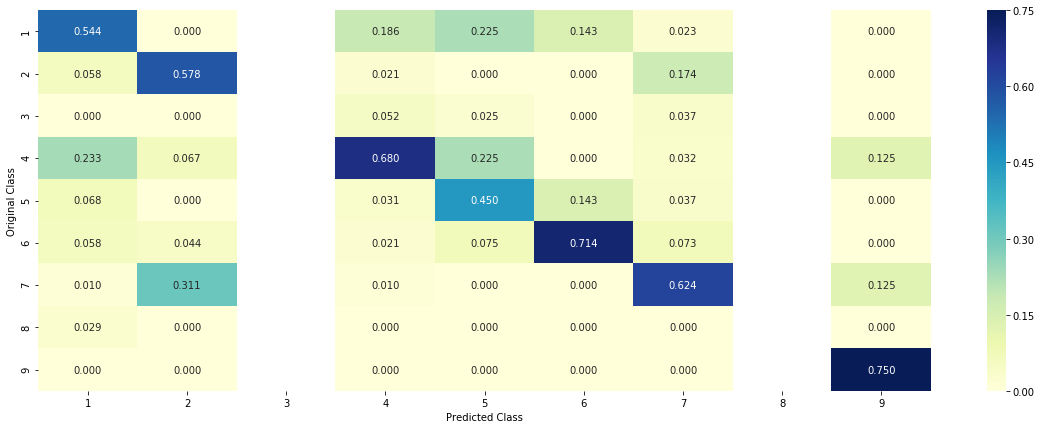

-------------------- Recall matrix (Row sum=1) --------------------


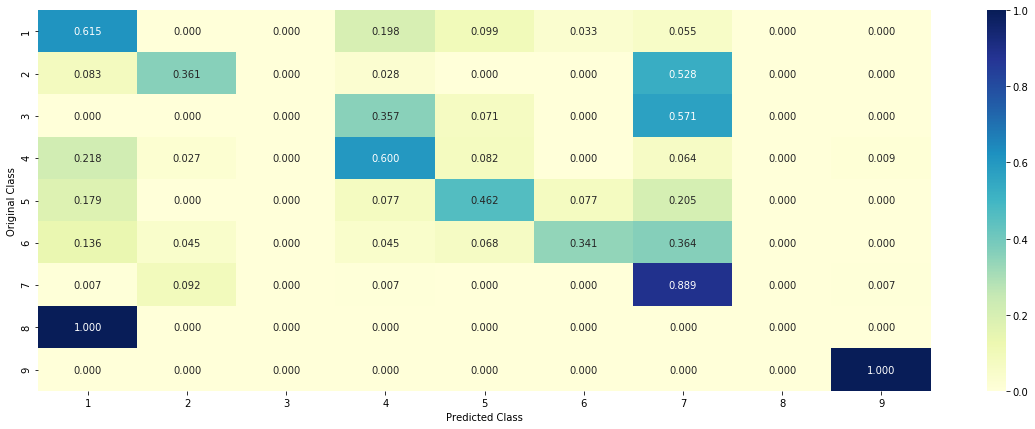

In [206]:
# find more about Multinomial Naive base function here http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
# -------------------------
# default paramters
# sklearn.naive_bayes.MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)

# some of methods of MultinomialNB()
# fit(X, y[, sample_weight])	Fit Naive Bayes classifier according to X, y
# predict(X)	Perform classification on an array of test vectors X.
# predict_log_proba(X)	Return log-probability estimates for the test vector X.
# -----------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/naive-bayes-algorithm-1/
# -----------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
# ----------------------------

clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)
sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
# to avoid rounding error while multiplying probabilites we use log-probability estimates
print("Log Loss :",log_loss(cv_y, sig_clf_probs))
print("Number of missclassified point :", np.count_nonzero((sig_clf.predict(cv_x_onehotCoding)- cv_y))/cv_y.shape[0])
plot_confusion_matrix(cv_y, sig_clf.predict(cv_x_onehotCoding.toarray()))

<h4>4.1.1.3. Feature Importance, Correctly classified point</h4>

In [207]:
test_point_index = 1
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0],
                     test_df['TEXT'].iloc[test_point_index],
                     test_df['Gene'].iloc[test_point_index],
                     test_df['Variation'].iloc[test_point_index],
                     no_feature)

Predicted Class : 1
Predicted Class Probabilities: [[0.7109 0.0449 0.0114 0.0673 0.0358 0.0334 0.0902 0.0034 0.0026]]
Actual Class : 1
--------------------------------------------------
77 Text feature [122] present in test data point [True]
93 Text feature [116] present in test data point [True]
Out of the top  100  features  2 are present in query point


<h4>4.1.1.4. Feature Importance, Incorrectly classified point</h4>

In [210]:
test_point_index = 10
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.0568 0.0456 0.0105 0.0622 0.0394 0.0306 0.7494 0.0031 0.0024]]
Actual Class : 2
--------------------------------------------------
33 Text feature [0e] present in test data point [True]
42 Text feature [100] present in test data point [True]
75 Text feature m] present in test data point [True]
Out of the top  100  features  3 are present in query point


<h2>4.2. K Nearest Neighbour Classification</h2>

<h3>4.2.1. Hyper parameter tuning</h3>

for alpha = 5
Log Loss : 1.0860820664710644
for alpha = 11
Log Loss : 1.0788713779692127
for alpha = 15
Log Loss : 1.0703256427998864
for alpha = 21
Log Loss : 1.0813248225207956
for alpha = 31
Log Loss : 1.0913963489155392
for alpha = 41
Log Loss : 1.0975521461008402
for alpha = 51
Log Loss : 1.109273050354761
for alpha = 99
Log Loss : 1.1790223163478109


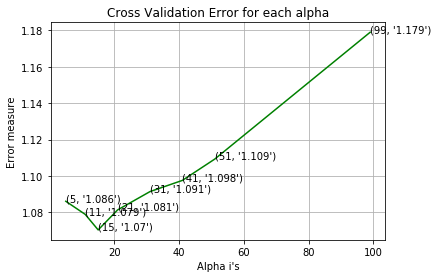

For values of best alpha =  15 The train log loss is: 0.7094128659925104
For values of best alpha =  15 The cross validation log loss is: 1.0703256427998864
For values of best alpha =  15 The test log loss is: 1.096197280055569


In [172]:
# find more about KNeighborsClassifier() here http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# -------------------------
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

# methods of
# fit(X, y) : Fit the model using X as training data and y as target values
# predict(X):Predict the class labels for the provided data
# predict_proba(X):Return probability estimates for the test data X.
#-------------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/k-nearest-neighbors-geometric-intuition-with-a-toy-example-1/
#-------------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------


alpha = [5, 11, 15, 21, 31, 41, 51, 99]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(train_x_responseCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_responseCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_responseCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_responseCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_responseCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_responseCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<h3>4.2.2. Testing the model with best hyper paramters</h3>

Log loss : 1.0703256427998864
Number of mis-classified points : 0.37218045112781956
-------------------- Confusion matrix --------------------


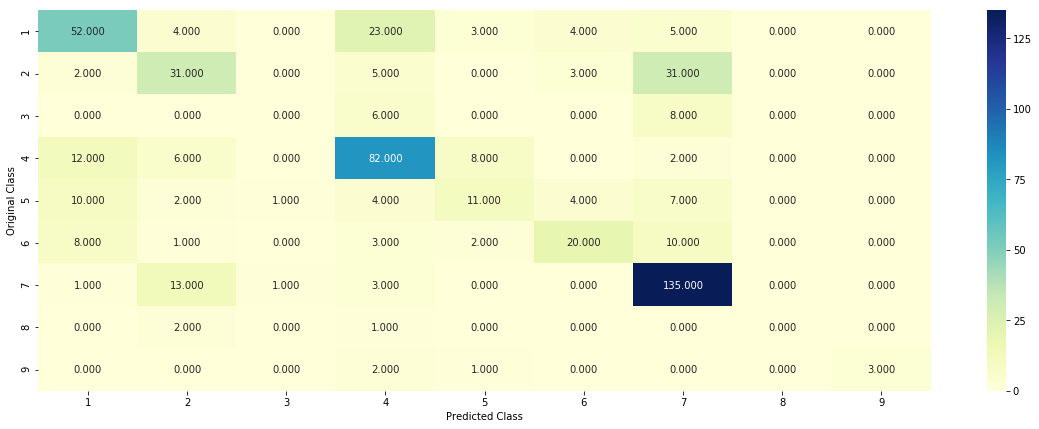

-------------------- Precision matrix (Columm Sum=1) --------------------


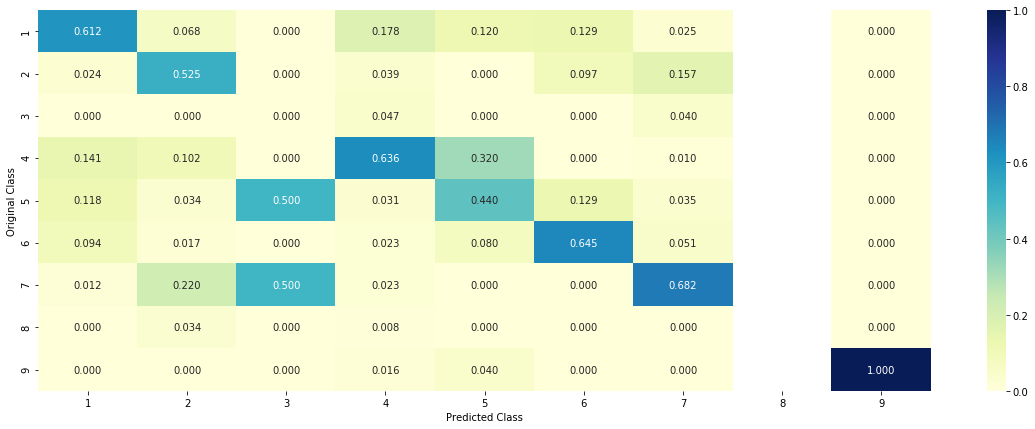

-------------------- Recall matrix (Row sum=1) --------------------


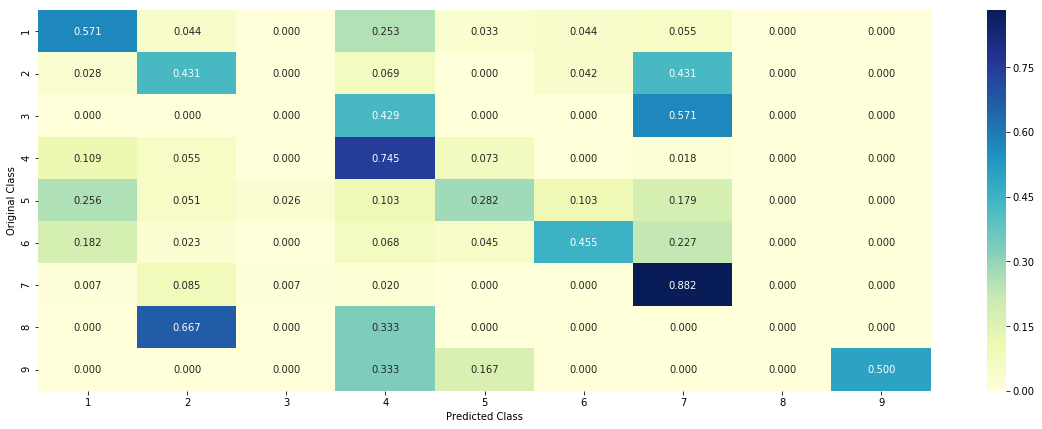

In [173]:
# find more about KNeighborsClassifier() here http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# -------------------------
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

# methods of
# fit(X, y) : Fit the model using X as training data and y as target values
# predict(X):Predict the class labels for the provided data
# predict_proba(X):Return probability estimates for the test data X.
#-------------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/k-nearest-neighbors-geometric-intuition-with-a-toy-example-1/
#-------------------------------------
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
predict_and_plot_confusion_matrix(train_x_responseCoding, train_y, cv_x_responseCoding, cv_y, clf)

<h3>4.2.3.Sample Query point -1</h3>

In [174]:
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

test_point_index = 1
predicted_cls = sig_clf.predict(test_x_responseCoding[test_point_index].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Actual Class :", test_y[test_point_index])
neighbors = clf.kneighbors(test_x_responseCoding[test_point_index].reshape(1, -1), alpha[best_alpha])
print("The ",alpha[best_alpha]," nearest neighbours of the test points belongs to classes",train_y[neighbors[1][0]])
print("Fequency of nearest points :",Counter(train_y[neighbors[1][0]]))

Predicted Class : 1
Actual Class : 1
The  15  nearest neighbours of the test points belongs to classes [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Fequency of nearest points : Counter({1: 15})


<h3>4.2.4. Sample Query Point-2 </h3>

In [175]:
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

test_point_index = 10

predicted_cls = sig_clf.predict(test_x_responseCoding[test_point_index].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Actual Class :", test_y[test_point_index])
neighbors = clf.kneighbors(test_x_responseCoding[test_point_index].reshape(1, -1), alpha[best_alpha])
print("the k value for knn is",alpha[best_alpha],"and the nearest neighbours of the test points belongs to classes",train_y[neighbors[1][0]])
print("Fequency of nearest points :",Counter(train_y[neighbors[1][0]]))

Predicted Class : 7
Actual Class : 2
the k value for knn is 15 and the nearest neighbours of the test points belongs to classes [5 7 7 7 7 7 7 7 7 7 5 5 5 7 5]
Fequency of nearest points : Counter({7: 10, 5: 5})


<h2>4.3. Logistic Regression</h2>

<h3>4.3.1. With Class balancing</h3>

<h4>4.3.1.1. Hyper paramter tuning</h4>

for alpha = 1e-06
Log Loss : 1.2274284960029118
for alpha = 1e-05
Log Loss : 1.1214198455670727
for alpha = 0.0001
Log Loss : 1.0848813634965457
for alpha = 0.001
Log Loss : 1.1120965043402358
for alpha = 0.01
Log Loss : 1.2615717598482594
for alpha = 0.1
Log Loss : 1.6894073582526092
for alpha = 1
Log Loss : 1.8490256649522534
for alpha = 10
Log Loss : 1.865426543794155
for alpha = 100
Log Loss : 1.8672491455738915


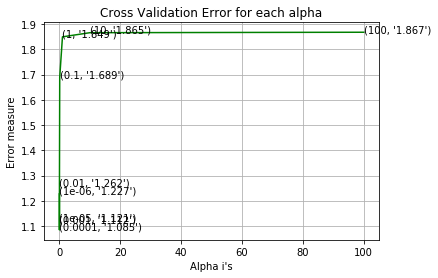

For values of best alpha =  0.0001 The train log loss is: 0.4391101416466916
For values of best alpha =  0.0001 The cross validation log loss is: 1.0848813634965457
For values of best alpha =  0.0001 The test log loss is: 1.0462007267797355


In [176]:

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

<h4>4.3.1.2. Testing the model with best hyper paramters</h4>

Log loss : 1.0848813634965457
Number of mis-classified points : 0.3815789473684211
-------------------- Confusion matrix --------------------


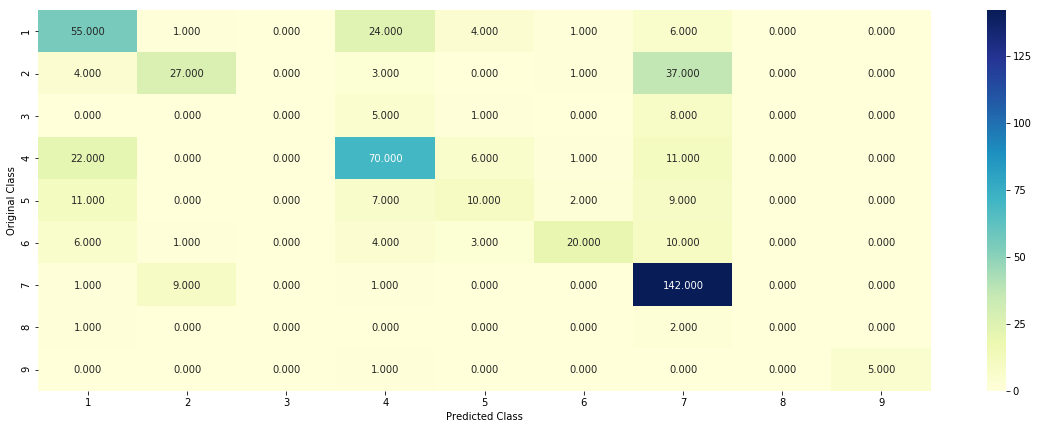

-------------------- Precision matrix (Columm Sum=1) --------------------


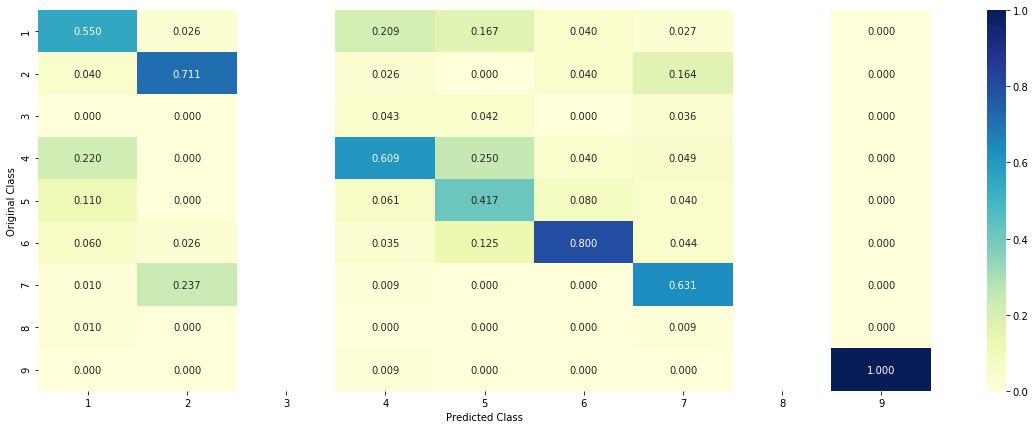

-------------------- Recall matrix (Row sum=1) --------------------


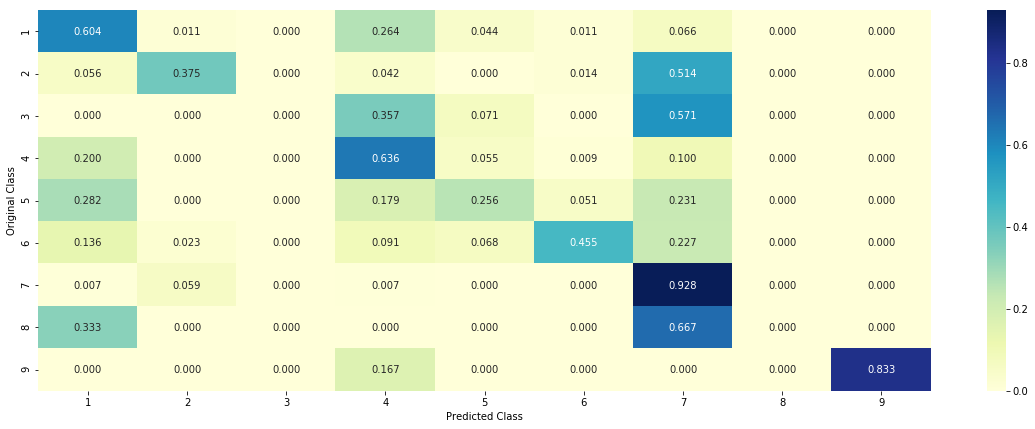

In [177]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y, cv_x_onehotCoding, cv_y, clf)

<h4>4.3.1.3. Feature Importance</h4>

In [0]:
def get_imp_feature_names(text, indices, removed_ind = []):
    word_present = 0
    tabulte_list = []
    incresingorder_ind = 0
    for i in indices:
        if i < train_gene_feature_onehotCoding.shape[1]:
            tabulte_list.append([incresingorder_ind, "Gene", "Yes"])
        elif i< 18:
            tabulte_list.append([incresingorder_ind,"Variation", "Yes"])
        if ((i > 17) & (i not in removed_ind)) :
            word = train_text_features[i]
            yes_no = True if word in text.split() else False
            if yes_no:
                word_present += 1
            tabulte_list.append([incresingorder_ind,train_text_features[i], yes_no])
        incresingorder_ind += 1
    print(word_present, "most importent features are present in our query point")
    print("-"*50)
    print("The features that are most importent of the ",predicted_cls[0]," class:")
    print (tabulate(tabulte_list, headers=["Index",'Feature name', 'Present or Not']))

<h5>4.3.1.3.1. Correctly Classified point</h5>

In [179]:
# from tabulate import tabulate
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding,train_y)
test_point_index = 1
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 1
Predicted Class Probabilities: [[9.741e-01 4.000e-04 7.000e-04 1.100e-02 4.100e-03 7.600e-03 4.000e-04
  1.800e-03 1.000e-04]]
Actual Class : 1
--------------------------------------------------
308 Text feature [12] present in test data point [True]
368 Text feature [025] present in test data point [True]
Out of the top  500  features  2 are present in query point


In [211]:
test_point_index = 10
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.0568 0.0456 0.0105 0.0622 0.0394 0.0306 0.7494 0.0031 0.0024]]
Actual Class : 2
--------------------------------------------------
33 Text feature [0e] present in test data point [True]
42 Text feature [100] present in test data point [True]
75 Text feature m] present in test data point [True]
148 Text feature in] present in test data point [True]
153 Text feature [111] present in test data point [True]
163 Text feature [02] present in test data point [True]
170 Text feature [108] present in test data point [True]
207 Text feature [10] present in test data point [True]
216 Text feature [096] present in test data point [True]
235 Text feature [1000] present in test data point [True]
296 Text feature [123] present in test data point [True]
297 Text feature [100ng] present in test data point [True]
303 Text feature [000xg] present in test data point [True]
376 Text feature [06] present in test data point [True]
414 Text feature [1200]

<h3>4.3.2. Without Class balancing</h3>

<h4>4.3.2.1. Hyper paramter tuning</h4>

for alpha = 1e-06
Log Loss : 1.2290836926360875
for alpha = 1e-05
Log Loss : 1.1426451256652066
for alpha = 0.0001
Log Loss : 1.1106650816288495
for alpha = 0.001
Log Loss : 1.1933329299764979
for alpha = 0.01
Log Loss : 1.3960647462771514
for alpha = 0.1
Log Loss : 1.7264143596627215
for alpha = 1
Log Loss : 1.8442909321085794


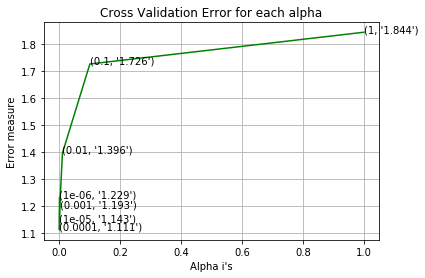

For values of best alpha =  0.0001 The train log loss is: 0.4303936482883896
For values of best alpha =  0.0001 The cross validation log loss is: 1.1106650816288495
For values of best alpha =  0.0001 The test log loss is: 1.0645990818308637


In [212]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------



# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [10 ** x for x in range(-6, 1)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

<h4>4.3.2.2. Testing model with best hyper parameters</h4>

Log loss : 1.1106650816288495
Number of mis-classified points : 0.3815789473684211
-------------------- Confusion matrix --------------------


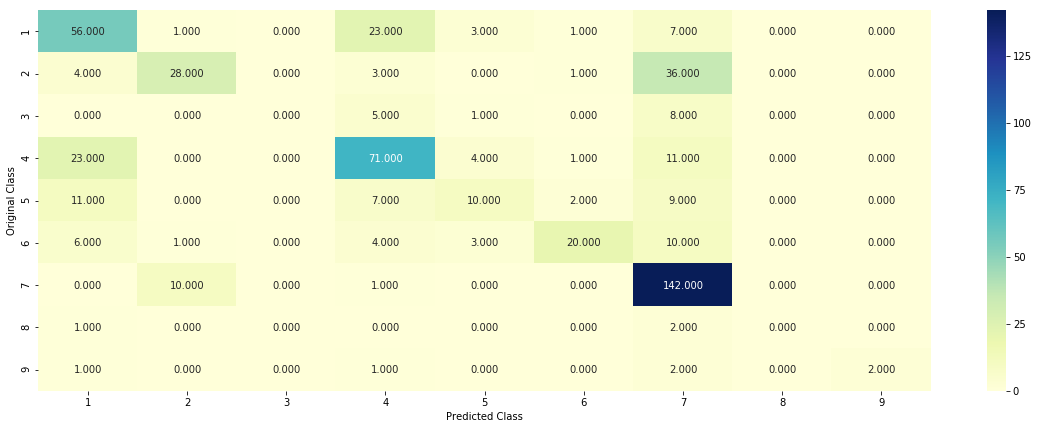

-------------------- Precision matrix (Columm Sum=1) --------------------


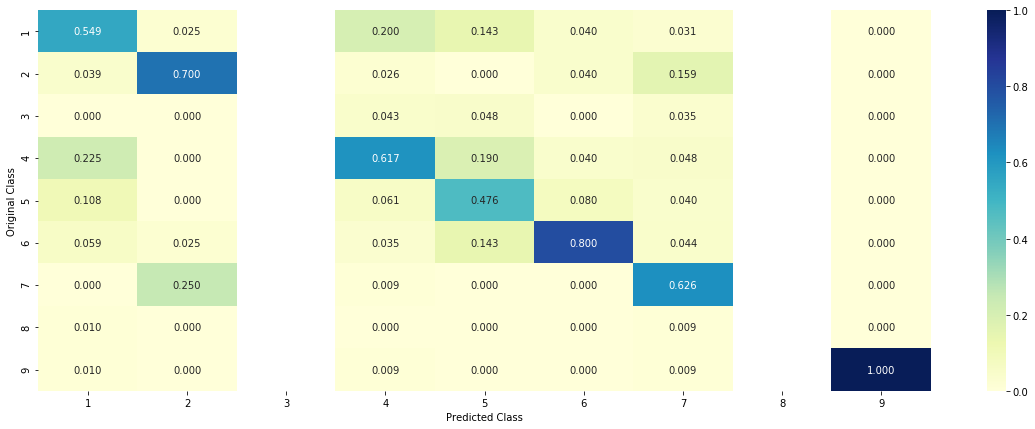

-------------------- Recall matrix (Row sum=1) --------------------


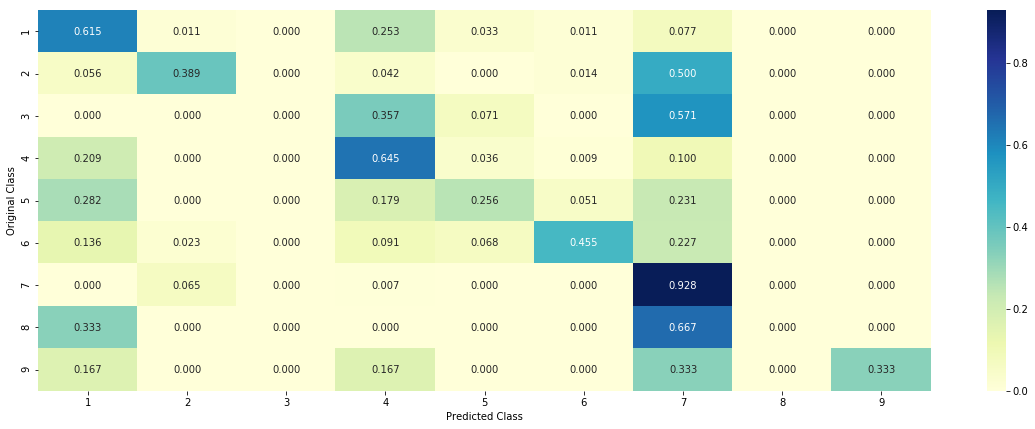

In [213]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------

clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y, cv_x_onehotCoding, cv_y, clf)

<h4>4.3.2.3. Feature Importance, Correctly Classified point</h4>

In [183]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding,train_y)
test_point_index = 1
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 1
Predicted Class Probabilities: [[9.754e-01 4.000e-04 8.000e-04 1.250e-02 4.100e-03 5.900e-03 5.000e-04
  4.000e-04 0.000e+00]]
Actual Class : 1
--------------------------------------------------
291 Text feature [12] present in test data point [True]
345 Text feature [025] present in test data point [True]
Out of the top  500  features  2 are present in query point


<h4>4.3.2.4. Feature Importance, Inorrectly Classified point</h4>

In [214]:
test_point_index = 10
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[7.000e-03 2.580e-02 1.200e-03 4.100e-03 7.200e-02 2.500e-03 8.867e-01
  7.000e-04 0.000e+00]]
Actual Class : 2
--------------------------------------------------
192 Text feature [096] present in test data point [True]
420 Text feature [000] present in test data point [True]
Out of the top  500  features  2 are present in query point


<h2>4.4. Linear Support Vector Machines</h2>

<h3>4.4.1. Hyper paramter tuning</h3>

for C = 1e-05
Log Loss : 1.1551158656452116
for C = 0.0001
Log Loss : 1.0842437071619802
for C = 0.001
Log Loss : 1.1114745271569462
for C = 0.01
Log Loss : 1.429570495498919
for C = 0.1
Log Loss : 1.6970866768934372
for C = 1
Log Loss : 1.8676715951219383
for C = 10
Log Loss : 1.8676701173010806
for C = 100
Log Loss : 1.8676702934181373


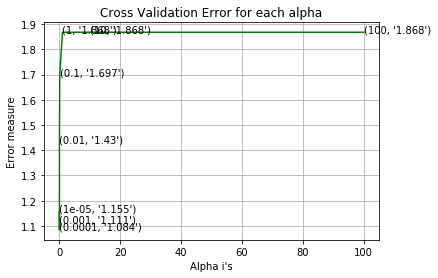

For values of best alpha =  0.0001 The train log loss is: 0.3797633061406742
For values of best alpha =  0.0001 The cross validation log loss is: 1.0842437071619802
For values of best alpha =  0.0001 The test log loss is: 1.0836277445265972


In [185]:
# read more about support vector machines with linear kernals here http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# --------------------------------
# default parameters 
# SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, 
# cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)

# Some of methods of SVM()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/mathematical-derivation-copy-8/
# --------------------------------



# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [10 ** x for x in range(-5, 3)]
cv_log_error_array = []
for i in alpha:
    print("for C =", i)
#     clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
    clf = SGDClassifier( class_weight='balanced', alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
# clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

<h3>4.4.2. Testing model with best hyper parameters</h3>

Log loss : 1.0842437071619802
Number of mis-classified points : 0.37030075187969924
-------------------- Confusion matrix --------------------


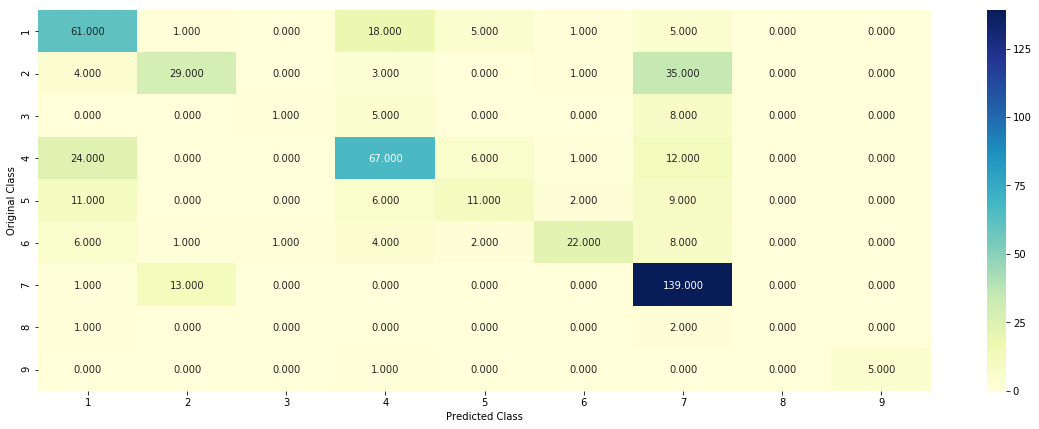

-------------------- Precision matrix (Columm Sum=1) --------------------


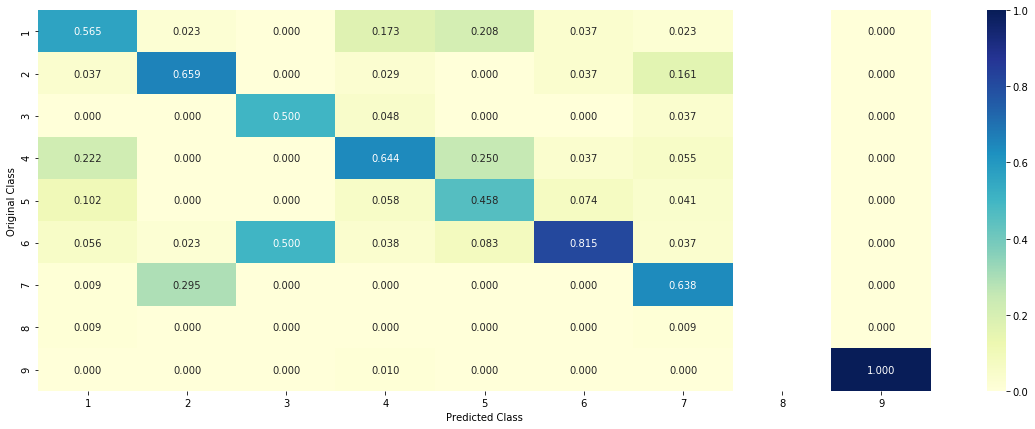

-------------------- Recall matrix (Row sum=1) --------------------


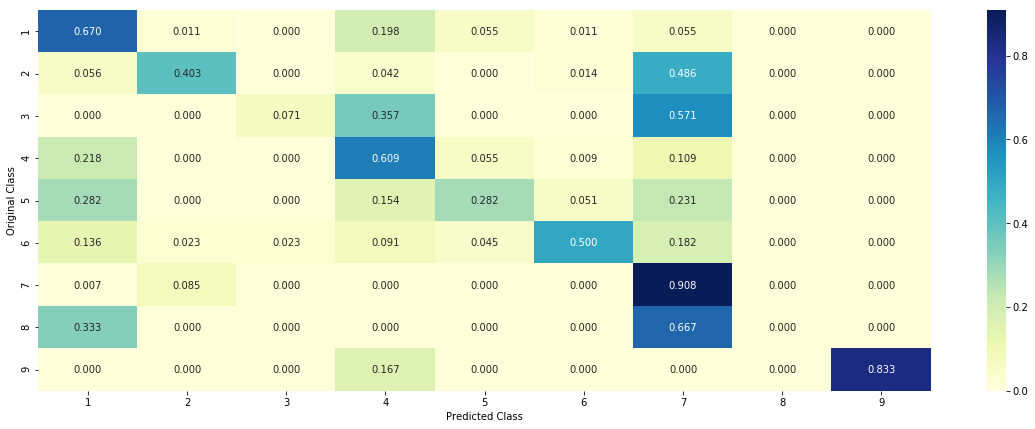

In [186]:
# read more about support vector machines with linear kernals here http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# --------------------------------
# default parameters 
# SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, 
# cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)

# Some of methods of SVM()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/mathematical-derivation-copy-8/
# --------------------------------


# clf = SVC(C=alpha[best_alpha],kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42,class_weight='balanced')
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y,cv_x_onehotCoding,cv_y, clf)

<h3>4.3.3. Feature Importance</h3>

<h4>4.3.3.1. For Correctly classified point</h4>

In [187]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_x_onehotCoding,train_y)
test_point_index = 1
# test_point_index = 100
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 1
Predicted Class Probabilities: [[9.703e-01 2.000e-03 8.000e-04 3.600e-03 6.700e-03 1.090e-02 3.600e-03
  1.400e-03 6.000e-04]]
Actual Class : 1
--------------------------------------------------
248 Text feature [12] present in test data point [True]
251 Text feature [025] present in test data point [True]
474 Text feature [11] present in test data point [True]
Out of the top  500  features  3 are present in query point


<h4>4.3.3.2. For Incorrectly classified point</h4>

In [215]:
test_point_index = 10
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[7.000e-03 2.580e-02 1.200e-03 4.100e-03 7.200e-02 2.500e-03 8.867e-01
  7.000e-04 0.000e+00]]
Actual Class : 2
--------------------------------------------------
192 Text feature [096] present in test data point [True]
420 Text feature [000] present in test data point [True]
Out of the top  500  features  2 are present in query point


<h2>4.5 Random Forest Classifier</h2>

<h3>4.5.1. Hyper paramter tuning (With One hot Encoding)</h3>

for n_estimators = 100 and max depth =  5
Log Loss : 1.253727655993747
for n_estimators = 100 and max depth =  10
Log Loss : 1.2681165760467827
for n_estimators = 200 and max depth =  5
Log Loss : 1.2531402283957953
for n_estimators = 200 and max depth =  10
Log Loss : 1.2612750609221963
for n_estimators = 500 and max depth =  5
Log Loss : 1.248138147298908
for n_estimators = 500 and max depth =  10
Log Loss : 1.2500285963419668
for n_estimators = 1000 and max depth =  5
Log Loss : 1.2447098408222843
for n_estimators = 1000 and max depth =  10
Log Loss : 1.2476234419813474
for n_estimators = 2000 and max depth =  5
Log Loss : 1.2417393696113284
for n_estimators = 2000 and max depth =  10
Log Loss : 1.2472866953416082


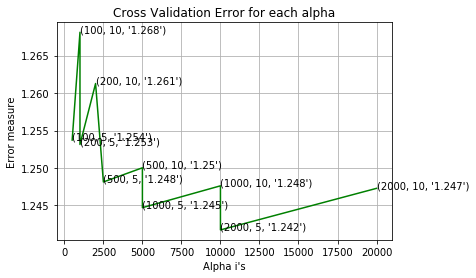

For values of best estimator =  2000 The train log loss is: 0.8405502224600017
For values of best estimator =  2000 The cross validation log loss is: 1.2417393696113284
For values of best estimator =  2000 The test log loss is: 1.2217626602650162


In [216]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [100,200,500,1000,2000]
max_depth = [5, 10]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(train_x_onehotCoding, train_y)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_x_onehotCoding, train_y)
        sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
        cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
features = np.dot(np.array(alpha)[:,None],np.array(max_depth)[None]).ravel()
ax.plot(features, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[int(i/2)],max_depth[int(i%2)],str(txt)), (features[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

<h3>4.5.2. Testing model with best hyper parameters (One Hot Encoding)</h3>

Log loss : 1.2417393696113284
Number of mis-classified points : 0.4342105263157895
-------------------- Confusion matrix --------------------


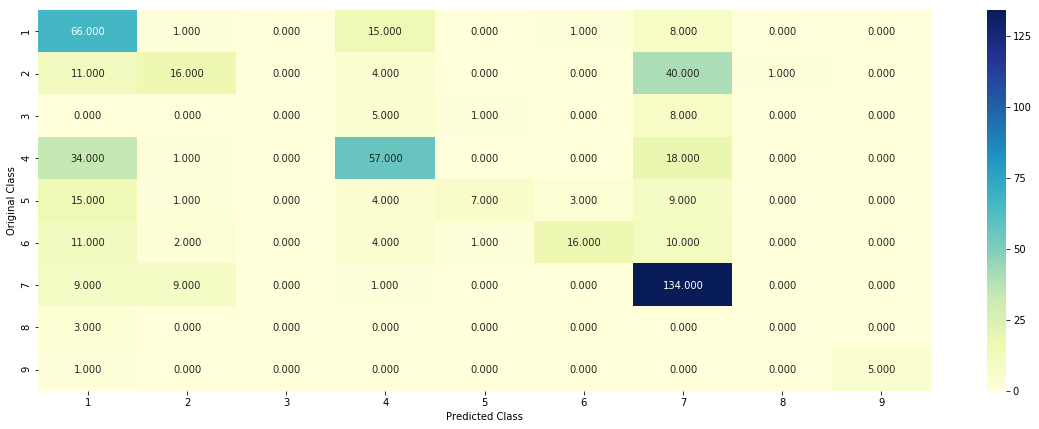

-------------------- Precision matrix (Columm Sum=1) --------------------


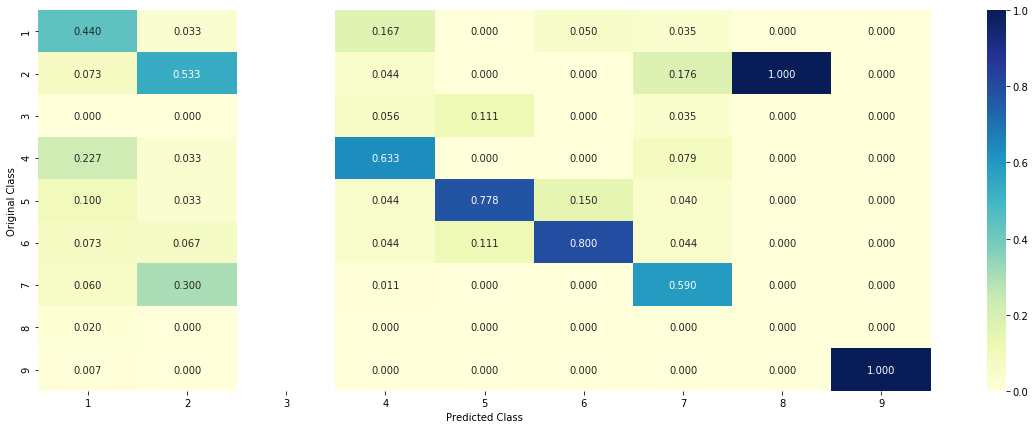

-------------------- Recall matrix (Row sum=1) --------------------


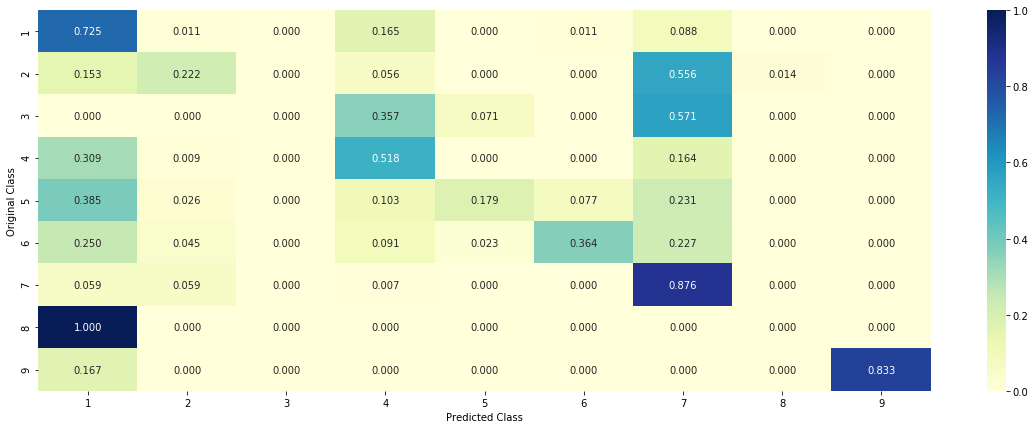

In [190]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y,cv_x_onehotCoding,cv_y, clf)

<h3>4.5.3. Feature Importance</h3>

<h4>4.5.3.1. Correctly Classified point</h4>

In [191]:
# test_point_index = 10
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

test_point_index = 1
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
get_impfeature_names(indices[:no_feature], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 1
Predicted Class Probabilities: [[0.5532 0.0152 0.0133 0.278  0.0551 0.041  0.0259 0.0073 0.0111]]
Actual Class : 1
--------------------------------------------------
21 Text feature [10d] present in test data point [True]
72 Text feature [110] present in test data point [True]
94 Text feature [1118] present in test data point [True]
Out of the top  100  features  3 are present in query point


<h4>4.5.3.2. Inorrectly Classified point</h4>

In [192]:
test_point_index = 5
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actuall Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
get_impfeature_names(indices[:no_feature], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 1
Predicted Class Probabilities: [[0.4794 0.0282 0.0122 0.2836 0.0537 0.0404 0.0621 0.01   0.0304]]
Actuall Class : 4
--------------------------------------------------
43 Text feature [06519] present in test data point [True]
Out of the top  100  features  1 are present in query point


<h3>4.5.3. Hyper paramter tuning (With Response Coding)</h3>

for n_estimators = 10 and max depth =  2
Log Loss : 2.259411537343095
for n_estimators = 10 and max depth =  3
Log Loss : 1.8737102537769923
for n_estimators = 10 and max depth =  5
Log Loss : 1.6675243240055309
for n_estimators = 10 and max depth =  10
Log Loss : 2.2172610007389175
for n_estimators = 50 and max depth =  2
Log Loss : 1.84068446539125
for n_estimators = 50 and max depth =  3
Log Loss : 1.5990922167061148
for n_estimators = 50 and max depth =  5
Log Loss : 1.408690541797435
for n_estimators = 50 and max depth =  10
Log Loss : 2.038852825749797
for n_estimators = 100 and max depth =  2
Log Loss : 1.7487480290402089
for n_estimators = 100 and max depth =  3
Log Loss : 1.6561334476589264
for n_estimators = 100 and max depth =  5
Log Loss : 1.4544734336574008
for n_estimators = 100 and max depth =  10
Log Loss : 1.9538037119060405
for n_estimators = 200 and max depth =  2
Log Loss : 1.7891048037496495
for n_estimators = 200 and max depth =  3
Log Loss : 1.6777191570289645
fo

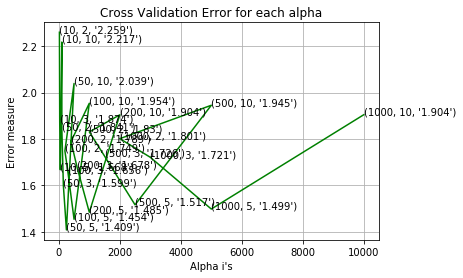

For values of best alpha =  50 The train log loss is: 0.05259849429675143
For values of best alpha =  50 The cross validation log loss is: 1.408690541797435
For values of best alpha =  50 The test log loss is: 1.3564892336435839


In [219]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [10,50,100,200,500,1000]
max_depth = [2,3,5,10]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(train_x_responseCoding, train_y)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_x_responseCoding, train_y)
        sig_clf_probs = sig_clf.predict_proba(cv_x_responseCoding)
        cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
features = np.dot(np.array(alpha)[:,None],np.array(max_depth)[None]).ravel()
ax.plot(features, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[int(i/4)],max_depth[int(i%4)],str(txt)), (features[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/4)], criterion='gini', max_depth=max_depth[int(best_alpha%4)], random_state=42, n_jobs=-1)
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_responseCoding)
print('For values of best alpha = ', alpha[int(best_alpha/4)], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_responseCoding)
print('For values of best alpha = ', alpha[int(best_alpha/4)], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_responseCoding)
print('For values of best alpha = ', alpha[int(best_alpha/4)], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

<h3>4.5.4. Testing model with best hyper parameters (Response Coding)</h3>

Log loss : 1.408690541797435
Number of mis-classified points : 0.5319548872180451
-------------------- Confusion matrix --------------------


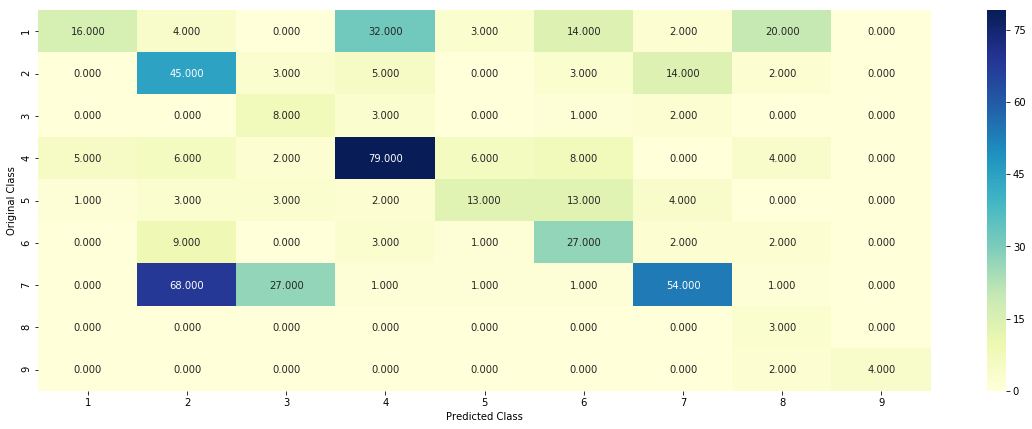

-------------------- Precision matrix (Columm Sum=1) --------------------


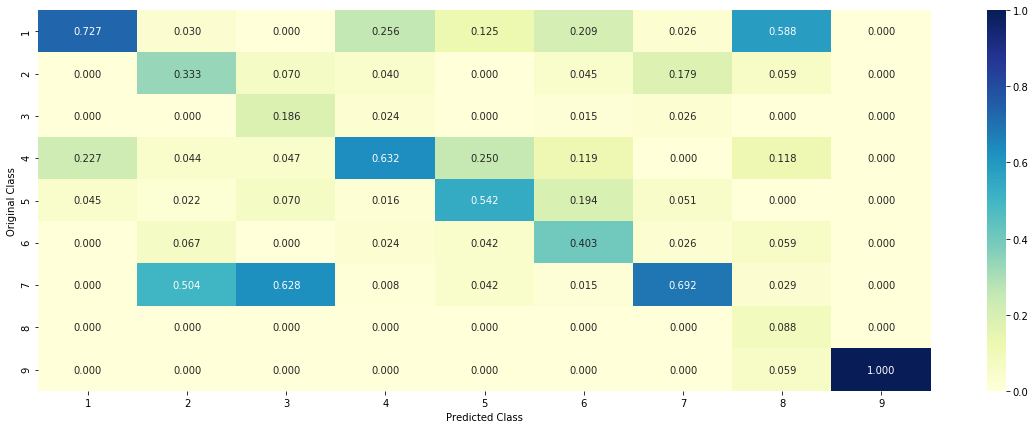

-------------------- Recall matrix (Row sum=1) --------------------


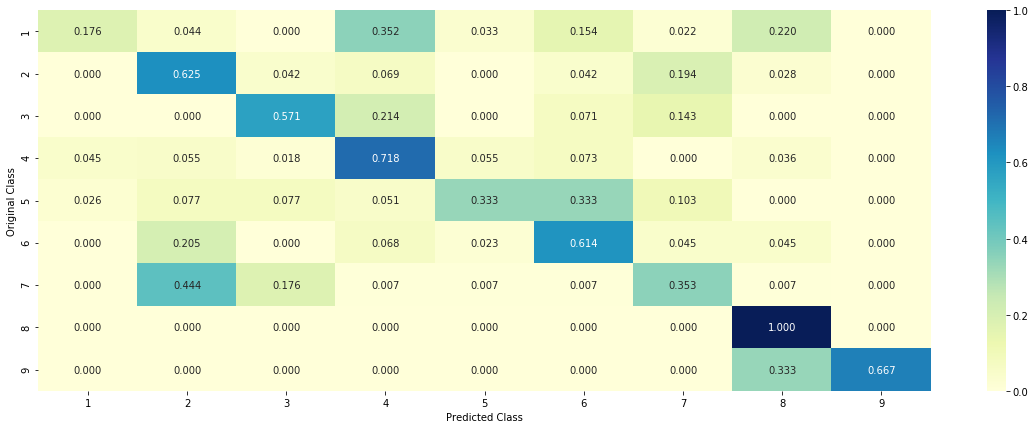

In [220]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

clf = RandomForestClassifier(max_depth=max_depth[int(best_alpha%4)], n_estimators=alpha[int(best_alpha/4)], criterion='gini', max_features='auto',random_state=42)
predict_and_plot_confusion_matrix(train_x_responseCoding, train_y,cv_x_responseCoding,cv_y, clf)

<h3>4.5.5. Feature Importance</h3>

<h4>4.5.5.1. Correctly Classified point</h4>

In [221]:
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/4)], criterion='gini', max_depth=max_depth[int(best_alpha%4)], random_state=42, n_jobs=-1)
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)


test_point_index = 1
no_feature = 27
predicted_cls = sig_clf.predict(test_x_responseCoding[test_point_index].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_responseCoding[test_point_index].reshape(1,-1)),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
for i in indices:
    if i<9:
        print("Gene is important feature")
    elif i<18:
        print("Variation is important feature")
    else:
        print("Text is important feature")

Predicted Class : 1
Predicted Class Probabilities: [[9.684e-01 9.000e-04 2.200e-03 1.430e-02 2.900e-03 6.800e-03 1.500e-03
  1.300e-03 1.600e-03]]
Actual Class : 1
--------------------------------------------------
Variation is important feature
Variation is important feature
Variation is important feature
Gene is important feature
Variation is important feature
Variation is important feature
Variation is important feature
Text is important feature
Text is important feature
Gene is important feature
Text is important feature
Text is important feature
Text is important feature
Gene is important feature
Gene is important feature
Variation is important feature
Gene is important feature
Text is important feature
Variation is important feature
Gene is important feature
Text is important feature
Text is important feature
Variation is important feature
Text is important feature
Gene is important feature
Gene is important feature
Gene is important feature


<h4>4.5.5.2. Incorrectly Classified point</h4>

In [223]:
test_point_index = 10
predicted_cls = sig_clf.predict(test_x_responseCoding[test_point_index].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_responseCoding[test_point_index].reshape(1,-1)),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
for i in indices:
    if i<9:
        print("Gene is important feature")
    elif i<18:
        print("Variation is important feature")
    else:
        print("Text is important feature")

Predicted Class : 7
Predicted Class Probabilities: [[0.0169 0.2033 0.1553 0.0267 0.0594 0.0493 0.4295 0.0426 0.017 ]]
Actual Class : 2
--------------------------------------------------
Variation is important feature
Variation is important feature
Variation is important feature
Gene is important feature
Variation is important feature
Variation is important feature
Variation is important feature
Text is important feature
Text is important feature
Gene is important feature
Text is important feature
Text is important feature
Text is important feature
Gene is important feature
Gene is important feature
Variation is important feature
Gene is important feature
Text is important feature
Variation is important feature
Gene is important feature
Text is important feature
Text is important feature
Variation is important feature
Text is important feature
Gene is important feature
Gene is important feature
Gene is important feature


<h2>4.7 Stack the models </h2>

<h3>4.7.1 testing with hyper parameter tuning</h3>

In [197]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------


# read more about support vector machines with linear kernals here http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
# --------------------------------
# default parameters 
# SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, 
# cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)

# Some of methods of SVM()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/mathematical-derivation-copy-8/
# --------------------------------


# read more about support vector machines with linear kernals here http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------


clf1 = SGDClassifier(alpha=0.001, penalty='l2', loss='log', class_weight='balanced', random_state=0)
clf1.fit(train_x_onehotCoding, train_y)
sig_clf1 = CalibratedClassifierCV(clf1, method="sigmoid")

clf2 = SGDClassifier(alpha=1, penalty='l2', loss='hinge', class_weight='balanced', random_state=0)
clf2.fit(train_x_onehotCoding, train_y)
sig_clf2 = CalibratedClassifierCV(clf2, method="sigmoid")


clf3 = MultinomialNB(alpha=0.001)
clf3.fit(train_x_onehotCoding, train_y)
sig_clf3 = CalibratedClassifierCV(clf3, method="sigmoid")

sig_clf1.fit(train_x_onehotCoding, train_y)
print("Logistic Regression :  Log Loss: %0.2f" % (log_loss(cv_y, sig_clf1.predict_proba(cv_x_onehotCoding))))
sig_clf2.fit(train_x_onehotCoding, train_y)
print("Support vector machines : Log Loss: %0.2f" % (log_loss(cv_y, sig_clf2.predict_proba(cv_x_onehotCoding))))
sig_clf3.fit(train_x_onehotCoding, train_y)
print("Naive Bayes : Log Loss: %0.2f" % (log_loss(cv_y, sig_clf3.predict_proba(cv_x_onehotCoding))))
print("-"*50)
alpha = [0.0001,0.001,0.01,0.1,1,10] 
best_alpha = 999
for i in alpha:
    lr = LogisticRegression(C=i)
    sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
    sclf.fit(train_x_onehotCoding, train_y)
    print("Stacking Classifer : for the value of alpha: %f Log Loss: %0.3f" % (i, log_loss(cv_y, sclf.predict_proba(cv_x_onehotCoding))))
    log_error =log_loss(cv_y, sclf.predict_proba(cv_x_onehotCoding))
    if best_alpha > log_error:
        best_alpha = log_error

Logistic Regression :  Log Loss: 1.11
Support vector machines : Log Loss: 1.87
Naive Bayes : Log Loss: 1.25
--------------------------------------------------
Stacking Classifer : for the value of alpha: 0.000100 Log Loss: 2.178
Stacking Classifer : for the value of alpha: 0.001000 Log Loss: 2.033
Stacking Classifer : for the value of alpha: 0.010000 Log Loss: 1.521
Stacking Classifer : for the value of alpha: 0.100000 Log Loss: 1.228
Stacking Classifer : for the value of alpha: 1.000000 Log Loss: 1.487
Stacking Classifer : for the value of alpha: 10.000000 Log Loss: 2.013


<h3>4.7.2 testing the model with the best hyper parameters</h3>

Log loss (train) on the stacking classifier : 0.5338119123486689
Log loss (CV) on the stacking classifier : 1.2284300046851235
Log loss (test) on the stacking classifier : 1.160929360427807
Number of missclassified point : 0.37293233082706767
-------------------- Confusion matrix --------------------


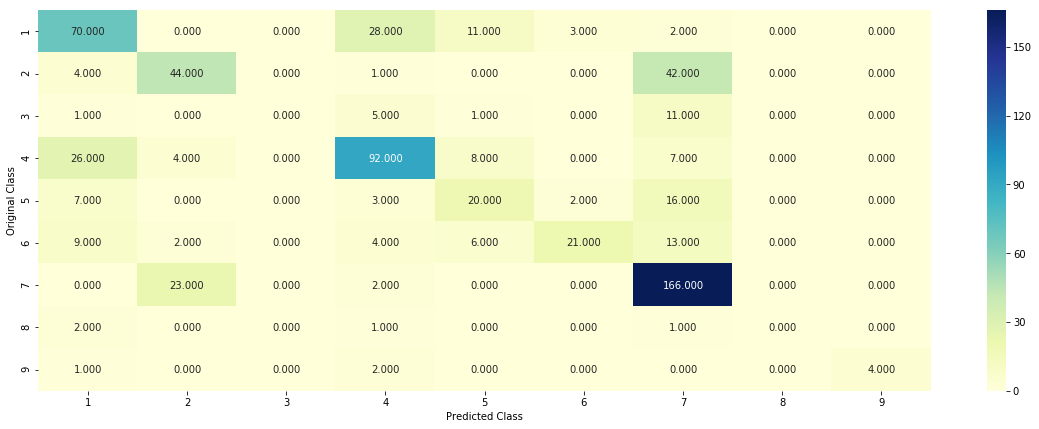

-------------------- Precision matrix (Columm Sum=1) --------------------


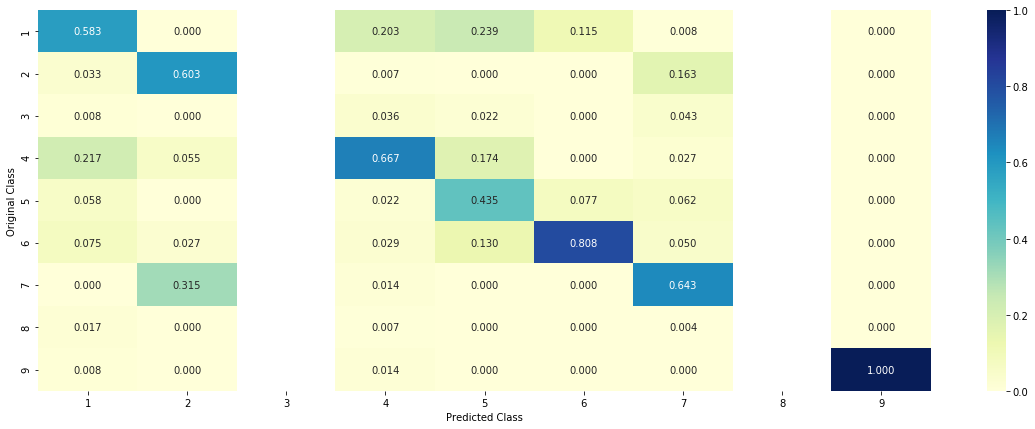

-------------------- Recall matrix (Row sum=1) --------------------


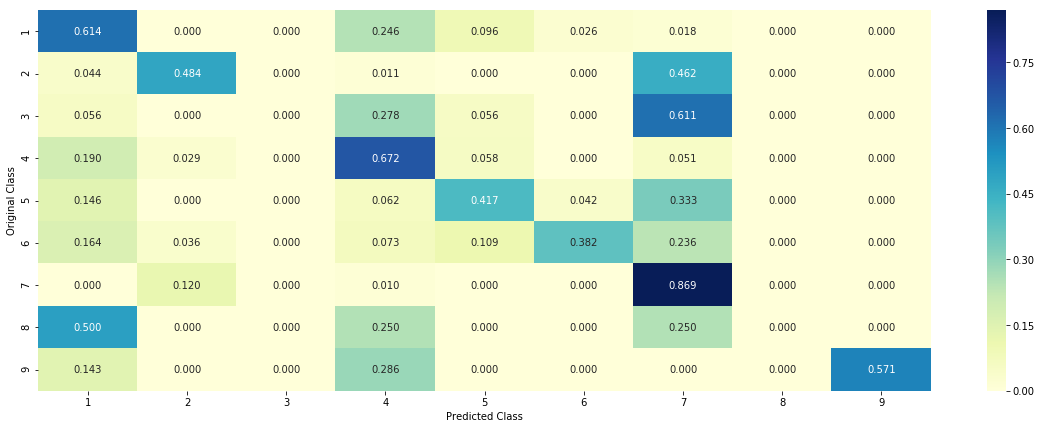

In [198]:
lr = LogisticRegression(C=0.1)
sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
sclf.fit(train_x_onehotCoding, train_y)

log_error = log_loss(train_y, sclf.predict_proba(train_x_onehotCoding))
print("Log loss (train) on the stacking classifier :",log_error)

log_error = log_loss(cv_y, sclf.predict_proba(cv_x_onehotCoding))
print("Log loss (CV) on the stacking classifier :",log_error)

log_error = log_loss(test_y, sclf.predict_proba(test_x_onehotCoding))
print("Log loss (test) on the stacking classifier :",log_error)

print("Number of missclassified point :", np.count_nonzero((sclf.predict(test_x_onehotCoding)- test_y))/test_y.shape[0])
plot_confusion_matrix(test_y=test_y, predict_y=sclf.predict(test_x_onehotCoding))

<h3>4.7.3 Maximum Voting classifier </h3>

Log loss (train) on the VotingClassifier : 0.8249716162161798
Log loss (CV) on the VotingClassifier : 1.2416652412662654
Log loss (test) on the VotingClassifier : 1.2099548289366036
Number of missclassified point : 0.3699248120300752
-------------------- Confusion matrix --------------------


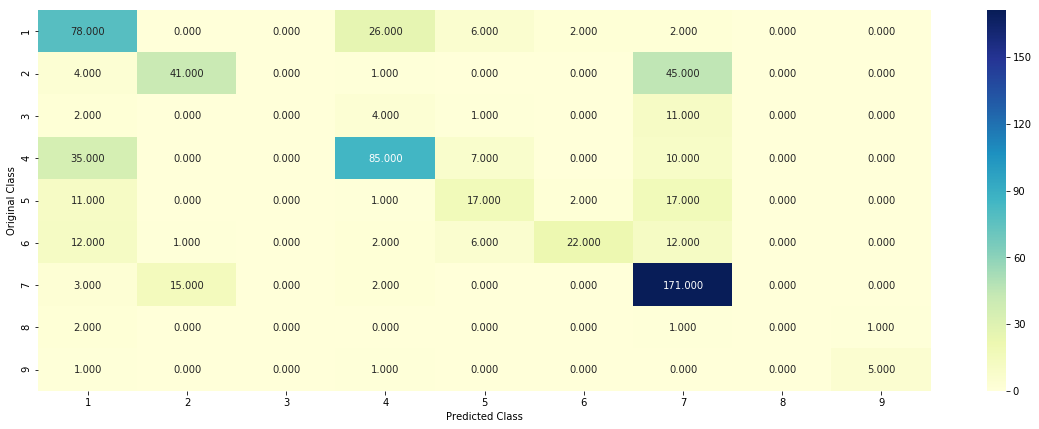

-------------------- Precision matrix (Columm Sum=1) --------------------


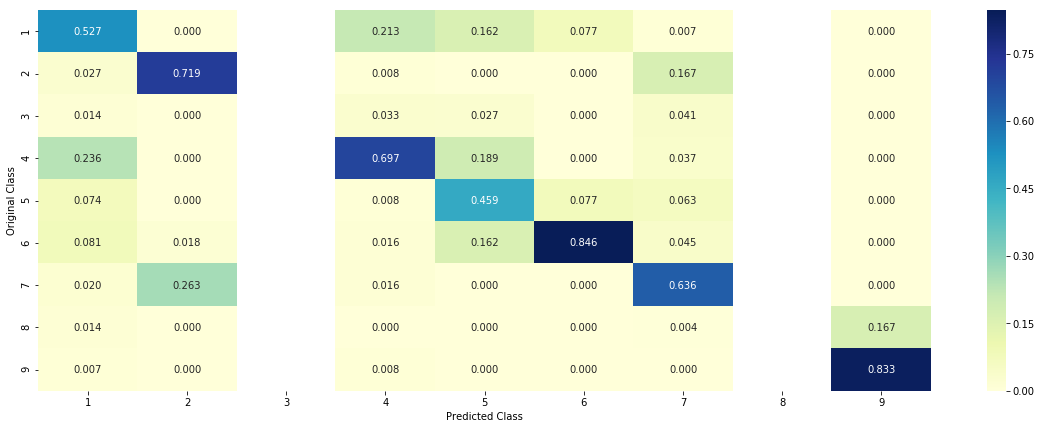

-------------------- Recall matrix (Row sum=1) --------------------


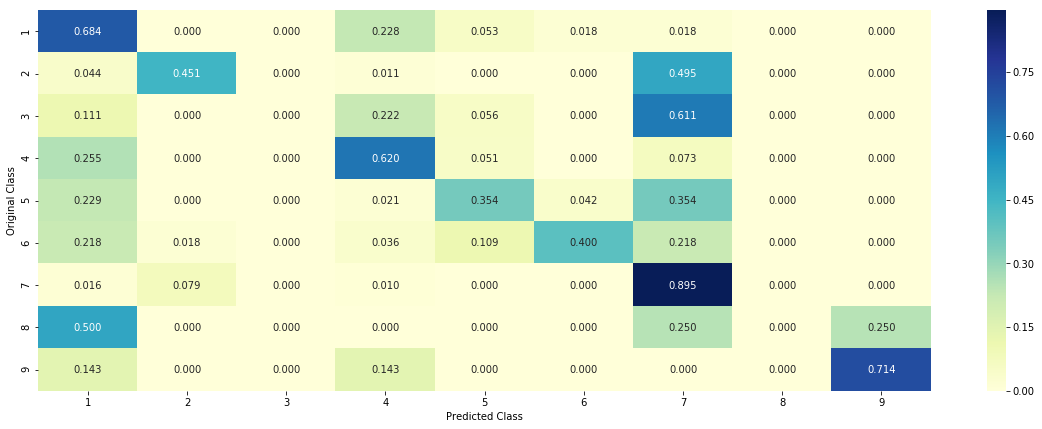

In [199]:
#Refer:http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html
from sklearn.ensemble import VotingClassifier
vclf = VotingClassifier(estimators=[('lr', sig_clf1), ('svc', sig_clf2), ('rf', sig_clf3)], voting='soft')
vclf.fit(train_x_onehotCoding, train_y)
print("Log loss (train) on the VotingClassifier :", log_loss(train_y, vclf.predict_proba(train_x_onehotCoding)))
print("Log loss (CV) on the VotingClassifier :", log_loss(cv_y, vclf.predict_proba(cv_x_onehotCoding)))
print("Log loss (test) on the VotingClassifier :", log_loss(test_y, vclf.predict_proba(test_x_onehotCoding)))
print("Number of missclassified point :", np.count_nonzero((vclf.predict(test_x_onehotCoding)- test_y))/test_y.shape[0])
plot_confusion_matrix(test_y=test_y, predict_y=vclf.predict(test_x_onehotCoding))

In [2]:
from prettytable import PrettyTable

In [3]:
x = PrettyTable(["Model", "Features Used" , "Train-logloss","CV-logloss", "Test-log loss"," MissClassification"])


x.add_row(["Naive Base" ,"One Hot Encoding ", 0.5, 1.24, 1.19, 0.39])
x.add_row(["KNN","Response Coding", 0.70,1.07,1.09,0.37])
x.add_row(["Logistic Regression" ,"One Hot Encoding + Class Balance " , 0.43,1.08, 1.04, 0.38])
x.add_row(["Logistic Regression" ,"One hot Encoding + Without Class Balance", 0.43, 1.11,1.06,0.38])
x.add_row(["SVM"  ,"One Hot Encoding ", 0.37, 1.08, 1.08, 0.37])
x.add_row(["Random Forest" ,"One Hot Encoding " , 0.84, 1.24, 1.22, 0.43])
x.add_row(["Random Forest", "Responce Coding   " , 0.05, 1.40,1.35, 0.53])
x.add_row(["Stack model","One Hot Encoding + Logistic Regression +SVM + Naive Base" , 0.53, 1.22, 1.16, 0.37])
x.add_row(["Maximum Voting" ,"One Hot Encoding + Logistic Regression + SVM + Random Forest " , 0.82, 1.24, 1.20, 0.36])
print(x)

+---------------------+---------------------------------------------------------------+---------------+------------+---------------+---------------------+
|        Model        |                         Features Used                         | Train-logloss | CV-logloss | Test-log loss |  MissClassification |
+---------------------+---------------------------------------------------------------+---------------+------------+---------------+---------------------+
|      Naive Base     |                       One Hot Encoding                        |      0.5      |    1.24    |      1.19     |         0.39        |
|         KNN         |                        Response Coding                        |      0.7      |    1.07    |      1.09     |         0.37        |
| Logistic Regression |               One Hot Encoding + Class Balance                |      0.43     |    1.08    |      1.04     |         0.38        |
| Logistic Regression |            One hot Encoding + Without Class Ba

**Observation:**

After applying all the models with tf-idf features and Instead of using all the words in the dataset, using only the top 1000 words based of tf-idf values, Logistic Regression using One Hot Encoding with class balance has given 1.04 test logloss. Which is the lowest, as compaire to other models.

# Apply Logistic regression with CountVectorizer Features, including unigrams, bigrams , tri_gram, 4_gram

**Gene Feature**

In [0]:
#Uni_gram
# one-hot encoding of Gene feature.
gene_vectorizer = CountVectorizer(ngram_range=(1, 1))
train_gene_feature_onehotCoding = gene_vectorizer.fit_transform(train_df['Gene'])
test_gene_feature_onehotCoding = gene_vectorizer.transform(test_df['Gene'])
cv_gene_feature_onehotCoding= gene_vectorizer.transform(cv_df['Gene'])

In [0]:
#Bi_gram
# one-hot encoding of Gene feature.
gene_vectorizer_bi = CountVectorizer(ngram_range=(1, 2))
train_gene_feature_onehotCoding_bi = gene_vectorizer_bi.fit_transform(train_df['Gene'])
test_gene_feature_onehotCoding_bi = gene_vectorizer_bi.transform(test_df['Gene'])
cv_gene_feature_onehotCoding_bi = gene_vectorizer_bi.transform(cv_df['Gene'])

In [0]:
#tri_gram
# one-hot encoding of Gene feature.
gene_vectorizer_tri = CountVectorizer(ngram_range=(1, 3))
train_gene_feature_onehotCoding_tri = gene_vectorizer_tri.fit_transform(train_df['Gene'])
test_gene_feature_onehotCoding_tri = gene_vectorizer_tri.transform(test_df['Gene'])
cv_gene_feature_onehotCoding_tri = gene_vectorizer_tri.transform(cv_df['Gene'])

In [0]:
#4_gram
# one-hot encoding of Gene feature.
gene_vectorizer_four_gram = CountVectorizer(ngram_range=(1, 4))
train_gene_feature_onehotCoding_four_gram  = gene_vectorizer_four_gram .fit_transform(train_df['Gene'])
test_gene_feature_onehotCoding_four_gram  = gene_vectorizer_four_gram .transform(test_df['Gene'])
cv_gene_feature_onehotCoding_four_gram  = gene_vectorizer_four_gram .transform(cv_df['Gene'])

In [0]:
#4_gram using TfIdf with Top 2000 feature
# one-hot encoding of Gene feature.
gene_vectorizer_four_gram_tfidf = TfidfVectorizer(ngram_range=(1, 4),max_features = 2000)
train_gene_feature_onehotCoding_four_gram_tfidf  = gene_vectorizer_four_gram_tfidf .fit_transform(train_df['Gene'])
test_gene_feature_onehotCoding_four_gram_tfidf  = gene_vectorizer_four_gram_tfidf .transform(test_df['Gene'])
cv_gene_feature_onehotCoding_four_gram_tfidf  = gene_vectorizer_four_gram_tfidf .transform(cv_df['Gene'])

In [0]:
#4_gram using TfIdf with Top 3000 feature
# one-hot encoding of Gene feature.
gene_vectorizer_four_gram_tfidf_3 = TfidfVectorizer(ngram_range=(1, 4),max_features = 3000)
train_gene_feature_onehotCoding_four_gram_tfidf_3  = gene_vectorizer_four_gram_tfidf_3 .fit_transform(train_df['Gene'])
test_gene_feature_onehotCoding_four_gram_tfidf_3  = gene_vectorizer_four_gram_tfidf_3 .transform(test_df['Gene'])
cv_gene_feature_onehotCoding_four_gram_tfidf_3  = gene_vectorizer_four_gram_tfidf_3 .transform(cv_df['Gene'])

In [0]:
#4_gram using TfIdf with Top 4000 feature
# one-hot encoding of Gene feature.
gene_vectorizer_four_gram_tfidf_4 = TfidfVectorizer(ngram_range=(1, 4),max_features = 4000)
train_gene_feature_onehotCoding_four_gram_tfidf_4  = gene_vectorizer_four_gram_tfidf_4 .fit_transform(train_df['Gene'])
test_gene_feature_onehotCoding_four_gram_tfidf_4  = gene_vectorizer_four_gram_tfidf_4 .transform(test_df['Gene'])
cv_gene_feature_onehotCoding_four_gram_tfidf_4  = gene_vectorizer_four_gram_tfidf_4 .transform(cv_df['Gene'])

In [0]:
#4_gram using TfIdf with Top 5000 feature
# one-hot encoding of Gene feature.
gene_vectorizer_four_gram_tfidf_5 = TfidfVectorizer(ngram_range=(1, 4),max_features = 5000)
train_gene_feature_onehotCoding_four_gram_tfidf_5  = gene_vectorizer_four_gram_tfidf_5 .fit_transform(train_df['Gene'])
test_gene_feature_onehotCoding_four_gram_tfidf_5  = gene_vectorizer_four_gram_tfidf_5 .transform(test_df['Gene'])
cv_gene_feature_onehotCoding_four_gram_tfidf_5  = gene_vectorizer_four_gram_tfidf_5 .transform(cv_df['Gene'])

In [0]:
#4_gram using TfIdf with Top 6000 feature
# one-hot encoding of Gene feature.
gene_vectorizer_four_gram_tfidf_6 = TfidfVectorizer(ngram_range=(1, 4),max_features = 6000)
train_gene_feature_onehotCoding_four_gram_tfidf_6  = gene_vectorizer_four_gram_tfidf_6 .fit_transform(train_df['Gene'])
test_gene_feature_onehotCoding_four_gram_tfidf_6  = gene_vectorizer_four_gram_tfidf_6 .transform(test_df['Gene'])
cv_gene_feature_onehotCoding_four_gram_tfidf_6  = gene_vectorizer_four_gram_tfidf_6 .transform(cv_df['Gene'])

**Variation Feature**

In [0]:
#Uni_gram
variation_vectorizer = CountVectorizer(ngram_range=(1, 1))
train_variation_feature_onehotCoding = variation_vectorizer.fit_transform(train_df['Variation'])
test_variation_feature_onehotCoding = variation_vectorizer.transform(test_df['Variation'])
cv_variation_feature_onehotCoding = variation_vectorizer.transform(cv_df['Variation'])

In [0]:
# one-hot encoding of variation feature.
variation_vectorizer_bi = CountVectorizer(ngram_range=(1, 2))
train_variation_feature_onehotCoding_bi = variation_vectorizer_bi.fit_transform(train_df['Variation'])
test_variation_feature_onehotCoding_bi = variation_vectorizer_bi.transform(test_df['Variation'])
cv_variation_feature_onehotCoding_bi = variation_vectorizer_bi.transform(cv_df['Variation'])

In [32]:
print("train_variation_feature_onehotEncoded is converted feature using the onne-hot encoding method. The shape of Variation feature:", train_variation_feature_onehotCoding.shape)

train_variation_feature_onehotEncoded is converted feature using the onne-hot encoding method. The shape of Variation feature: (2124, 2070)


In [0]:
# one-hot encoding of variation feature.
variation_vectorizer_tri = CountVectorizer(ngram_range=(1, 3))
train_variation_feature_onehotCoding_tri = variation_vectorizer_tri.fit_transform(train_df['Variation'])
test_variation_feature_onehotCoding_tri = variation_vectorizer_tri.transform(test_df['Variation'])
cv_variation_feature_onehotCoding_tri = variation_vectorizer_tri.transform(cv_df['Variation'])

In [0]:
# one-hot encoding of variation feature.
variation_vectorizer_four_gram = CountVectorizer(ngram_range=(1, 4))
train_variation_feature_onehotCoding_four_gram = variation_vectorizer_four_gram.fit_transform(train_df['Variation'])
test_variation_feature_onehotCoding_four_gram = variation_vectorizer_four_gram.transform(test_df['Variation'])
cv_variation_feature_onehotCoding_four_gram = variation_vectorizer_four_gram.transform(cv_df['Variation'])

In [0]:
# one-hot encoding of variation feature.
variation_vectorizer_four_gram_tfidf = TfidfVectorizer(ngram_range=(1, 4),max_features = 2000 )
train_variation_feature_onehotCoding_four_gram_tfidf = variation_vectorizer_four_gram_tfidf.fit_transform(train_df['Variation'])
test_variation_feature_onehotCoding_four_gram_tfidf = variation_vectorizer_four_gram_tfidf.transform(test_df['Variation'])
cv_variation_feature_onehotCoding_four_gram_tfidf = variation_vectorizer_four_gram_tfidf.transform(cv_df['Variation'])

In [0]:
# one-hot encoding of variation feature.
variation_vectorizer_four_gram_tfidf_3 = TfidfVectorizer(ngram_range=(1, 4),max_features = 3000 )
train_variation_feature_onehotCoding_four_gram_tfidf_3 = variation_vectorizer_four_gram_tfidf_3.fit_transform(train_df['Variation'])
test_variation_feature_onehotCoding_four_gram_tfidf_3 = variation_vectorizer_four_gram_tfidf_3.transform(test_df['Variation'])
cv_variation_feature_onehotCoding_four_gram_tfidf_3 = variation_vectorizer_four_gram_tfidf_3.transform(cv_df['Variation'])

In [0]:
# one-hot encoding of variation feature.
variation_vectorizer_four_gram_tfidf_4 = TfidfVectorizer(ngram_range=(1, 4),max_features = 4000 )
train_variation_feature_onehotCoding_four_gram_tfidf_4 = variation_vectorizer_four_gram_tfidf_4.fit_transform(train_df['Variation'])
test_variation_feature_onehotCoding_four_gram_tfidf_4 = variation_vectorizer_four_gram_tfidf_4.transform(test_df['Variation'])
cv_variation_feature_onehotCoding_four_gram_tfidf_4 = variation_vectorizer_four_gram_tfidf_4.transform(cv_df['Variation'])

In [0]:
# one-hot encoding of variation feature.
variation_vectorizer_four_gram_tfidf_5 = TfidfVectorizer(ngram_range=(1, 4),max_features = 5000 )
train_variation_feature_onehotCoding_four_gram_tfidf_5 = variation_vectorizer_four_gram_tfidf_5.fit_transform(train_df['Variation'])
test_variation_feature_onehotCoding_four_gram_tfidf_5 = variation_vectorizer_four_gram_tfidf_5.transform(test_df['Variation'])
cv_variation_feature_onehotCoding_four_gram_tfidf_5 = variation_vectorizer_four_gram_tfidf_5.transform(cv_df['Variation'])

In [0]:
# one-hot encoding of variation feature.
variation_vectorizer_four_gram_tfidf_6 = TfidfVectorizer(ngram_range=(1, 4),max_features = 6000 )
train_variation_feature_onehotCoding_four_gram_tfidf_6 = variation_vectorizer_four_gram_tfidf_6.fit_transform(train_df['Variation'])
test_variation_feature_onehotCoding_four_gram_tfidf_6 = variation_vectorizer_four_gram_tfidf_6.transform(test_df['Variation'])
cv_variation_feature_onehotCoding_four_gram_tfidf_6 = variation_vectorizer_four_gram_tfidf_6.transform(cv_df['Variation'])

**Text Feature**

In [100]:
#Uni_gram
# building a TfidfVectorizer with all the words that occured minimum 3 times in train data
text_vectorizer =  CountVectorizer(min_df=3,ngram_range=(1, 1))
train_text_feature_onehotCoding= text_vectorizer.fit_transform(train_df['TEXT'])
# getting all the feature names (words)
train_text_features= text_vectorizer.get_feature_names()

# train_text_feature_onehotCoding.sum(axis=0).A1 will sum every row and returns (1*number of features) vector
train_text_fea_counts = train_text_feature_onehotCoding.sum(axis=0).A1

# zip(list(text_features),text_fea_counts) will zip a word with its number of times it occured
text_fea_dict = dict(zip(list(train_text_features),train_text_fea_counts))


print("Total number of unique words in train data :", len(train_text_features))

Total number of unique words in train data : 53591


In [71]:
#Bi_gram
# building a TfidfVectorizer with all the words that occured minimum 3 times in train data
text_vectorizer_bi =  CountVectorizer(min_df=3,ngram_range=(1, 2))
train_text_feature_onehotCoding_bi = text_vectorizer_bi.fit_transform(train_df['TEXT'])
# getting all the feature names (words)
train_text_features_bi= text_vectorizer_bi.get_feature_names()

# train_text_feature_onehotCoding.sum(axis=0).A1 will sum every row and returns (1*number of features) vector
train_text_fea_counts_bi = train_text_feature_onehotCoding_bi.sum(axis=0).A1

# zip(list(text_features),text_fea_counts) will zip a word with its number of times it occured
text_fea_dict_bi = dict(zip(list(train_text_features_bi),train_text_fea_counts_bi))


print("Total number of unique words in train data :", len(train_text_features_bi))

Total number of unique words in train data : 785358


In [70]:
#tri_gram
# building a TfidfVectorizer with all the words that occured minimum 3 times in train data
text_vectorizer_tri =  CountVectorizer(min_df=3,ngram_range=(1, 3))
train_text_feature_onehotCoding_tri = text_vectorizer_tri.fit_transform(train_df['TEXT'])
# getting all the feature names (words)
train_text_features_tri= text_vectorizer_tri.get_feature_names()

# train_text_feature_onehotCoding.sum(axis=0).A1 will sum every row and returns (1*number of features) vector
train_text_fea_counts_tri = train_text_feature_onehotCoding_tri.sum(axis=0).A1

# zip(list(text_features),text_fea_counts) will zip a word with its number of times it occured
text_fea_dict_tri = dict(zip(list(train_text_features_tri),train_text_fea_counts_tri))


print("Total number of unique words in train data :", len(train_text_features_tri))

Total number of unique words in train data : 1865920


In [72]:
#1,4_gram
# building a TfidfVectorizer with all the words that occured minimum 3 times in train data
text_vectorizer_four_gram =  CountVectorizer(min_df=3,ngram_range=(1, 4))
train_text_feature_onehotCoding_four_gram = text_vectorizer_four_gram.fit_transform(train_df['TEXT'])
# getting all the feature names (words)
train_text_features_four_gram= text_vectorizer_four_gram.get_feature_names()

# train_text_feature_onehotCoding.sum(axis=0).A1 will sum every row and returns (1*number of features) vector
train_text_fea_counts_four_gram = train_text_feature_onehotCoding_four_gram.sum(axis=0).A1

# zip(list(text_features),text_fea_counts) will zip a word with its number of times it occured
text_fea_dict_four_gram = dict(zip(list(train_text_features_four_gram),train_text_fea_counts_four_gram))


print("Total number of unique words in train data :", len(train_text_features_four_gram))

Total number of unique words in train data : 3023950


In [33]:
#1,4_gram TfidfVectorizer with top 2000 feature
# building a TfidfVectorizer with all the words that occured minimum 3 times in train data
text_vectorizer_four_gram_tfidf =  TfidfVectorizer(min_df=3,ngram_range=(1, 4),max_features = 2000 )
train_text_feature_onehotCoding_four_gram_tfidf = text_vectorizer_four_gram_tfidf.fit_transform(train_df['TEXT'])
# getting all the feature names (words)
train_text_features_four_gram_tfidf= text_vectorizer_four_gram_tfidf.get_feature_names()

# train_text_feature_onehotCoding.sum(axis=0).A1 will sum every row and returns (1*number of features) vector
train_text_fea_counts_four_gram_tfidf = train_text_feature_onehotCoding_four_gram_tfidf.sum(axis=0).A1

# zip(list(text_features),text_fea_counts) will zip a word with its number of times it occured
text_fea_dict_four_gram_tfidf = dict(zip(list(train_text_features_four_gram_tfidf),train_text_fea_counts_four_gram_tfidf))


print("Total number of unique words in train data :", len(train_text_features_four_gram_tfidf))

Total number of unique words in train data : 2000


In [51]:
#1,4_gram TfidfVectorizer with top 3000 feature
# building a TfidfVectorizer with all the words that occured minimum 3 times in train data
text_vectorizer_four_gram_tfidf_3 =  TfidfVectorizer(min_df=3,ngram_range=(1, 4),max_features = 3000 )
train_text_feature_onehotCoding_four_gram_tfidf_3 = text_vectorizer_four_gram_tfidf_3.fit_transform(train_df['TEXT'])
# getting all the feature names (words)
train_text_features_four_gram_tfidf_3= text_vectorizer_four_gram_tfidf_3.get_feature_names()

# train_text_feature_onehotCoding.sum(axis=0).A1 will sum every row and returns (1*number of features) vector
train_text_fea_counts_four_gram_tfidf_3 = train_text_feature_onehotCoding_four_gram_tfidf_3.sum(axis=0).A1

# zip(list(text_features),text_fea_counts) will zip a word with its number of times it occured
text_fea_dict_four_gram_tfidf_3 = dict(zip(list(train_text_features_four_gram_tfidf_3),train_text_fea_counts_four_gram_tfidf_3))


print("Total number of unique words in train data :", len(train_text_features_four_gram_tfidf_3))

Total number of unique words in train data : 3000


In [52]:
#1,4_gram TfidfVectorizer with top 4000 feature
# building a TfidfVectorizer with all the words that occured minimum 3 times in train data
text_vectorizer_four_gram_tfidf_4 =  TfidfVectorizer(min_df=3,ngram_range=(1, 4),max_features = 4000 )
train_text_feature_onehotCoding_four_gram_tfidf_4 = text_vectorizer_four_gram_tfidf_4.fit_transform(train_df['TEXT'])
# getting all the feature names (words)
train_text_features_four_gram_tfidf_4= text_vectorizer_four_gram_tfidf_4.get_feature_names()

# train_text_feature_onehotCoding.sum(axis=0).A1 will sum every row and returns (1*number of features) vector
train_text_fea_counts_four_gram_tfidf_4 = train_text_feature_onehotCoding_four_gram_tfidf_4.sum(axis=0).A1

# zip(list(text_features),text_fea_counts) will zip a word with its number of times it occured
text_fea_dict_four_gram_tfidf_4 = dict(zip(list(train_text_features_four_gram_tfidf_4),train_text_fea_counts_four_gram_tfidf_4))


print("Total number of unique words in train data :", len(train_text_features_four_gram_tfidf_4))

Total number of unique words in train data : 4000


In [25]:
#1,4_gram TfidfVectorizer with top 5000 feature
# building a TfidfVectorizer with all the words that occured minimum 3 times in train data
text_vectorizer_four_gram_tfidf_5 =  TfidfVectorizer(min_df=3,ngram_range=(1, 4),max_features = 5000 )
train_text_feature_onehotCoding_four_gram_tfidf_5 = text_vectorizer_four_gram_tfidf_5.fit_transform(train_df['TEXT'])
# getting all the feature names (words)
train_text_features_four_gram_tfidf_5= text_vectorizer_four_gram_tfidf_5.get_feature_names()

# train_text_feature_onehotCoding.sum(axis=0).A1 will sum every row and returns (1*number of features) vector
train_text_fea_counts_four_gram_tfidf_5 = train_text_feature_onehotCoding_four_gram_tfidf_5.sum(axis=0).A1

# zip(list(text_features),text_fea_counts) will zip a word with its number of times it occured
text_fea_dict_four_gram_tfidf_5 = dict(zip(list(train_text_features_four_gram_tfidf_5),train_text_fea_counts_four_gram_tfidf_5))


print("Total number of unique words in train data :", len(train_text_features_four_gram_tfidf_5))

Total number of unique words in train data : 5000


In [26]:
#1,4_gram TfidfVectorizer with top 6000 feature
# building a TfidfVectorizer with all the words that occured minimum 3 times in train data
text_vectorizer_four_gram_tfidf_6 =  TfidfVectorizer(min_df=3,ngram_range=(1, 4),max_features = 6000 )
train_text_feature_onehotCoding_four_gram_tfidf_6 = text_vectorizer_four_gram_tfidf_6.fit_transform(train_df['TEXT'])
# getting all the feature names (words)
train_text_features_four_gram_tfidf_6= text_vectorizer_four_gram_tfidf_6.get_feature_names()

# train_text_feature_onehotCoding.sum(axis=0).A1 will sum every row and returns (1*number of features) vector
train_text_fea_counts_four_gram_tfidf_6 = train_text_feature_onehotCoding_four_gram_tfidf_6.sum(axis=0).A1

# zip(list(text_features),text_fea_counts) will zip a word with its number of times it occured
text_fea_dict_four_gram_tfidf_6 = dict(zip(list(train_text_features_four_gram_tfidf_6),train_text_fea_counts_four_gram_tfidf_6))


print("Total number of unique words in train data :", len(train_text_features_four_gram_tfidf_6))

Total number of unique words in train data : 6000


#### Normalization

In [0]:
#Uni_gram
# don't forget to normalize every feature
train_text_feature_onehotCoding = normalize(train_text_feature_onehotCoding, axis=0)

# we use the same vectorizer that was trained on train data
test_text_feature_onehotCoding = text_vectorizer.transform(test_df['TEXT'])
# don't forget to normalize every feature
test_text_feature_onehotCoding = normalize(test_text_feature_onehotCoding, axis=0)

# we use the same vectorizer that was trained on train data
cv_text_feature_onehotCoding = text_vectorizer.transform(cv_df['TEXT'])
# don't forget to normalize every feature
cv_text_feature_onehotCoding= normalize(cv_text_feature_onehotCoding, axis=0)

In [0]:
#Bi_gram
# don't forget to normalize every feature
train_text_feature_onehotCoding_bi = normalize(train_text_feature_onehotCoding_bi, axis=0)

# we use the same vectorizer that was trained on train data
test_text_feature_onehotCoding_bi = text_vectorizer_bi.transform(test_df['TEXT'])
# don't forget to normalize every feature
test_text_feature_onehotCoding_bi = normalize(test_text_feature_onehotCoding_bi, axis=0)

# we use the same vectorizer that was trained on train data
cv_text_feature_onehotCoding_bi = text_vectorizer_bi.transform(cv_df['TEXT'])
# don't forget to normalize every feature
cv_text_feature_onehotCoding_bi = normalize(cv_text_feature_onehotCoding_bi, axis=0)



#Tri_gram
# don't forget to normalize every feature
train_text_feature_onehotCoding_tri = normalize(train_text_feature_onehotCoding_tri, axis=0)

# we use the same vectorizer that was trained on train data
test_text_feature_onehotCoding_tri = text_vectorizer_tri.transform(test_df['TEXT'])
# don't forget to normalize every feature
test_text_feature_onehotCoding_tri = normalize(test_text_feature_onehotCoding_tri, axis=0)

# we use the same vectorizer that was trained on train data
cv_text_feature_onehotCoding_tri = text_vectorizer_tri.transform(cv_df['TEXT'])
# don't forget to normalize every feature
cv_text_feature_onehotCoding_tri = normalize(cv_text_feature_onehotCoding_tri, axis=0)



#1,4_gram
# don't forget to normalize every feature
train_text_feature_onehotCoding_four_gram = normalize(train_text_feature_onehotCoding_four_gram, axis=0)

# we use the same vectorizer that was trained on train data
test_text_feature_onehotCoding_four_gram = text_vectorizer_four_gram.transform(test_df['TEXT'])
# don't forget to normalize every feature
test_text_feature_onehotCoding_four_gram = normalize(test_text_feature_onehotCoding_four_gram, axis=0)

# we use the same vectorizer that was trained on train data
cv_text_feature_onehotCoding_four_gram = text_vectorizer_four_gram.transform(cv_df['TEXT'])
# don't forget to normalize every feature
cv_text_feature_onehotCoding_four_gram = normalize(cv_text_feature_onehotCoding_four_gram, axis=0)

In [0]:

#1,4_gram
# don't forget to normalize every feature
train_text_feature_onehotCoding_four_gram_tfidf = normalize(train_text_feature_onehotCoding_four_gram_tfidf, axis=0)

# we use the same vectorizer that was trained on train data
test_text_feature_onehotCoding_four_gram_tfidf = text_vectorizer_four_gram_tfidf.transform(test_df['TEXT'])
# don't forget to normalize every feature
test_text_feature_onehotCoding_four_gram_tfidf = normalize(test_text_feature_onehotCoding_four_gram_tfidf, axis=0)

# we use the same vectorizer that was trained on train data
cv_text_feature_onehotCoding_four_gram_tfidf = text_vectorizer_four_gram_tfidf.transform(cv_df['TEXT'])
# don't forget to normalize every feature
cv_text_feature_onehotCoding_four_gram_tfidf = normalize(cv_text_feature_onehotCoding_four_gram_tfidf, axis=0)

In [0]:

#1,4_gram Tfidf top 3000
# don't forget to normalize every feature
train_text_feature_onehotCoding_four_gram_tfidf_3 = normalize(train_text_feature_onehotCoding_four_gram_tfidf_3, axis=0)

# we use the same vectorizer that was trained on train data
test_text_feature_onehotCoding_four_gram_tfidf_3 = text_vectorizer_four_gram_tfidf_3.transform(test_df['TEXT'])
# don't forget to normalize every feature
test_text_feature_onehotCoding_four_gram_tfidf_3 = normalize(test_text_feature_onehotCoding_four_gram_tfidf_3, axis=0)

# we use the same vectorizer that was trained on train data
cv_text_feature_onehotCoding_four_gram_tfidf_3 = text_vectorizer_four_gram_tfidf_3.transform(cv_df['TEXT'])
# don't forget to normalize every feature
cv_text_feature_onehotCoding_four_gram_tfidf_3 = normalize(cv_text_feature_onehotCoding_four_gram_tfidf_3, axis=0)

In [0]:

#1,4_gram Tfidf top 4000
# don't forget to normalize every feature
train_text_feature_onehotCoding_four_gram_tfidf_4 = normalize(train_text_feature_onehotCoding_four_gram_tfidf_4, axis=0)

# we use the same vectorizer that was trained on train data
test_text_feature_onehotCoding_four_gram_tfidf_4 = text_vectorizer_four_gram_tfidf_4.transform(test_df['TEXT'])
# don't forget to normalize every feature
test_text_feature_onehotCoding_four_gram_tfidf_4 = normalize(test_text_feature_onehotCoding_four_gram_tfidf_4, axis=0)

# we use the same vectorizer that was trained on train data
cv_text_feature_onehotCoding_four_gram_tfidf_4 = text_vectorizer_four_gram_tfidf_4.transform(cv_df['TEXT'])
# don't forget to normalize every feature
cv_text_feature_onehotCoding_four_gram_tfidf_4 = normalize(cv_text_feature_onehotCoding_four_gram_tfidf_4, axis=0)

In [0]:

#1,4_gram Tfidf top 5000
# don't forget to normalize every feature
train_text_feature_onehotCoding_four_gram_tfidf_5 = normalize(train_text_feature_onehotCoding_four_gram_tfidf_5, axis=0)

# we use the same vectorizer that was trained on train data
test_text_feature_onehotCoding_four_gram_tfidf_5 = text_vectorizer_four_gram_tfidf_5.transform(test_df['TEXT'])
# don't forget to normalize every feature
test_text_feature_onehotCoding_four_gram_tfidf_5 = normalize(test_text_feature_onehotCoding_four_gram_tfidf_5, axis=0)

# we use the same vectorizer that was trained on train data
cv_text_feature_onehotCoding_four_gram_tfidf_5 = text_vectorizer_four_gram_tfidf_5.transform(cv_df['TEXT'])
# don't forget to normalize every feature
cv_text_feature_onehotCoding_four_gram_tfidf_5 = normalize(cv_text_feature_onehotCoding_four_gram_tfidf_5, axis=0)

In [0]:

#1,4_gram Tfidf top 6000
# don't forget to normalize every feature
train_text_feature_onehotCoding_four_gram_tfidf_6 = normalize(train_text_feature_onehotCoding_four_gram_tfidf_6, axis=0)

# we use the same vectorizer that was trained on train data
test_text_feature_onehotCoding_four_gram_tfidf_6 = text_vectorizer_four_gram_tfidf_6.transform(test_df['TEXT'])
# don't forget to normalize every feature
test_text_feature_onehotCoding_four_gram_tfidf_6 = normalize(test_text_feature_onehotCoding_four_gram_tfidf_6, axis=0)

# we use the same vectorizer that was trained on train data
cv_text_feature_onehotCoding_four_gram_tfidf_6 = text_vectorizer_four_gram_tfidf_6.transform(cv_df['TEXT'])
# don't forget to normalize every feature
cv_text_feature_onehotCoding_four_gram_tfidf_6 = normalize(cv_text_feature_onehotCoding_four_gram_tfidf_6, axis=0)

**Stacking the features**

In [0]:
train_gene_var_onehotCoding = hstack((train_gene_feature_onehotCoding,train_variation_feature_onehotCoding))
test_gene_var_onehotCoding = hstack((test_gene_feature_onehotCoding,test_variation_feature_onehotCoding))
cv_gene_var_onehotCoding = hstack((cv_gene_feature_onehotCoding,cv_variation_feature_onehotCoding))

train_x_onehotCoding = hstack((train_gene_var_onehotCoding, train_text_feature_onehotCoding)).tocsr()
train_y = np.array(list(train_df['Class']))

test_x_onehotCoding = hstack((test_gene_var_onehotCoding, test_text_feature_onehotCoding)).tocsr()
test_y = np.array(list(test_df['Class']))

cv_x_onehotCoding= hstack((cv_gene_var_onehotCoding, cv_text_feature_onehotCoding)).tocsr()
cv_y = np.array(list(cv_df['Class']))

In [0]:
# merging gene, variance and text features

# building train, test and cross validation data sets
# a = [[1, 2], 
#      [3, 4]]
# b = [[4, 5], 
#      [6, 7]]
# hstack(a, b) = [[1, 2, 4, 5],
#                [ 3, 4, 6, 7]]

train_gene_var_onehotCoding_bi = hstack((train_gene_feature_onehotCoding_bi,train_variation_feature_onehotCoding_bi))
test_gene_var_onehotCoding_bi = hstack((test_gene_feature_onehotCoding_bi,test_variation_feature_onehotCoding_bi))
cv_gene_var_onehotCoding_bi = hstack((cv_gene_feature_onehotCoding_bi,cv_variation_feature_onehotCoding_bi))

train_x_onehotCoding_bi = hstack((train_gene_var_onehotCoding_bi, train_text_feature_onehotCoding_bi)).tocsr()
train_y = np.array(list(train_df['Class']))

test_x_onehotCoding_bi = hstack((test_gene_var_onehotCoding_bi, test_text_feature_onehotCoding_bi)).tocsr()
test_y = np.array(list(test_df['Class']))

cv_x_onehotCoding_bi = hstack((cv_gene_var_onehotCoding_bi, cv_text_feature_onehotCoding_bi)).tocsr()
cv_y = np.array(list(cv_df['Class']))


#Tri_gram
train_gene_var_onehotCoding_tri = hstack((train_gene_feature_onehotCoding_tri,train_variation_feature_onehotCoding_tri))
test_gene_var_onehotCoding_tri = hstack((test_gene_feature_onehotCoding_tri,test_variation_feature_onehotCoding_tri))
cv_gene_var_onehotCoding_tri = hstack((cv_gene_feature_onehotCoding_tri,cv_variation_feature_onehotCoding_tri))

train_x_onehotCoding_tri = hstack((train_gene_var_onehotCoding_tri, train_text_feature_onehotCoding_tri)).tocsr()
train_y = np.array(list(train_df['Class']))

test_x_onehotCoding_tri = hstack((test_gene_var_onehotCoding_tri, test_text_feature_onehotCoding_tri)).tocsr()
test_y = np.array(list(test_df['Class']))

cv_x_onehotCoding_tri = hstack((cv_gene_var_onehotCoding_tri, cv_text_feature_onehotCoding_tri)).tocsr()
cv_y = np.array(list(cv_df['Class']))


#1,4_gram
train_gene_var_onehotCoding_four_gram = hstack((train_gene_feature_onehotCoding_four_gram,train_variation_feature_onehotCoding_four_gram))
test_gene_var_onehotCoding_four_gram = hstack((test_gene_feature_onehotCoding_four_gram,test_variation_feature_onehotCoding_four_gram))
cv_gene_var_onehotCoding_four_gram = hstack((cv_gene_feature_onehotCoding_four_gram,cv_variation_feature_onehotCoding_four_gram))

train_x_onehotCoding_four_gram = hstack((train_gene_var_onehotCoding_four_gram, train_text_feature_onehotCoding_four_gram)).tocsr()
train_y = np.array(list(train_df['Class']))

test_x_onehotCoding_four_gram = hstack((test_gene_var_onehotCoding_four_gram, test_text_feature_onehotCoding_four_gram)).tocsr()
test_y = np.array(list(test_df['Class']))

cv_x_onehotCoding_four_gram = hstack((cv_gene_var_onehotCoding_four_gram, cv_text_feature_onehotCoding_four_gram)).tocsr()
cv_y = np.array(list(cv_df['Class']))



In [0]:
#1,4_gram
train_gene_var_onehotCoding_four_gram_tfidf = hstack((train_gene_feature_onehotCoding_four_gram_tfidf,train_variation_feature_onehotCoding_four_gram_tfidf))
test_gene_var_onehotCoding_four_gram_tfidf = hstack((test_gene_feature_onehotCoding_four_gram_tfidf,test_variation_feature_onehotCoding_four_gram_tfidf))
cv_gene_var_onehotCoding_four_gram_tfidf = hstack((cv_gene_feature_onehotCoding_four_gram_tfidf,cv_variation_feature_onehotCoding_four_gram_tfidf))

train_x_onehotCoding_four_gram_tfidf = hstack((train_gene_var_onehotCoding_four_gram_tfidf, train_text_feature_onehotCoding_four_gram_tfidf)).tocsr()
train_y = np.array(list(train_df['Class']))

test_x_onehotCoding_four_gram_tfidf = hstack((test_gene_var_onehotCoding_four_gram_tfidf, test_text_feature_onehotCoding_four_gram_tfidf)).tocsr()
test_y = np.array(list(test_df['Class']))

cv_x_onehotCoding_four_gram_tfidf = hstack((cv_gene_var_onehotCoding_four_gram_tfidf, cv_text_feature_onehotCoding_four_gram_tfidf)).tocsr()
cv_y = np.array(list(cv_df['Class']))


In [0]:
#1,4_gram
train_gene_var_onehotCoding_four_gram_tfidf_3 = hstack((train_gene_feature_onehotCoding_four_gram_tfidf_3,train_variation_feature_onehotCoding_four_gram_tfidf_3))
test_gene_var_onehotCoding_four_gram_tfidf_3 = hstack((test_gene_feature_onehotCoding_four_gram_tfidf_3,test_variation_feature_onehotCoding_four_gram_tfidf_3))
cv_gene_var_onehotCoding_four_gram_tfidf_3 = hstack((cv_gene_feature_onehotCoding_four_gram_tfidf_3,cv_variation_feature_onehotCoding_four_gram_tfidf_3))

train_x_onehotCoding_four_gram_tfidf_3 = hstack((train_gene_var_onehotCoding_four_gram_tfidf_3, train_text_feature_onehotCoding_four_gram_tfidf_3)).tocsr()
train_y = np.array(list(train_df['Class']))

test_x_onehotCoding_four_gram_tfidf_3 = hstack((test_gene_var_onehotCoding_four_gram_tfidf_3, test_text_feature_onehotCoding_four_gram_tfidf_3)).tocsr()
test_y = np.array(list(test_df['Class']))

cv_x_onehotCoding_four_gram_tfidf_3 = hstack((cv_gene_var_onehotCoding_four_gram_tfidf_3, cv_text_feature_onehotCoding_four_gram_tfidf_3)).tocsr()
cv_y = np.array(list(cv_df['Class']))




#1,4_gram
train_gene_var_onehotCoding_four_gram_tfidf_4 = hstack((train_gene_feature_onehotCoding_four_gram_tfidf_4,train_variation_feature_onehotCoding_four_gram_tfidf_4))
test_gene_var_onehotCoding_four_gram_tfidf_4 = hstack((test_gene_feature_onehotCoding_four_gram_tfidf_4,test_variation_feature_onehotCoding_four_gram_tfidf_4))
cv_gene_var_onehotCoding_four_gram_tfidf_4 = hstack((cv_gene_feature_onehotCoding_four_gram_tfidf_4,cv_variation_feature_onehotCoding_four_gram_tfidf_4))

train_x_onehotCoding_four_gram_tfidf_4 = hstack((train_gene_var_onehotCoding_four_gram_tfidf_4, train_text_feature_onehotCoding_four_gram_tfidf_4)).tocsr()
train_y = np.array(list(train_df['Class']))

test_x_onehotCoding_four_gram_tfidf_4 = hstack((test_gene_var_onehotCoding_four_gram_tfidf_4, test_text_feature_onehotCoding_four_gram_tfidf_4)).tocsr()
test_y = np.array(list(test_df['Class']))

cv_x_onehotCoding_four_gram_tfidf_4 = hstack((cv_gene_var_onehotCoding_four_gram_tfidf_4, cv_text_feature_onehotCoding_four_gram_tfidf_4)).tocsr()
cv_y = np.array(list(cv_df['Class']))



In [0]:
#1,4_gram
train_gene_var_onehotCoding_four_gram_tfidf_5 = hstack((train_gene_feature_onehotCoding_four_gram_tfidf_5,train_variation_feature_onehotCoding_four_gram_tfidf_5))
test_gene_var_onehotCoding_four_gram_tfidf_5 = hstack((test_gene_feature_onehotCoding_four_gram_tfidf_5,test_variation_feature_onehotCoding_four_gram_tfidf_5))
cv_gene_var_onehotCoding_four_gram_tfidf_5 = hstack((cv_gene_feature_onehotCoding_four_gram_tfidf_5,cv_variation_feature_onehotCoding_four_gram_tfidf_5))

train_x_onehotCoding_four_gram_tfidf_5 = hstack((train_gene_var_onehotCoding_four_gram_tfidf_5, train_text_feature_onehotCoding_four_gram_tfidf_5)).tocsr()
train_y = np.array(list(train_df['Class']))

test_x_onehotCoding_four_gram_tfidf_5 = hstack((test_gene_var_onehotCoding_four_gram_tfidf_5, test_text_feature_onehotCoding_four_gram_tfidf_5)).tocsr()
test_y = np.array(list(test_df['Class']))

cv_x_onehotCoding_four_gram_tfidf_5 = hstack((cv_gene_var_onehotCoding_four_gram_tfidf_5, cv_text_feature_onehotCoding_four_gram_tfidf_5)).tocsr()
cv_y = np.array(list(cv_df['Class']))




#1,4_gram
train_gene_var_onehotCoding_four_gram_tfidf_6 = hstack((train_gene_feature_onehotCoding_four_gram_tfidf_6,train_variation_feature_onehotCoding_four_gram_tfidf_6))
test_gene_var_onehotCoding_four_gram_tfidf_6 = hstack((test_gene_feature_onehotCoding_four_gram_tfidf_6,test_variation_feature_onehotCoding_four_gram_tfidf_6))
cv_gene_var_onehotCoding_four_gram_tfidf_6 = hstack((cv_gene_feature_onehotCoding_four_gram_tfidf_6,cv_variation_feature_onehotCoding_four_gram_tfidf_6))

train_x_onehotCoding_four_gram_tfidf_6 = hstack((train_gene_var_onehotCoding_four_gram_tfidf_6, train_text_feature_onehotCoding_four_gram_tfidf_6)).tocsr()
train_y = np.array(list(train_df['Class']))

test_x_onehotCoding_four_gram_tfidf_6 = hstack((test_gene_var_onehotCoding_four_gram_tfidf_6, test_text_feature_onehotCoding_four_gram_tfidf_6)).tocsr()
test_y = np.array(list(test_df['Class']))

cv_x_onehotCoding_four_gram_tfidf_6 = hstack((cv_gene_var_onehotCoding_four_gram_tfidf_6, cv_text_feature_onehotCoding_four_gram_tfidf_6)).tocsr()
cv_y = np.array(list(cv_df['Class']))



In [103]:
print("One hot encoding Uni_gram features :")
print("(number of data points * number of features) in train data = ", train_x_onehotCoding.shape)
print("(number of data points * number of features) in test data = ", test_x_onehotCoding.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_onehotCoding.shape)

One hot encoding Uni_gram features :
(number of data points * number of features) in train data =  (2124, 55791)
(number of data points * number of features) in test data =  (665, 55791)
(number of data points * number of features) in cross validation data = (532, 55791)


In [77]:
print("One hot encoding Bi_gram features :")
print("(number of data points * number of features) in train data = ", train_x_onehotCoding_bi.shape)
print("(number of data points * number of features) in test data = ", test_x_onehotCoding_bi.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_onehotCoding_bi.shape)

One hot encoding Bi_gram features :
(number of data points * number of features) in train data =  (2124, 787657)
(number of data points * number of features) in test data =  (665, 787657)
(number of data points * number of features) in cross validation data = (532, 787657)


In [78]:
print("One hot encoding Tri_gram features :")
print("(number of data points * number of features) in train data = ", train_x_onehotCoding_tri.shape)
print("(number of data points * number of features) in test data = ", test_x_onehotCoding_tri.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_onehotCoding_tri.shape)

One hot encoding Tri_gram features :
(number of data points * number of features) in train data =  (2124, 1868221)
(number of data points * number of features) in test data =  (665, 1868221)
(number of data points * number of features) in cross validation data = (532, 1868221)


In [79]:
print("One hot encoding 4_gram features :")
print("(number of data points * number of features) in train data = ", train_x_onehotCoding_four_gram.shape)
print("(number of data points * number of features) in test data = ", test_x_onehotCoding_four_gram.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_onehotCoding_four_gram.shape)

One hot encoding 4_gram features :
(number of data points * number of features) in train data =  (2124, 3026251)
(number of data points * number of features) in test data =  (665, 3026251)
(number of data points * number of features) in cross validation data = (532, 3026251)


In [36]:
print("One hot encoding 4_gram with Tf_idf features :")
print("(number of data points * number of features) in train data = ", train_x_onehotCoding_four_gram_tfidf.shape)
print("(number of data points * number of features) in test data = ", test_x_onehotCoding_four_gram_tfidf.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_onehotCoding_four_gram_tfidf.shape)

One hot encoding 4_gram with Tf_idf features :
(number of data points * number of features) in train data =  (2124, 4235)
(number of data points * number of features) in test data =  (665, 4235)
(number of data points * number of features) in cross validation data = (532, 4235)


In [57]:
print("One hot encoding 4_gram with Tf_idf top 3000 features :")
print("(number of data points * number of features) in train data = ", train_x_onehotCoding_four_gram_tfidf_3.shape)
print("(number of data points * number of features) in test data = ", test_x_onehotCoding_four_gram_tfidf_3.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_onehotCoding_four_gram_tfidf_3.shape)

One hot encoding 4_gram with Tf_idf top 3000 features :
(number of data points * number of features) in train data =  (2124, 5302)
(number of data points * number of features) in test data =  (665, 5302)
(number of data points * number of features) in cross validation data = (532, 5302)


In [59]:
print("One hot encoding 4_gram with Tf_idf features top 4000  :")
print("(number of data points * number of features) in train data = ", train_x_onehotCoding_four_gram_tfidf_4.shape)
print("(number of data points * number of features) in test data = ", test_x_onehotCoding_four_gram_tfidf_4.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_onehotCoding_four_gram_tfidf_4.shape)

One hot encoding 4_gram with Tf_idf features top 4000  :
(number of data points * number of features) in train data =  (2124, 6302)
(number of data points * number of features) in test data =  (665, 6302)
(number of data points * number of features) in cross validation data = (532, 6302)


In [30]:
print("One hot encoding 4_gram with Tf_idf features top 5000  :")
print("(number of data points * number of features) in train data = ", train_x_onehotCoding_four_gram_tfidf_5.shape)
print("(number of data points * number of features) in test data = ", test_x_onehotCoding_four_gram_tfidf_5.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_onehotCoding_four_gram_tfidf_5.shape)

One hot encoding 4_gram with Tf_idf features top 5000  :
(number of data points * number of features) in train data =  (2124, 7291)
(number of data points * number of features) in test data =  (665, 7291)
(number of data points * number of features) in cross validation data = (532, 7291)


In [31]:
print("One hot encoding 4_gram with Tf_idf features top 6000  :")
print("(number of data points * number of features) in train data = ", train_x_onehotCoding_four_gram_tfidf_6.shape)
print("(number of data points * number of features) in test data = ", test_x_onehotCoding_four_gram_tfidf_6.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_onehotCoding_four_gram_tfidf_6.shape)

One hot encoding 4_gram with Tf_idf features top 6000  :
(number of data points * number of features) in train data =  (2124, 8291)
(number of data points * number of features) in test data =  (665, 8291)
(number of data points * number of features) in cross validation data = (532, 8291)


<h2>4.3. Logistic Regression</h2>

**Unigram**

for alpha = 1e-06
Log Loss : 1.3501624198083835
for alpha = 1e-05
Log Loss : 1.3217459919390904
for alpha = 0.0001
Log Loss : 1.114633807205407
for alpha = 0.001
Log Loss : 1.0632486330160629
for alpha = 0.01
Log Loss : 1.135146963896577
for alpha = 0.1
Log Loss : 1.4583848777637716
for alpha = 1
Log Loss : 1.6742143678007626
for alpha = 10
Log Loss : 1.7040160120310697
for alpha = 100
Log Loss : 1.7071843354284584


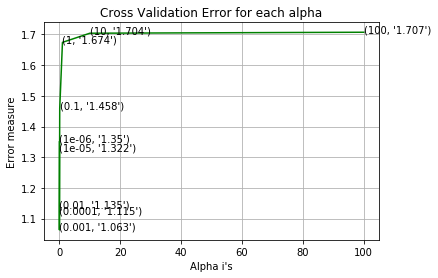

For values of best alpha =  0.001 The train log loss is: 0.5907081920666506
For values of best alpha =  0.001 The cross validation log loss is: 1.0632486330160629
For values of best alpha =  0.001 The test log loss is: 1.1066261980477863


In [104]:

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

Log loss : 1.0632486330160629
Number of mis-classified points : 0.33270676691729323
-------------------- Confusion matrix --------------------


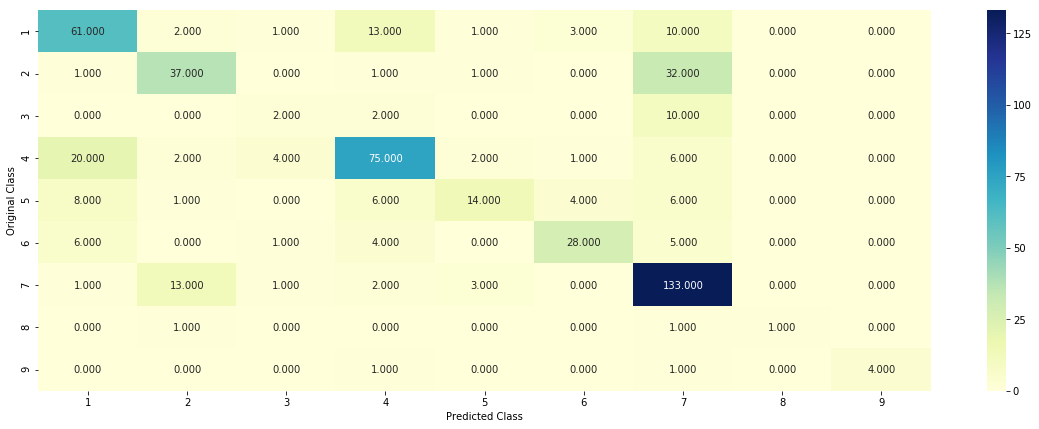

-------------------- Precision matrix (Columm Sum=1) --------------------


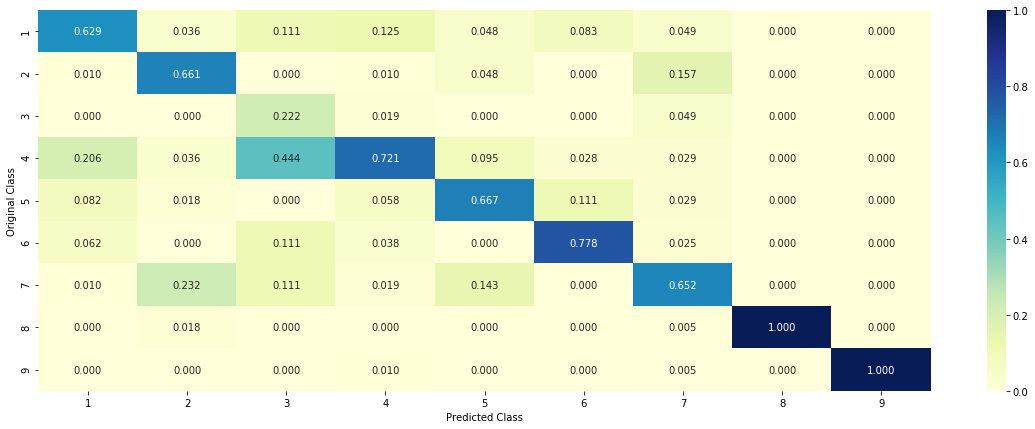

-------------------- Recall matrix (Row sum=1) --------------------


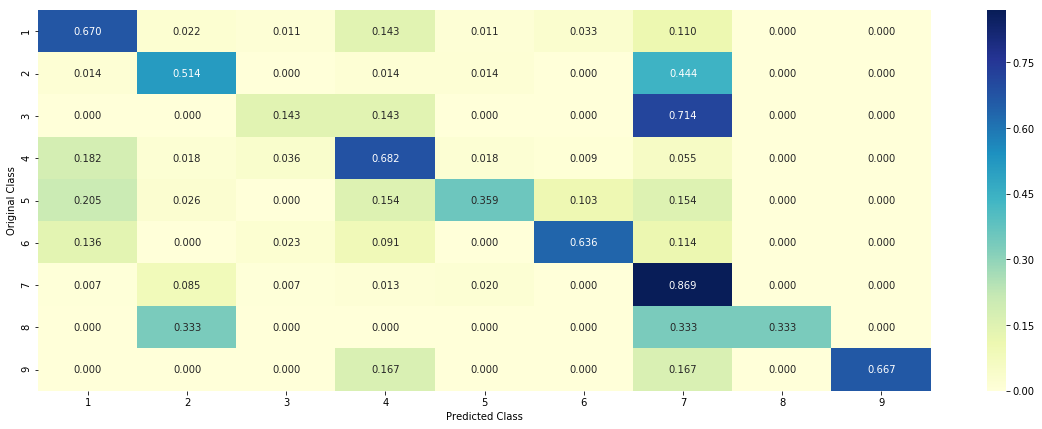

In [105]:
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y, cv_x_onehotCoding, cv_y, clf)

**Bi_gram**

for alpha = 1e-06
Log Loss : 1.5703413892978122
for alpha = 1e-05
Log Loss : 1.555840267476167
for alpha = 0.0001
Log Loss : 1.4682348455812921
for alpha = 0.001
Log Loss : 1.1560681982017196
for alpha = 0.01
Log Loss : 1.1389381901223345
for alpha = 0.1
Log Loss : 1.197690833067405
for alpha = 1
Log Loss : 1.2899518582812501
for alpha = 10
Log Loss : 1.3753388848240686
for alpha = 100
Log Loss : 1.3940754131446862


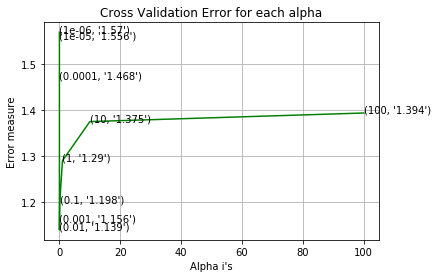

For values of best alpha =  0.01 The train log loss is: 0.7371648269048519
For values of best alpha =  0.01 The cross validation log loss is: 1.1389381901223345
For values of best alpha =  0.01 The test log loss is: 1.175381058333842


In [80]:

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding_bi, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding_bi, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding_bi)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding_bi, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding_bi, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding_bi)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding_bi)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding_bi)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

Log loss : 1.1389381901223345
Number of mis-classified points : 0.37969924812030076
-------------------- Confusion matrix --------------------


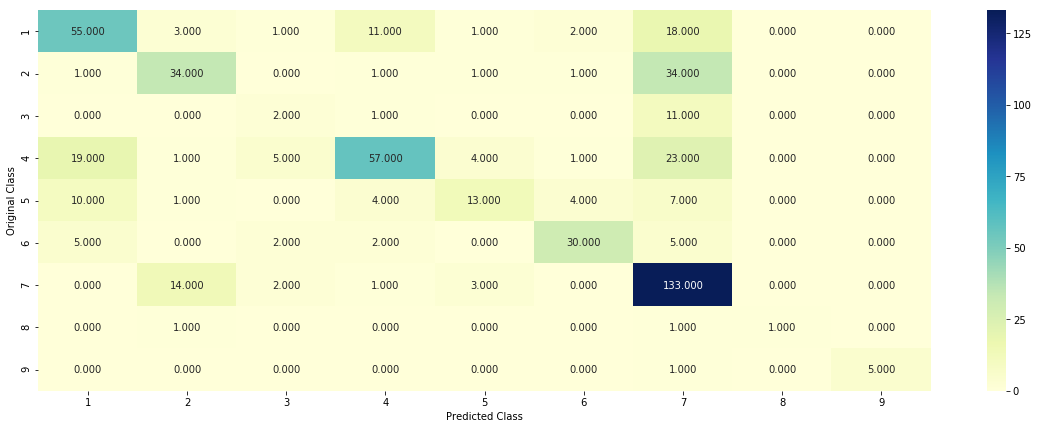

-------------------- Precision matrix (Columm Sum=1) --------------------


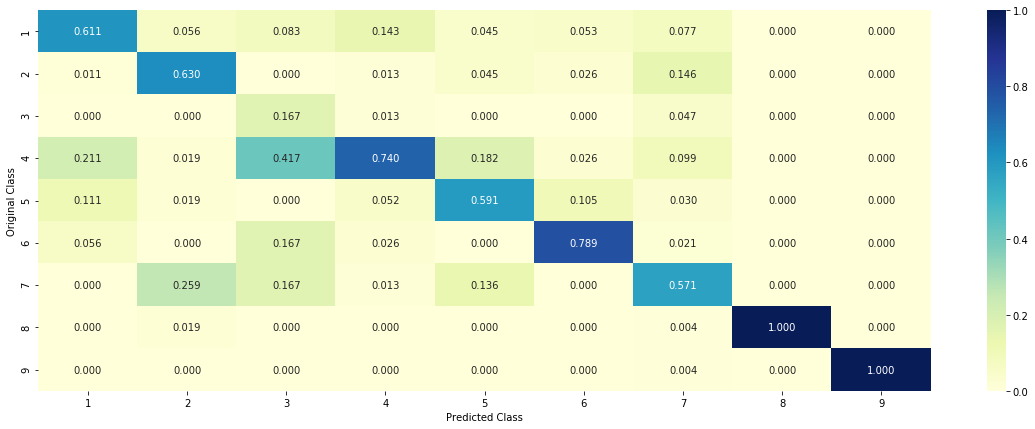

-------------------- Recall matrix (Row sum=1) --------------------


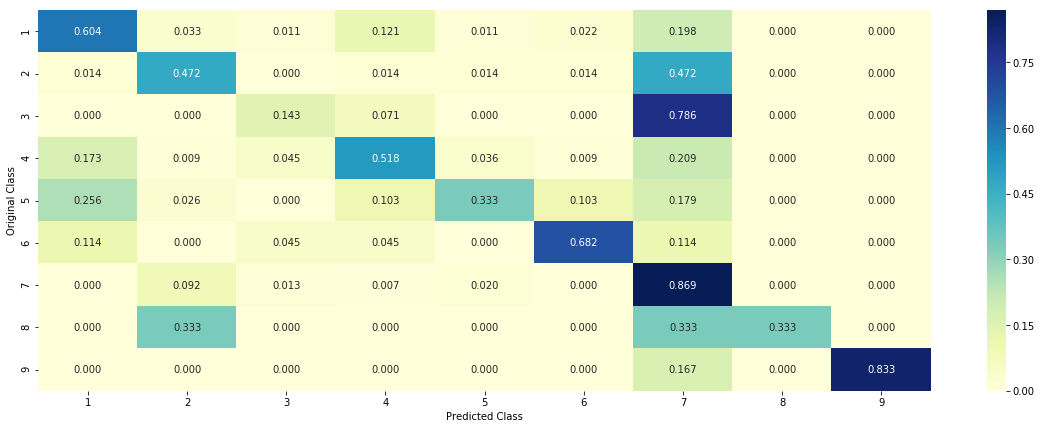

In [86]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding_bi, train_y, cv_x_onehotCoding_bi, cv_y, clf)

for alpha = 1e-06
Log Loss : 1.7202535302120197
for alpha = 1e-05
Log Loss : 1.630039853412098
for alpha = 0.0001
Log Loss : 1.6078412620028815
for alpha = 0.001
Log Loss : 1.3401532663683224
for alpha = 0.01
Log Loss : 1.150986133466682
for alpha = 0.1
Log Loss : 1.204233099253793
for alpha = 1
Log Loss : 1.2857534331654406
for alpha = 10
Log Loss : 1.337512029897569
for alpha = 100
Log Loss : 1.357968308954176


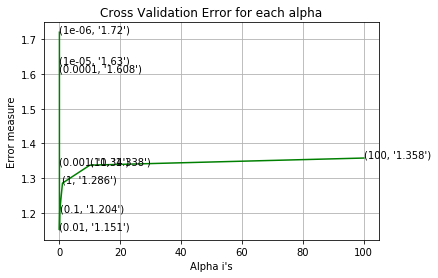

For values of best alpha =  0.01 The train log loss is: 0.782378449725601
For values of best alpha =  0.01 The cross validation log loss is: 1.150986133466682
For values of best alpha =  0.01 The test log loss is: 1.1842456472923937


In [87]:
#Tri_gram

alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding_tri, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding_tri, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding_tri)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding_tri, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding_tri, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding_tri)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding_tri)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding_tri)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

Log loss : 1.150986133466682
Number of mis-classified points : 0.39473684210526316
-------------------- Confusion matrix --------------------


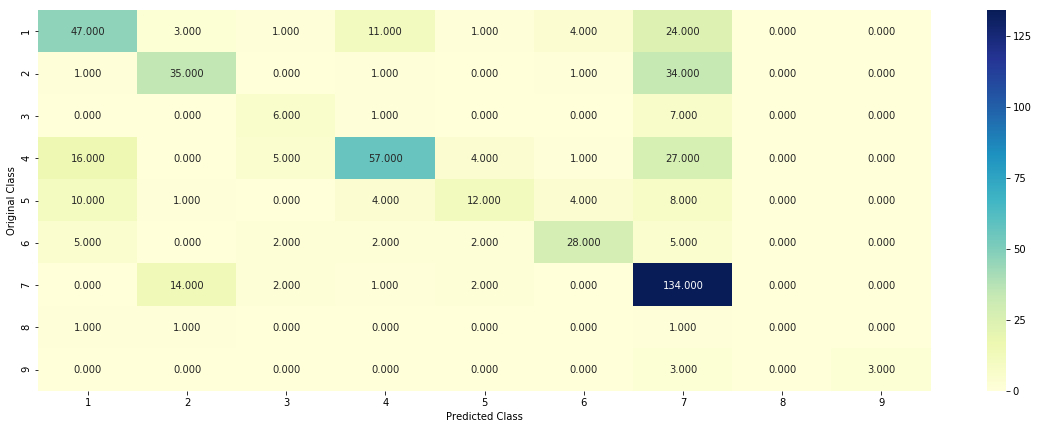

-------------------- Precision matrix (Columm Sum=1) --------------------


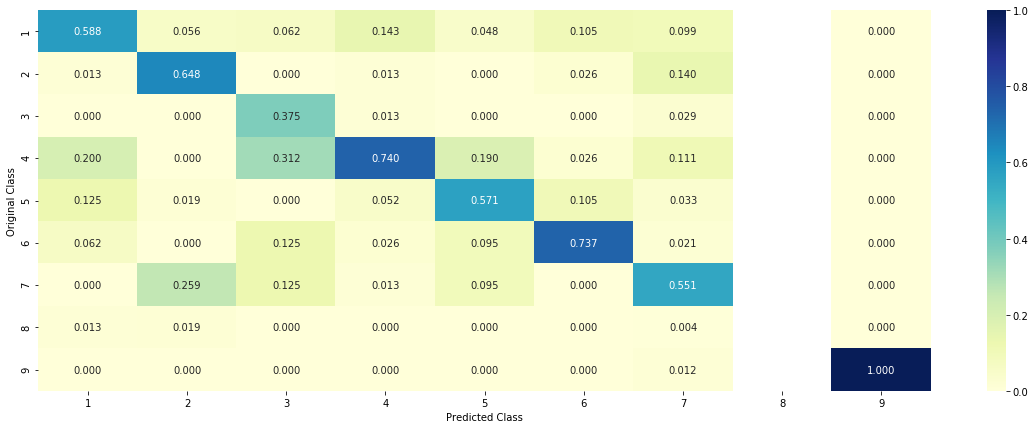

-------------------- Recall matrix (Row sum=1) --------------------


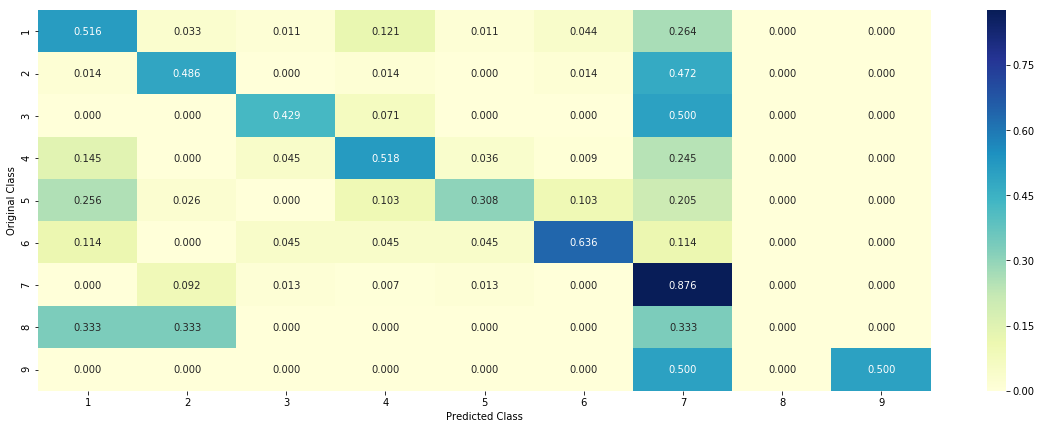

In [88]:
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding_tri, train_y, cv_x_onehotCoding_tri, cv_y, clf)

for alpha = 1e-06
Log Loss : 1.8003508919642435
for alpha = 1e-05
Log Loss : 1.6307297042446869
for alpha = 0.0001
Log Loss : 1.5981574287687956
for alpha = 0.001
Log Loss : 1.4365568804166526
for alpha = 0.01
Log Loss : 1.170065139361322
for alpha = 0.1
Log Loss : 1.2134207427724701
for alpha = 1
Log Loss : 1.2959327348701388
for alpha = 10
Log Loss : 1.3432827033873367
for alpha = 100
Log Loss : 1.3639747803529176


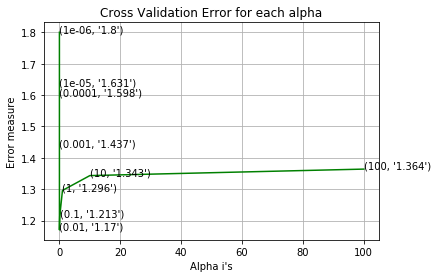

For values of best alpha =  0.01 The train log loss is: 0.8433561642615526
For values of best alpha =  0.01 The cross validation log loss is: 1.170065139361322
For values of best alpha =  0.01 The test log loss is: 1.2014289786103225


In [106]:
#4_gram

alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding_four_gram, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding_four_gram, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding_four_gram)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding_four_gram, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding_four_gram, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding_four_gram)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding_four_gram)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding_four_gram)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

Log loss : 1.170065139361322
Number of mis-classified points : 0.39285714285714285
-------------------- Confusion matrix --------------------


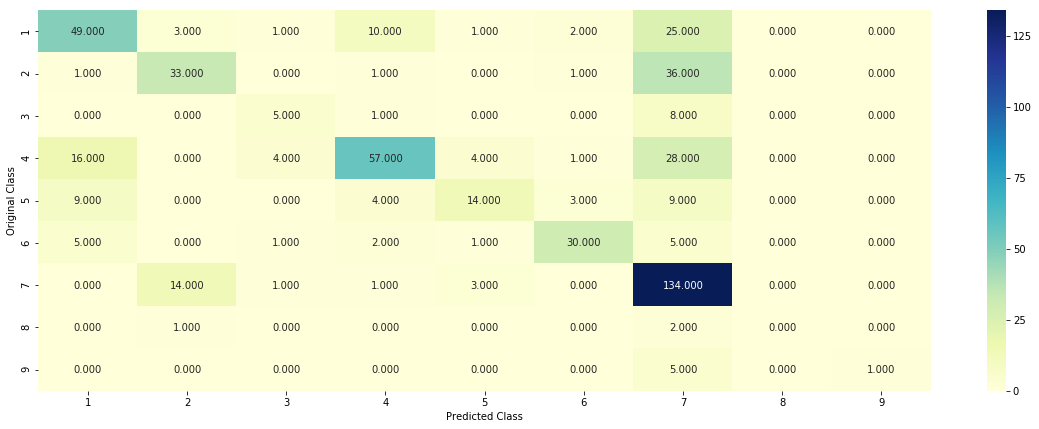

-------------------- Precision matrix (Columm Sum=1) --------------------


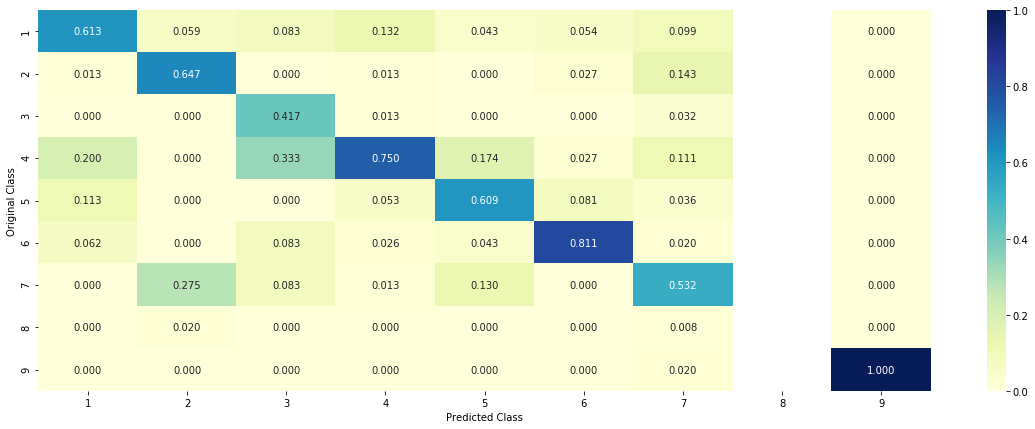

-------------------- Recall matrix (Row sum=1) --------------------


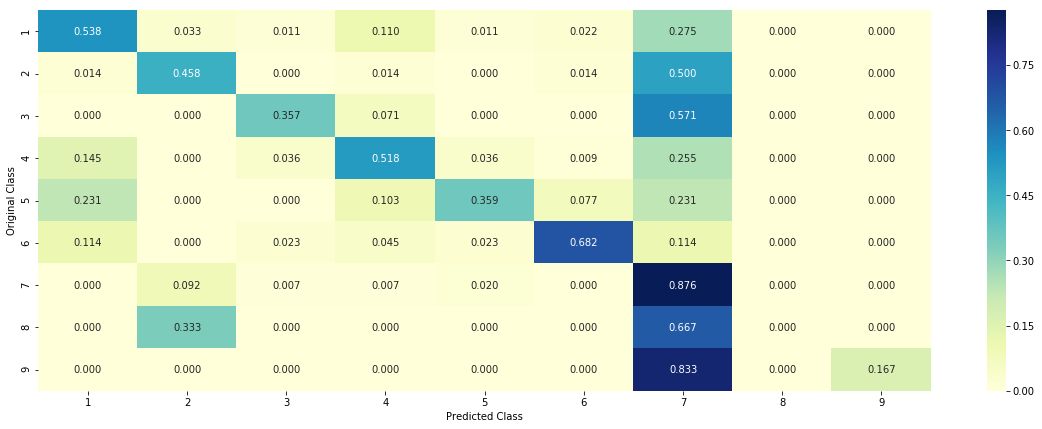

In [109]:
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding_four_gram, train_y, cv_x_onehotCoding_four_gram, cv_y, clf)

for alpha = 1e-06
Log Loss : 1.086530215164253
for alpha = 1e-05
Log Loss : 1.0129340919038763
for alpha = 0.0001
Log Loss : 0.9612774313935727
for alpha = 0.001
Log Loss : 0.9984764888663303
for alpha = 0.01
Log Loss : 1.1739031707507923
for alpha = 0.1
Log Loss : 1.6930097343901962
for alpha = 1
Log Loss : 1.819234720094813
for alpha = 10
Log Loss : 1.831224062797935
for alpha = 100
Log Loss : 1.8325834434598876


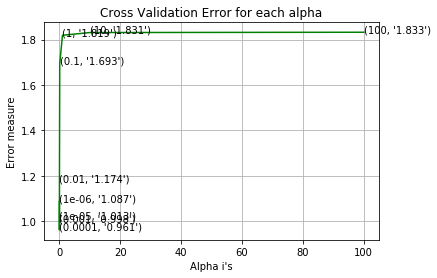

For values of best alpha =  0.0001 The train log loss is: 0.4252648331176722
For values of best alpha =  0.0001 The cross validation log loss is: 0.9612774313935727
For values of best alpha =  0.0001 The test log loss is: 1.0214976274245453


In [37]:
#4_gram TFIDF with max_features = 2000

alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding_four_gram_tfidf, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding_four_gram_tfidf, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding_four_gram_tfidf)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding_four_gram_tfidf, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding_four_gram_tfidf, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding_four_gram_tfidf)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding_four_gram_tfidf)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding_four_gram_tfidf)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

Log loss : 0.9612774313935727
Number of mis-classified points : 0.3233082706766917
-------------------- Confusion matrix --------------------


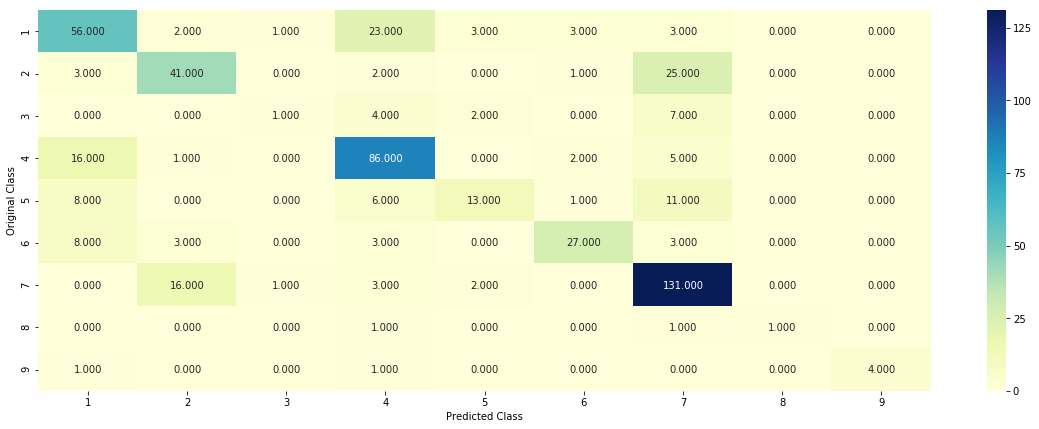

-------------------- Precision matrix (Columm Sum=1) --------------------


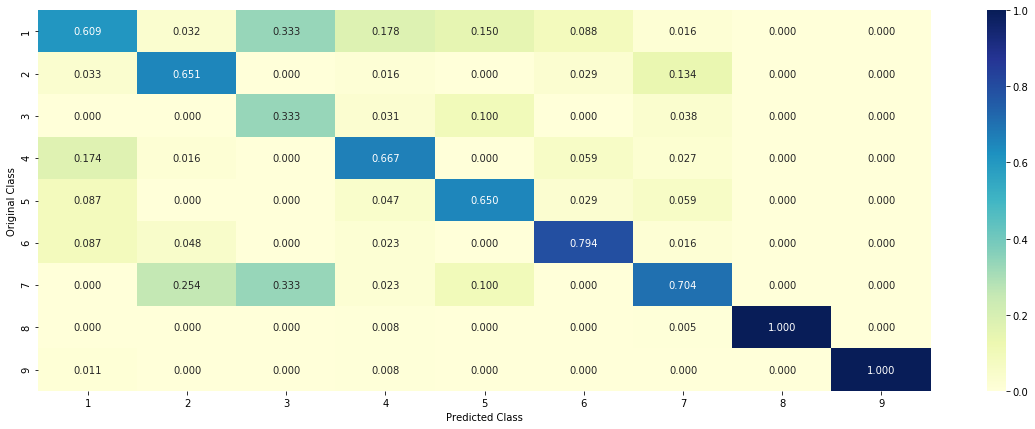

-------------------- Recall matrix (Row sum=1) --------------------


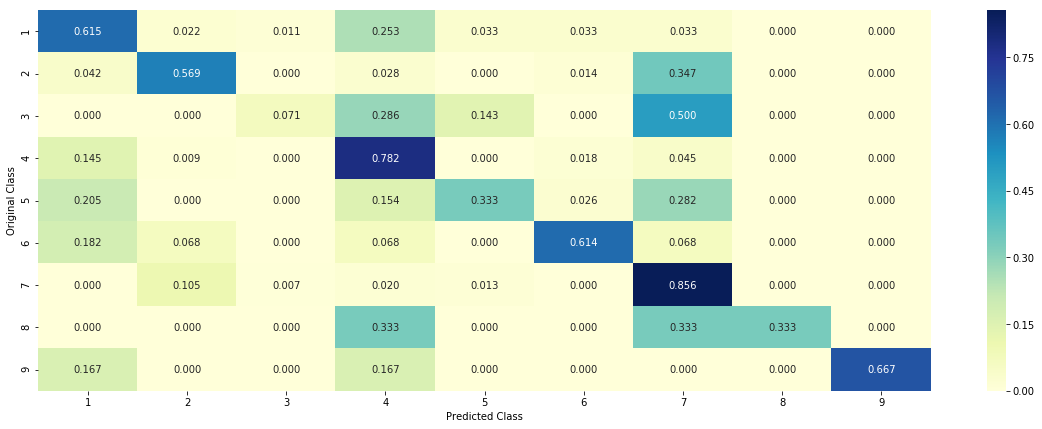

In [42]:
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding_four_gram_tfidf, train_y, cv_x_onehotCoding_four_gram_tfidf, cv_y, clf)

for alpha = 1e-06
Log Loss : 1.090490811454282
for alpha = 1e-05
Log Loss : 1.015438451915808
for alpha = 0.0001
Log Loss : 0.9613887775931261
for alpha = 0.001
Log Loss : 0.9923954675273716
for alpha = 0.01
Log Loss : 1.1446523570547478
for alpha = 0.1
Log Loss : 1.678367796559213
for alpha = 1
Log Loss : 1.7999010207512056
for alpha = 10
Log Loss : 1.8115364373936453
for alpha = 100
Log Loss : 1.8128433199679983


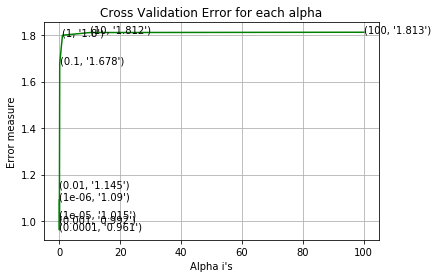

For values of best alpha =  0.0001 The train log loss is: 0.4195732746964234
For values of best alpha =  0.0001 The cross validation log loss is: 0.9613887775931261
For values of best alpha =  0.0001 The test log loss is: 1.0176501182892503


In [60]:
#4_gram TFIDF with max_features = 3000

alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding_four_gram_tfidf_3, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding_four_gram_tfidf_3, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding_four_gram_tfidf_3)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding_four_gram_tfidf_3, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding_four_gram_tfidf_3, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding_four_gram_tfidf_3)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding_four_gram_tfidf_3)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding_four_gram_tfidf_3)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

Log loss : 0.9613887775931261
Number of mis-classified points : 0.3101503759398496
-------------------- Confusion matrix --------------------


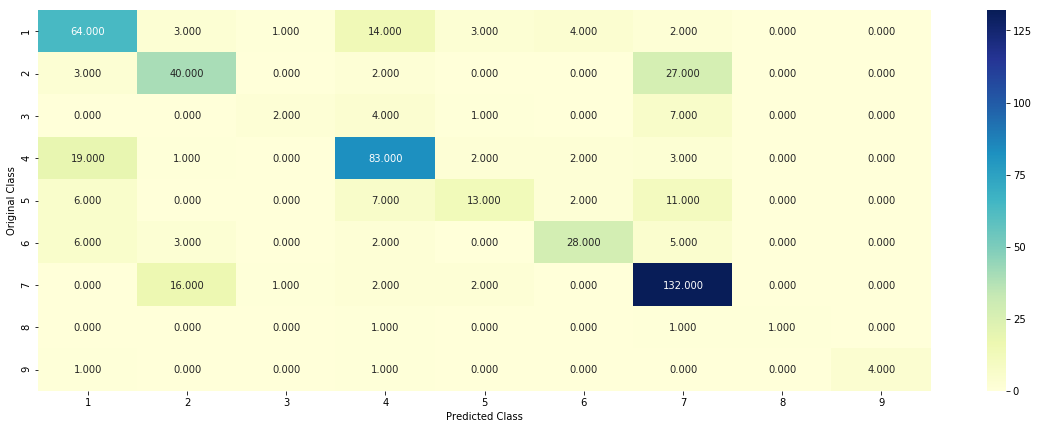

-------------------- Precision matrix (Columm Sum=1) --------------------


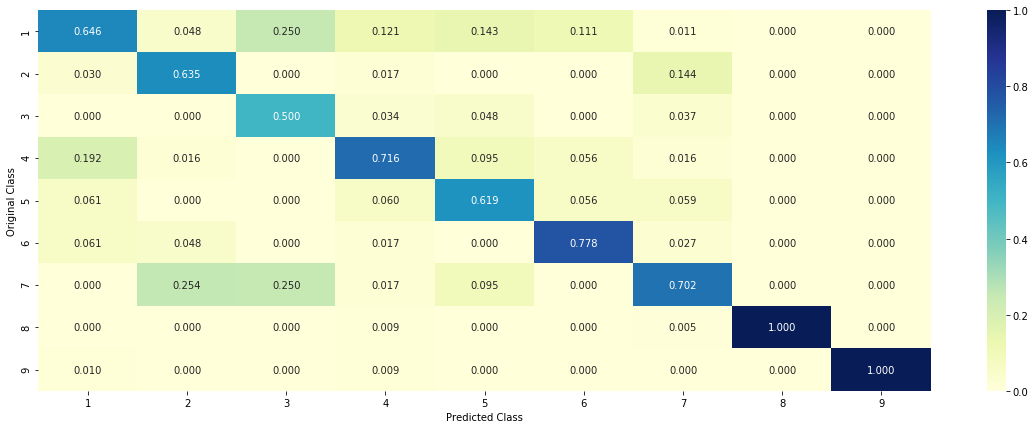

-------------------- Recall matrix (Row sum=1) --------------------


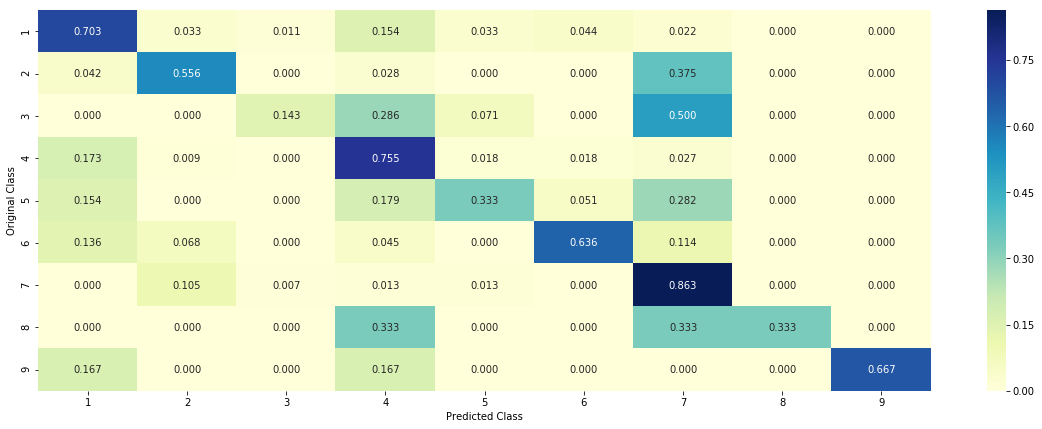

In [61]:
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding_four_gram_tfidf_3, train_y, cv_x_onehotCoding_four_gram_tfidf_3, cv_y, clf)

for alpha = 1e-06
Log Loss : 1.062232224316204
for alpha = 1e-05
Log Loss : 1.0268381442638752
for alpha = 0.0001
Log Loss : 0.9655955457899282
for alpha = 0.001
Log Loss : 0.9884006613756601
for alpha = 0.01
Log Loss : 1.1299573139929435
for alpha = 0.1
Log Loss : 1.6820376694347026
for alpha = 1
Log Loss : 1.8184477556836005
for alpha = 10
Log Loss : 1.8310983353786257
for alpha = 100
Log Loss : 1.8325391994773756


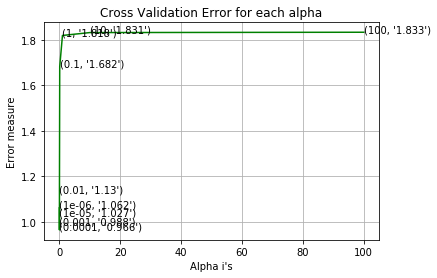

For values of best alpha =  0.0001 The train log loss is: 0.42112920605506365
For values of best alpha =  0.0001 The cross validation log loss is: 0.9655955457899282
For values of best alpha =  0.0001 The test log loss is: 1.0146797334467643


In [68]:
#4_gram TFIDF with max_features = 4000

alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding_four_gram_tfidf_4, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding_four_gram_tfidf_4, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding_four_gram_tfidf_4)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding_four_gram_tfidf_4, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding_four_gram_tfidf_4, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding_four_gram_tfidf_4)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding_four_gram_tfidf_4)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding_four_gram_tfidf_4)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

Log loss : 0.9655955457899282
Number of mis-classified points : 0.3101503759398496
-------------------- Confusion matrix --------------------


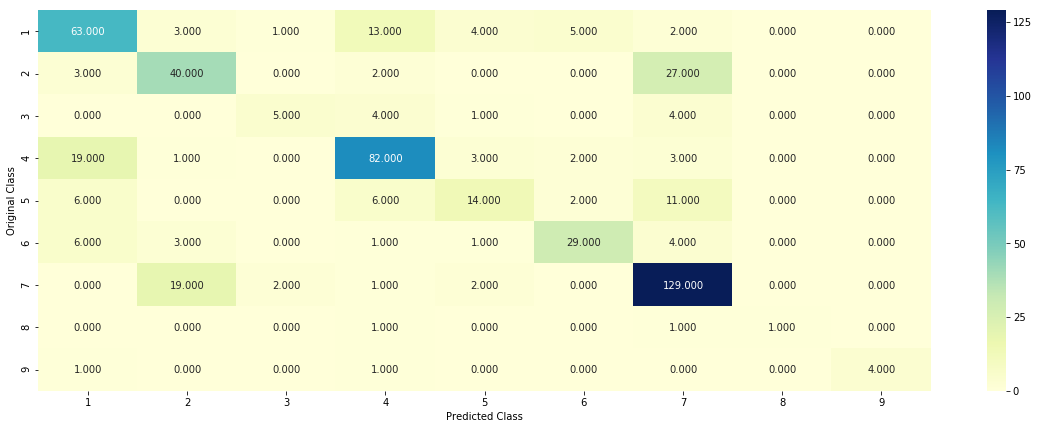

-------------------- Precision matrix (Columm Sum=1) --------------------


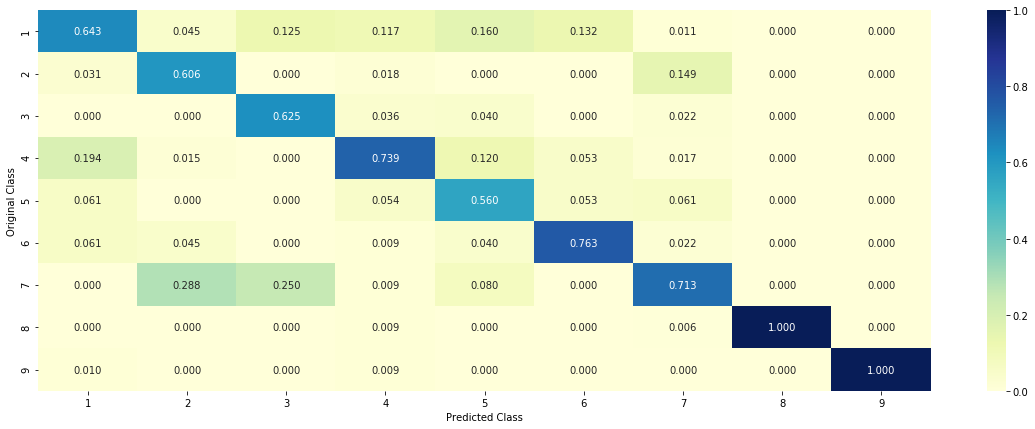

-------------------- Recall matrix (Row sum=1) --------------------


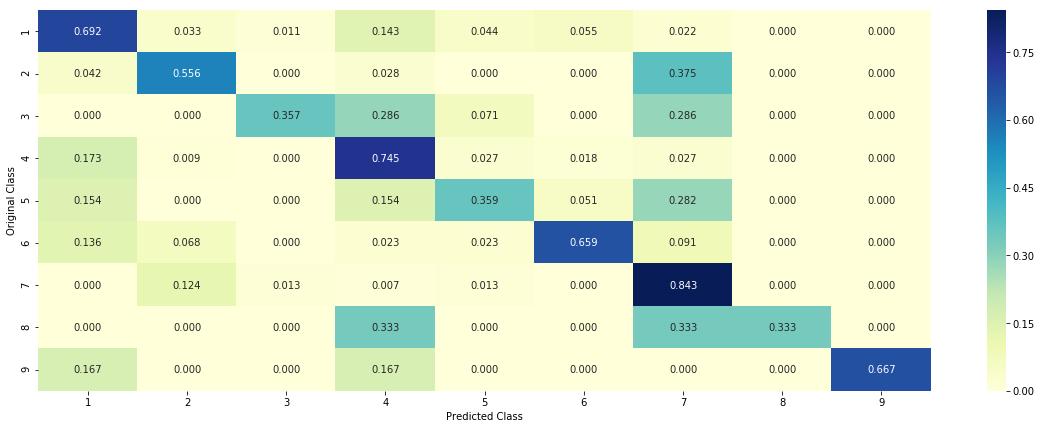

In [63]:
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding_four_gram_tfidf_4, train_y, cv_x_onehotCoding_four_gram_tfidf_4, cv_y, clf)

for alpha = 1e-06
Log Loss : 1.123971171962782
for alpha = 1e-05
Log Loss : 1.0961152220650123
for alpha = 0.0001
Log Loss : 1.0341073284910118
for alpha = 0.001
Log Loss : 1.0587292213123902
for alpha = 0.01
Log Loss : 1.1225814901377906
for alpha = 0.1
Log Loss : 1.629826647560286
for alpha = 1
Log Loss : 1.7541317552400746
for alpha = 10
Log Loss : 1.7655856303515265
for alpha = 100
Log Loss : 1.7668627134354484


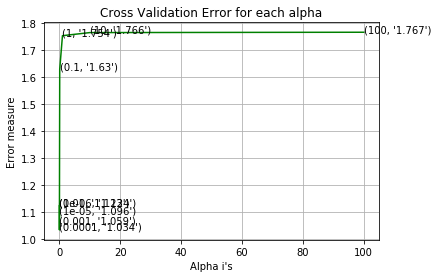

For values of best alpha =  0.0001 The train log loss is: 0.4319198311934772
For values of best alpha =  0.0001 The cross validation log loss is: 1.0341073284910118
For values of best alpha =  0.0001 The test log loss is: 0.9528217174389033


In [32]:
#4_gram TFIDF with max_features = 5000

alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding_four_gram_tfidf_5, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding_four_gram_tfidf_5, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding_four_gram_tfidf_5)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding_four_gram_tfidf_5, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding_four_gram_tfidf_5, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding_four_gram_tfidf_5)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding_four_gram_tfidf_5)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding_four_gram_tfidf_5)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

Log loss : 1.0341073284910118
Number of mis-classified points : 0.3308270676691729
-------------------- Confusion matrix --------------------


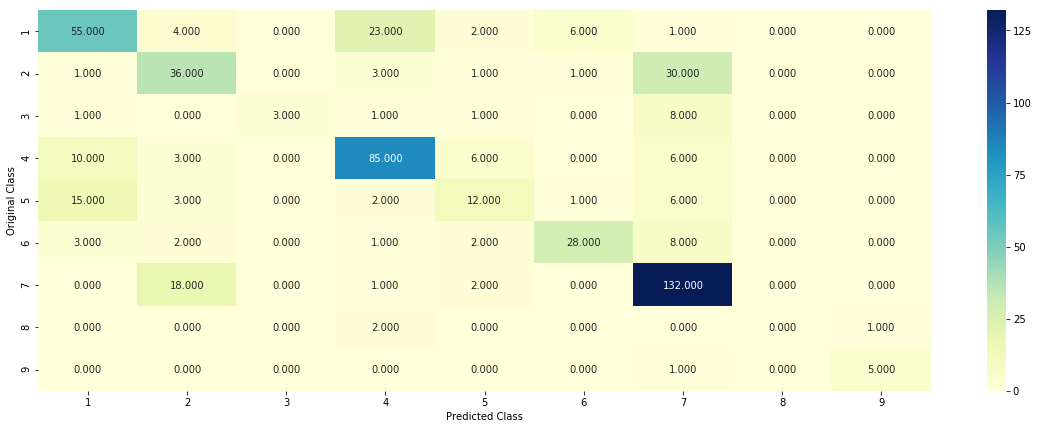

-------------------- Precision matrix (Columm Sum=1) --------------------


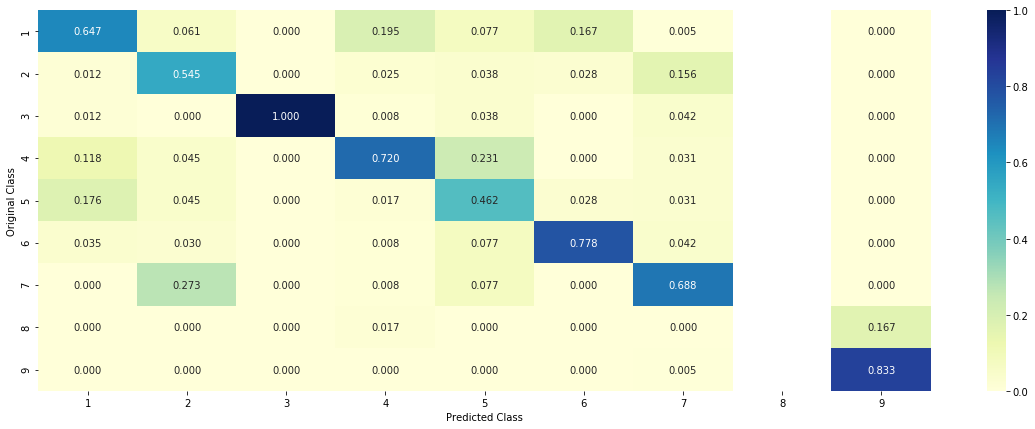

-------------------- Recall matrix (Row sum=1) --------------------


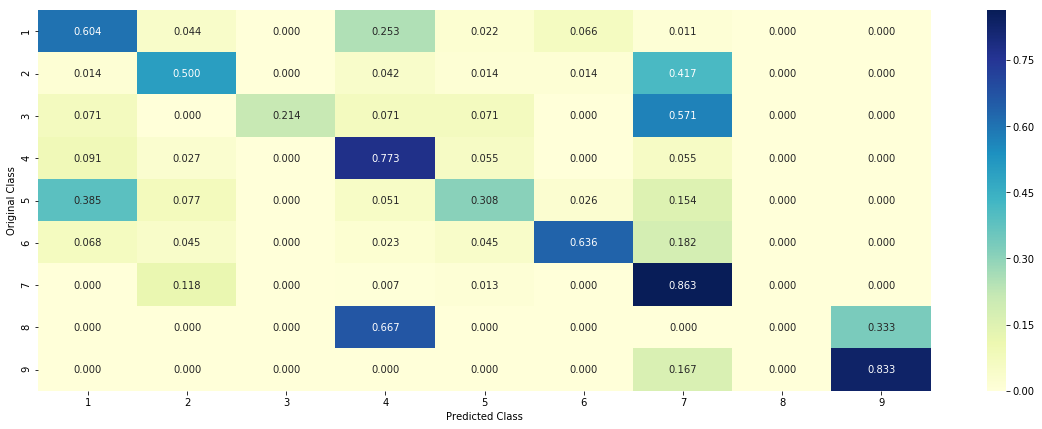

In [39]:
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding_four_gram_tfidf_5, train_y, cv_x_onehotCoding_four_gram_tfidf_5, cv_y, clf)

for alpha = 1e-06
Log Loss : 1.131548084323296
for alpha = 1e-05
Log Loss : 1.117005351605783
for alpha = 0.0001
Log Loss : 1.0275318551404824
for alpha = 0.001
Log Loss : 1.0498860623206883
for alpha = 0.01
Log Loss : 1.1158335301486473
for alpha = 0.1
Log Loss : 1.5997390950599946
for alpha = 1
Log Loss : 1.7368142105637303
for alpha = 10
Log Loss : 1.7504550758642565
for alpha = 100
Log Loss : 1.7519876592347403


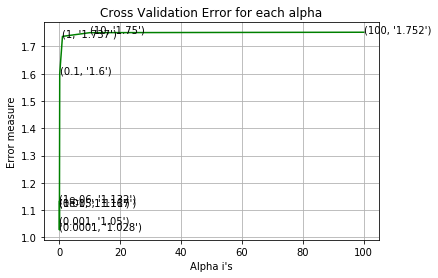

For values of best alpha =  0.0001 The train log loss is: 0.43510502435525295
For values of best alpha =  0.0001 The cross validation log loss is: 1.0275318551404824
For values of best alpha =  0.0001 The test log loss is: 0.9511983240442974


In [40]:
#4_gram TFIDF with max_features = 6000

alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding_four_gram_tfidf_6, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding_four_gram_tfidf_6, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding_four_gram_tfidf_6)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding_four_gram_tfidf_6, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding_four_gram_tfidf_6, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding_four_gram_tfidf_6)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding_four_gram_tfidf_6)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding_four_gram_tfidf_6)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

Log loss : 1.0275318551404824
Number of mis-classified points : 0.3308270676691729
-------------------- Confusion matrix --------------------


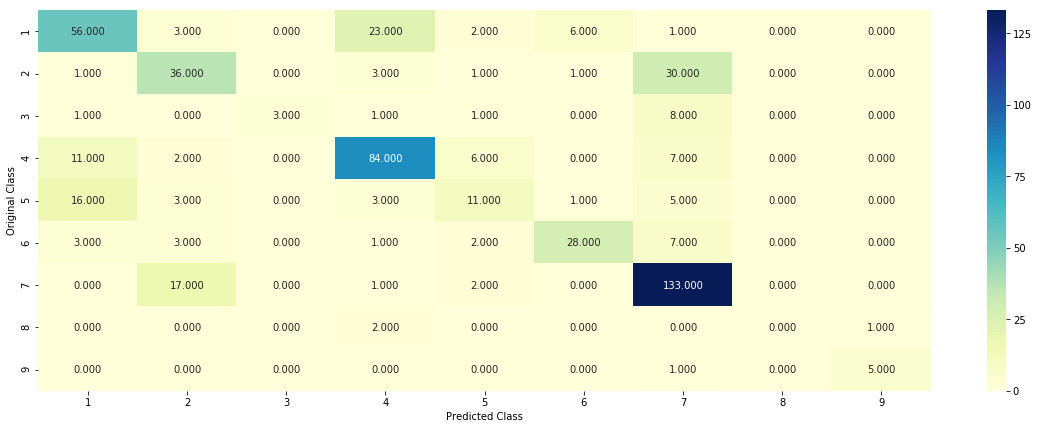

-------------------- Precision matrix (Columm Sum=1) --------------------


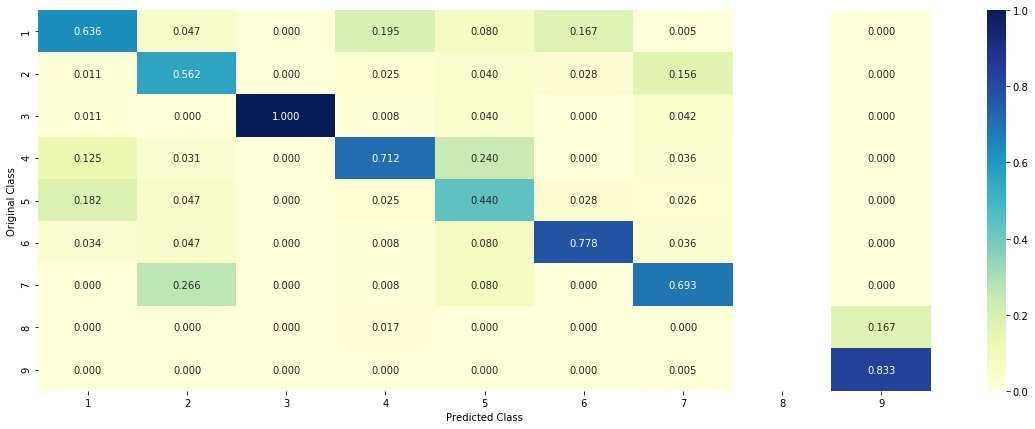

-------------------- Recall matrix (Row sum=1) --------------------


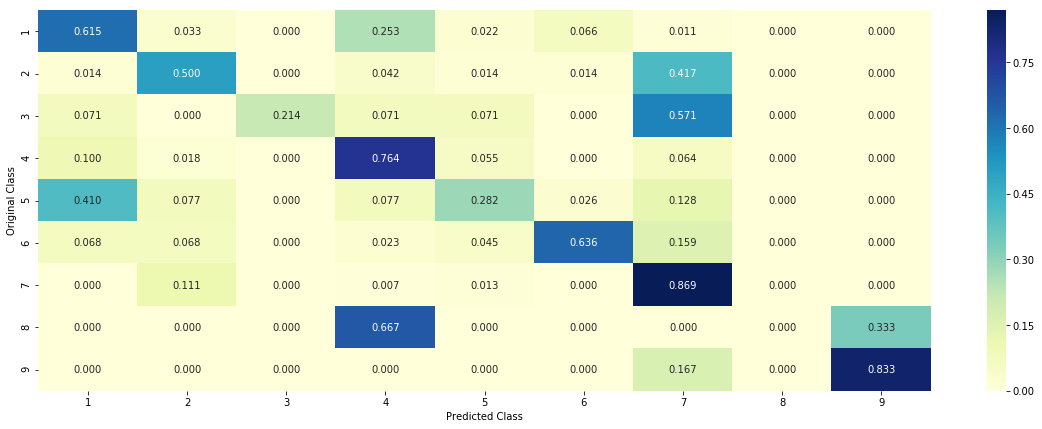

In [41]:
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding_four_gram_tfidf_6, train_y, cv_x_onehotCoding_four_gram_tfidf_6, cv_y, clf)

In [45]:
x = PrettyTable(["Model", "Features Used" , "Train-logloss","CV-logloss", "Test-log loss"," MissClassification"])
y = PrettyTable(["Model", "Features Used", "Max_features", "Train-logloss","CV-logloss", "Test-log loss"," MissClassification"])

print("-------------> CountVectorizer<------------------")
x.add_row(["Logistic Regression" ,"Unigram" , 0.59,1.06, 1.10, 0.33])
x.add_row(["Logistic Regression" ,"Bigram", 0.73,1.13, 1.17, 0.37])
x.add_row(["Logistic Regression" ,"Tri_gram", 0.78,1.15, 1.18, 0.39])
x.add_row(["Logistic Regression" ,"4_gram", 0.84,1.17, 1.20, 0.39])
print(x)
print()
print("-------------> TfidfVectorizer<------------------")
y.add_row(["Logistic Regression" ,"TFIDF(4_gram)",2000, 0.42,0.96, 1.02, 0.32])
y.add_row(["Logistic Regression" ,"TFIDF(4_gram)",3000, 0.41,0.96, 1.017, 0.31])
y.add_row(["Logistic Regression" ,"TFIDF(4_gram)",4000, 0.42,0.96, 1.014, 0.31])
y.add_row(["Logistic Regression" ,"TFIDF(4_gram)",5000, 0.43,1.03, 0.95, 0.33])
y.add_row(["Logistic Regression" ,"TFIDF(4_gram)",6000, 0.43,1.02, 0.95, 0.33])


print(y)


-------------> CountVectorizer<------------------
+---------------------+---------------+---------------+------------+---------------+---------------------+
|        Model        | Features Used | Train-logloss | CV-logloss | Test-log loss |  MissClassification |
+---------------------+---------------+---------------+------------+---------------+---------------------+
| Logistic Regression |    Unigram    |      0.59     |    1.06    |      1.1      |         0.33        |
| Logistic Regression |     Bigram    |      0.73     |    1.13    |      1.17     |         0.37        |
| Logistic Regression |    Tri_gram   |      0.78     |    1.15    |      1.18     |         0.39        |
| Logistic Regression |     4_gram    |      0.84     |    1.17    |      1.2      |         0.39        |
+---------------------+---------------+---------------+------------+---------------+---------------------+

-------------> TfidfVectorizer<------------------
+---------------------+---------------+----

**Observation:**
After using Bi_gram, Tri_gram and 4_gram, our LR model by using TFIDF using 4_gram with Top 6000 feature has given us a test log loss of 0.951.

# Trying feature engineering techniques to reduce the CV and test log-loss to a value less than 1.0

In [0]:
gene_variation = []
#length of gene_variation is 6642 

for gene in data['Gene'].values:
    gene_variation.append(gene)

for variation in data['Variation'].values:
    gene_variation.append(variation)


In [0]:
tfidfVectorizer = TfidfVectorizer(max_features=1000)
text2 = tfidfVectorizer.fit_transform(gene_variation)
gene_variation_features = tfidfVectorizer.get_feature_names()

train_text = tfidfVectorizer.transform(train_df['TEXT'])
test_text = tfidfVectorizer.transform(test_df['TEXT'])
cv_text = tfidfVectorizer.transform(cv_df['TEXT'])

In [0]:
train_gene_var_onehotCoding = hstack((train_gene_feature_onehotCoding,train_variation_feature_onehotCoding))
test_gene_var_onehotCoding = hstack((test_gene_feature_onehotCoding,test_variation_feature_onehotCoding))
cv_gene_var_onehotCoding = hstack((cv_gene_feature_onehotCoding,cv_variation_feature_onehotCoding))

# Adding the train_text feature
train_x_onehotCoding = hstack((train_gene_var_onehotCoding, train_text))
train_x_onehotCoding = hstack((train_x_onehotCoding, train_text_feature_onehotCoding)).tocsr()
train_y = np.array(list(train_df['Class']))

# Adding the test_text feature
test_x_onehotCoding = hstack((test_gene_var_onehotCoding, test_text))
test_x_onehotCoding = hstack((test_x_onehotCoding, test_text_feature_onehotCoding)).tocsr()
test_y = np.array(list(test_df['Class']))

# Adding the cv_text feature
cv_x_onehotCoding = hstack((cv_gene_var_onehotCoding, cv_text))
cv_x_onehotCoding = hstack((cv_x_onehotCoding, cv_text_feature_onehotCoding)).tocsr()
cv_y = np.array(list(cv_df['Class']))


In [44]:
print("One hot encoding features :")
print("(number of data points * number of features) in train data = ", train_x_onehotCoding.shape)
print("(number of data points * number of features) in test data = ", test_x_onehotCoding.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_onehotCoding.shape)

One hot encoding features :
(number of data points * number of features) in train data =  (2124, 4197)
(number of data points * number of features) in test data =  (665, 4197)
(number of data points * number of features) in cross validation data = (532, 4197)


for alpha = 1e-06
Log Loss : 1.0249609464098222
for alpha = 1e-05
Log Loss : 0.9868276688253202
for alpha = 0.0001
Log Loss : 0.9590598220294838
for alpha = 0.001
Log Loss : 1.0044980669824102
for alpha = 0.01
Log Loss : 1.198376600449738
for alpha = 0.1
Log Loss : 1.6316194580582941
for alpha = 1
Log Loss : 1.7663821856909947
for alpha = 10
Log Loss : 1.7797764103131073
for alpha = 100
Log Loss : 1.7811630991490415


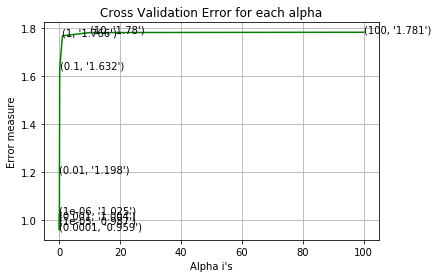

For values of best alpha =  0.0001 The train log loss is: 0.45391863684980177
For values of best alpha =  0.0001 The cross validation log loss is: 0.9590598220294838
For values of best alpha =  0.0001 The test log loss is: 1.000742542823411


In [54]:

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

Log loss : 0.9590598220294838
Number of mis-classified points : 0.3308270676691729
-------------------- Confusion matrix --------------------


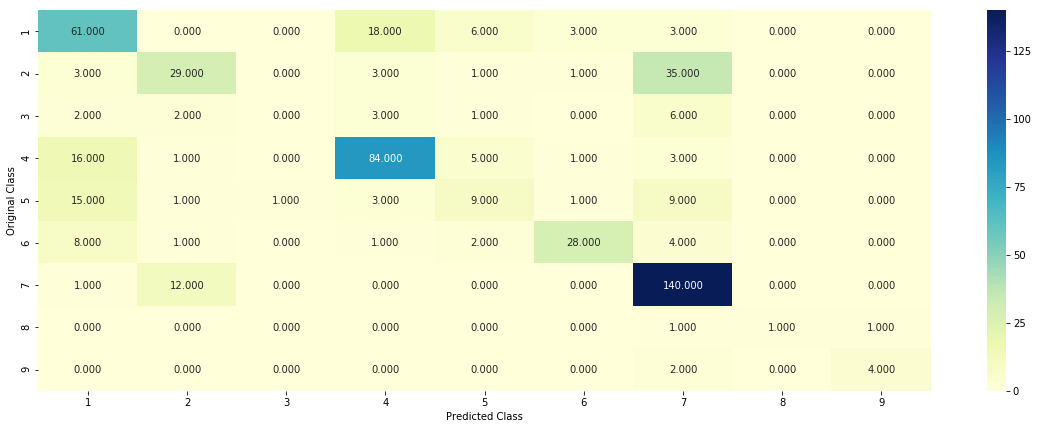

-------------------- Precision matrix (Columm Sum=1) --------------------


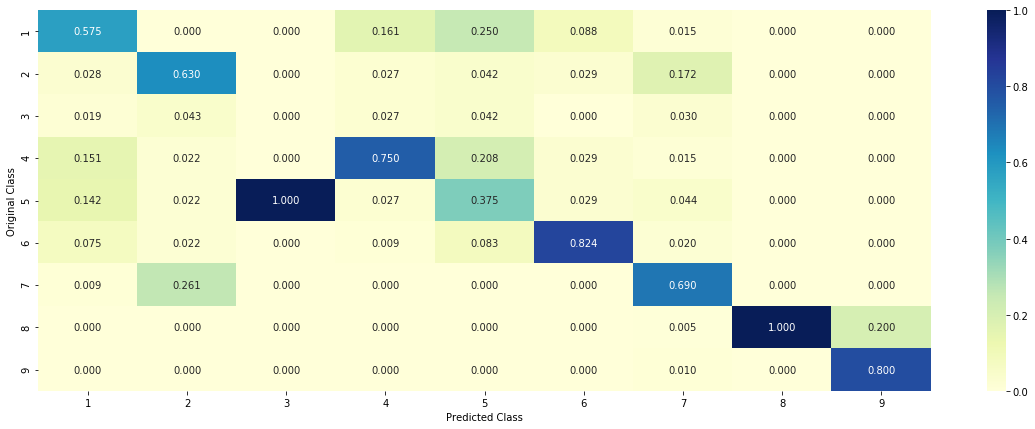

-------------------- Recall matrix (Row sum=1) --------------------


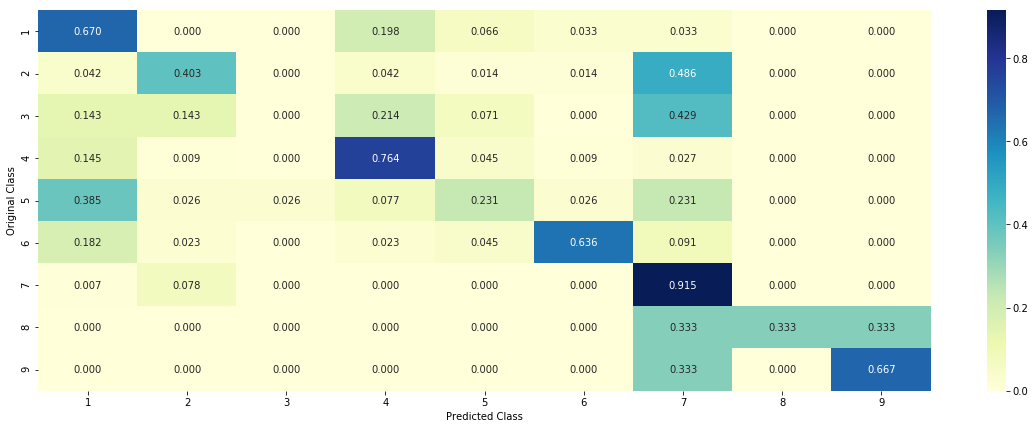

In [55]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y, cv_x_onehotCoding, cv_y, clf)

In [0]:
tfidfVectorizer_6 = TfidfVectorizer(ngram_range=(1, 4),max_features=6000)
text2 = tfidfVectorizer_6.fit_transform(gene_variation)
gene_variation_features_6 = tfidfVectorizer_6.get_feature_names()

train_text = tfidfVectorizer_6.transform(train_df['TEXT'])
test_text = tfidfVectorizer_6.transform(test_df['TEXT'])
cv_text = tfidfVectorizer_6.transform(cv_df['TEXT'])

In [0]:
#with tfidf top 6000 feature
train_gene_var_onehotCoding = hstack((train_gene_feature_onehotCoding,train_variation_feature_onehotCoding))
test_gene_var_onehotCoding = hstack((test_gene_feature_onehotCoding,test_variation_feature_onehotCoding))
cv_gene_var_onehotCoding = hstack((cv_gene_feature_onehotCoding,cv_variation_feature_onehotCoding))

# Adding the train_text feature
train_x_onehotCoding = hstack((train_gene_var_onehotCoding, train_text))
train_x_onehotCoding = hstack((train_x_onehotCoding, train_text_feature_onehotCoding)).tocsr()
train_y = np.array(list(train_df['Class']))

# Adding the test_text feature
test_x_onehotCoding = hstack((test_gene_var_onehotCoding, test_text))
test_x_onehotCoding = hstack((test_x_onehotCoding, test_text_feature_onehotCoding)).tocsr()
test_y = np.array(list(test_df['Class']))

# Adding the cv_text feature
cv_x_onehotCoding = hstack((cv_gene_var_onehotCoding, cv_text))
cv_x_onehotCoding = hstack((cv_x_onehotCoding, cv_text_feature_onehotCoding)).tocsr()
cv_y = np.array(list(cv_df['Class']))


In [0]:
print("One hot encoding Tfidf features with top 6000 :")
print("(number of data points * number of features) in train data = ", train_x_onehotCoding.shape)
print("(number of data points * number of features) in test data = ", test_x_onehotCoding.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_onehotCoding.shape)

One hot encoding Tfidf features with top 6000 :
(number of data points * number of features) in train data =  (2124, 6869)
(number of data points * number of features) in test data =  (665, 6869)
(number of data points * number of features) in cross validation data = (532, 6869)


for alpha = 1e-06
Log Loss : 1.0586973845496084
for alpha = 1e-05
Log Loss : 1.0300389911209729
for alpha = 0.0001
Log Loss : 0.9842929335003346
for alpha = 0.001
Log Loss : 1.0205966819460879
for alpha = 0.01
Log Loss : 1.184873752786715
for alpha = 0.1
Log Loss : 1.6288202642967466
for alpha = 1
Log Loss : 1.7521156380956773
for alpha = 10
Log Loss : 1.7641658479115319
for alpha = 100
Log Loss : 1.7654201270490872


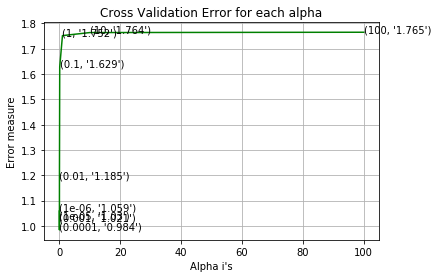

For values of best alpha =  0.0001 The train log loss is: 0.45323915309704665
For values of best alpha =  0.0001 The cross validation log loss is: 0.9842929335003346
For values of best alpha =  0.0001 The test log loss is: 0.9560545308510926


In [63]:
alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

Log loss : 0.9842929335003346
Number of mis-classified points : 0.35902255639097747
-------------------- Confusion matrix --------------------


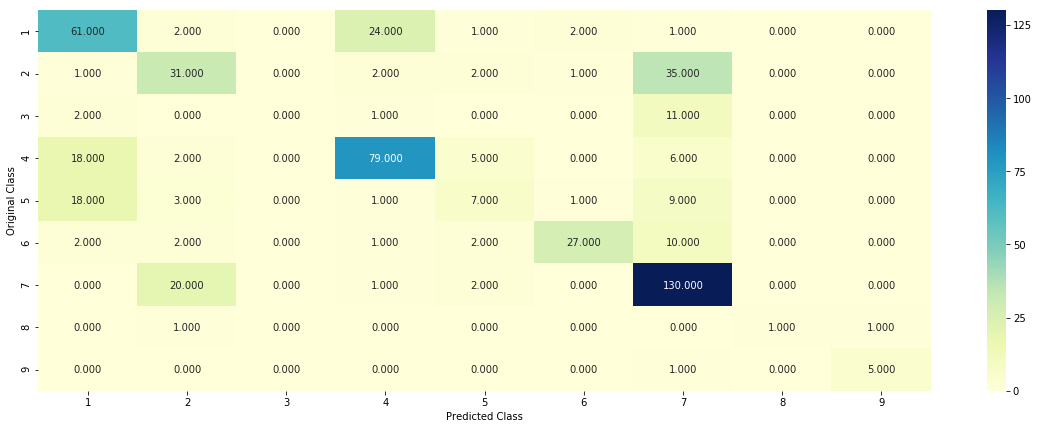

-------------------- Precision matrix (Columm Sum=1) --------------------


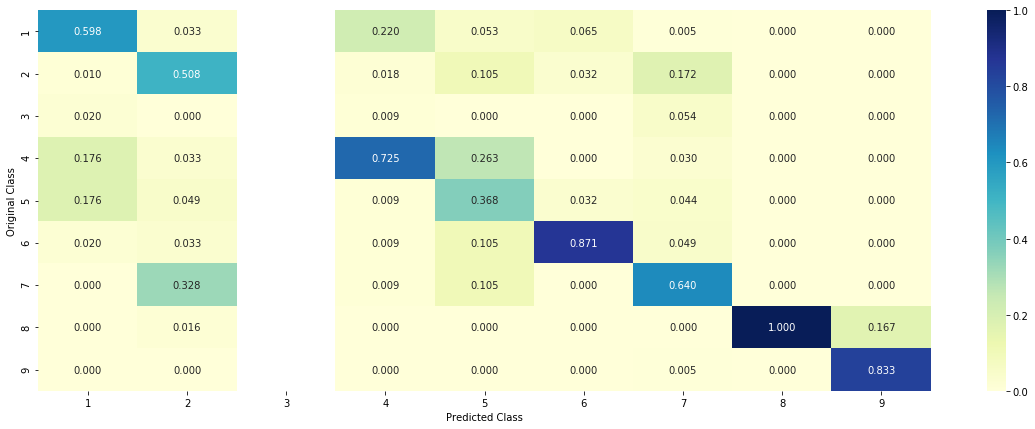

-------------------- Recall matrix (Row sum=1) --------------------


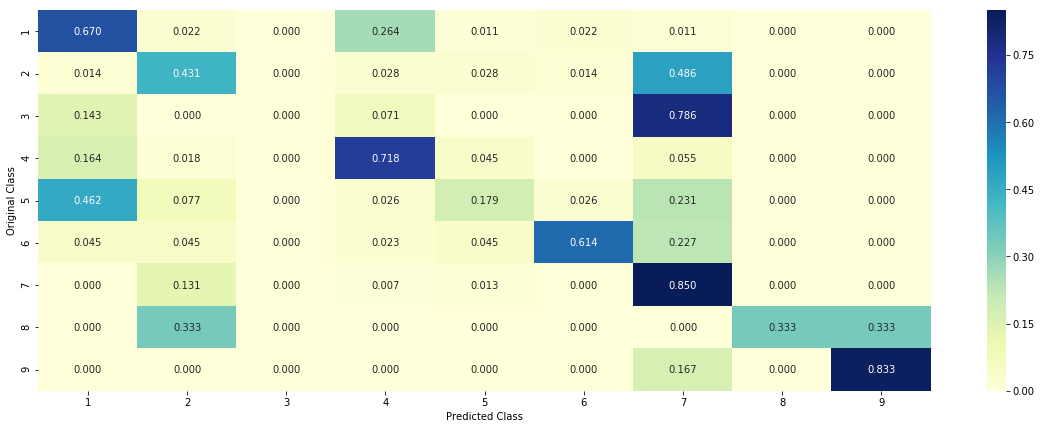

In [64]:
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y, cv_x_onehotCoding, cv_y, clf)

In [6]:
x = PrettyTable(["Model", "Features Used" , "Train-logloss","CV-logloss", "Test-log loss"," MissClassification"])

x.add_row(["Logistic Regression (One Hot Encoding)" ,"TFIDF" , 0.45,0.95, 1.00, 0.33])
x.add_row(["Logistic Regression (One Hot Encoding)" ,"TFIDF(4_grams) with top 6000 features" , 0.45,0.98, 0.95, 0.35])

print(x)

+----------------------------------------+---------------------------------------+---------------+------------+---------------+---------------------+
|                 Model                  |             Features Used             | Train-logloss | CV-logloss | Test-log loss |  MissClassification |
+----------------------------------------+---------------------------------------+---------------+------------+---------------+---------------------+
| Logistic Regression (One Hot Encoding) |                 TFIDF                 |      0.45     |    0.95    |      1.0      |         0.33        |
| Logistic Regression (One Hot Encoding) | TFIDF(4_grams) with top 6000 features |      0.45     |    0.98    |      0.95     |         0.35        |
+----------------------------------------+---------------------------------------+---------------+------------+---------------+---------------------+


**Observation:**
After applying some feature engineering techniques, we got a good result. Test loss has been reduced to 1.0 and there are 33% MissClassification points. 
But when I use TFIDF by 4_gram with top 6000 features, I got a test loss of 0.95 and CV loss of 0.98 which is < 1. And I got what I was expecting.

# Conclusions

<center> step by step procedure that followed to solve this case study </center>
> As I have used Google colab for this Case Study, I Mounted Google Drive locally

> Reading Gene and Variation Data

> Reading Text Data

> Splitting data into train, test and cross validation (64:20:16)

i.e   Number of data points in train data: 2124
      Number of data points in test data: 665
      Number of data points in cross validation data: 532
      
      
> Prediction using a 'Random' Model

In a 'Random' Model, we generate the NINE class probabilites randomly such that they sum to 1
And got a Log loss on Test Data using Random Model 2.47.

> Univariate Analysis

Featurize this Gene, Variation and Text feature with One hot Encoding and Response coding.
> Applying all the models with tf-idf features and Instead of using all the words in the dataset, using only the top 1000 words based of tf-idf values

 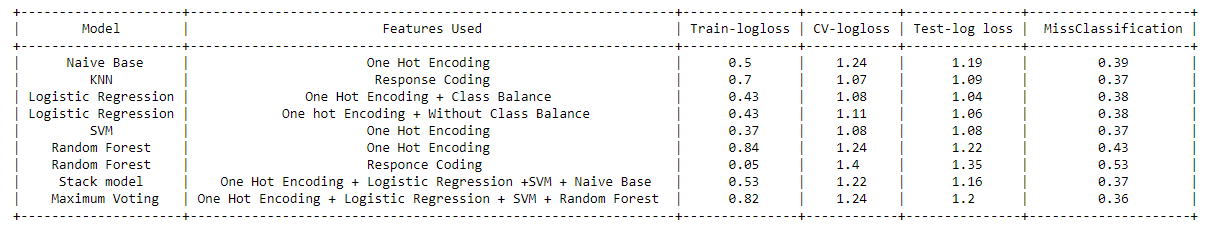

After applying all the models with tf-idf features and Instead of using all the words in the dataset, using only the top 1000 words based of tf-idf values, Logistic Regression using One Hot Encoding with class balance has given 1.04 test logloss. Which is the lowest, as compaire to other models.

> Apply Logistic regression with CountVectorizer Features, including unigrams, bigrams , tri_gram, 4_gram

 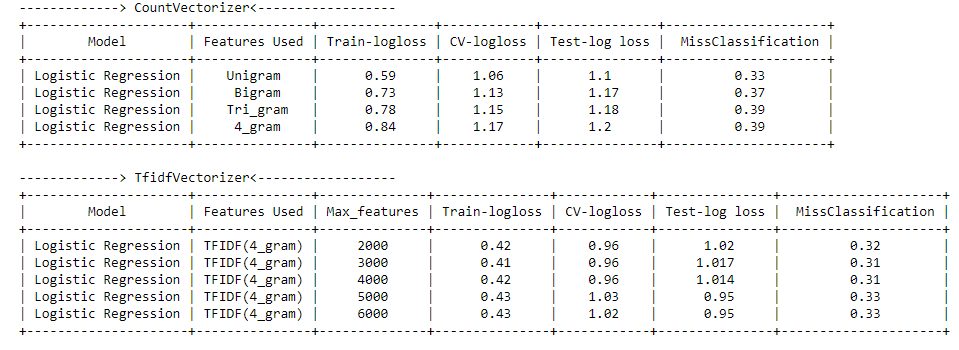
 After using Bi_gram, Tri_gram and 4_gram, our LR model by using TFIDF using 4_gram with Top 6000 feature has given us a test log loss of 0.951.

> Tried feature engineering techniques to reduce the CV and test log-loss to a value less than 1.0

Added Gean Feature Variation Featureto improve the performance. And after some feature engineering, I manage to decrease the log loss below < 1
 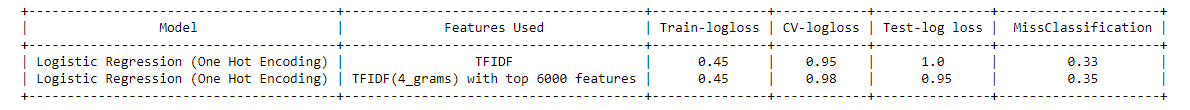
 I used TFIDF by 4_gram with top 6000 features, and got a test loss of 0.95 and CV loss of 0.98 which is < 1. And I got what I was expecting.


